# Data Analysis of the Electrochemical cycling data on an 18650 Li-ion Battery with Nickel-Rich NMC811 Cathode and Graphite-Silicon Anode

# Data Source Summary
##### **Journal Article Name:** An Advanced Microstructural and Electrochemical Datasheet on 18650 Li-Ion Batteries with Nickel- Rich NMC811 Cathodes and Graphite-Silicon Anodes
##### **Journal Article Identifier:** https://dx.doi.org/10.1149/1945-7111/abc4c1
##### **Data URL:** https://rdr.ucl.ac.uk/articles/dataset/Lithium-ion_Battery_INR18650_MJ1_Data_400_Electrochemical_Cycles_EIL-015_/12159462/1
##### **Data License:** CC0 1.0

# Analysis Summary
##### **Type of Analysis**: Reproduction of the data analysis

# Some Common Formulas

##### SOH Estimation from Capacity

SOH (%) = (Qmax/Cr)*100

Where, Qmax is the max charge and Cr is the Rated Capacity

##### SOC Estimation from Capacity

SOC(%) = ((Q0+Q)/Qmax)*100
SOC0(%) = (Q/Qmax)*100

Q0/Ah = Initial charge of the battery.

Q/Ah =  The quantity of electricity delivered by or supplied to, the battery. It follows the convention of the current: it is negative during the discharge and positive during the charge.

Qmax/Ah= The maximum charge that can be stored in the battery.

SoC0/%=  The initial state-of-charge (SoC/%)  of the battery.

If the battery is new: Qmax=Cr and Q0=0.5Qmax generally. Cr is the rated capacity of the battery as given by the manufacturer. 
If the battery is fully charged: Q0=Qmax  and SoC0=100%.

# Data Analysis

In [9]:
# Basic Packages
import pandas as pd
import numpy as np

# Visulaization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
bat_data = pd.read_csv('D:\\Batteries Machine Learning Research\\Data\\Electrochemical cycling data on an 18650 Li-ion Battery with Nickel-Rich NMC811 Cathode and Graphite-Silicon Anode\\EIL-MJ1-015.csv', header=0)
bat_data.head()

C:\Users\aravi\AppData\Local\Temp\ipykernel_16444\3629245139.py:1: DtypeWarning: Columns (0,1,2,3,5,6,7,8,9,11,12,13,14,15,17,18,19,20,21,23,24,25,26,27,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  bat_data = pd.read_csv('D:\\Batteries Machine Learning Research\\Data\\Electrochemical cycling data on an 18650 Li-ion Battery with Nickel-Rich NMC811 Cathode and Graphite-Silicon Anode\\EIL-MJ1-015.csv', header=0)


Cycle Charge Capacity Discharge Capacity Discharge/Charge  Unnamed: 4  \
0     -              Ah                 Ah                %         NaN   
1     1       3.4700000          3.3700000        0.9710000         NaN   
2     2       3.3800000          3.3700000        0.9970000         NaN   
3     3       3.3700000          3.3600000        0.9970000         NaN   
4     4       3.3600000          3.3500000        0.9970000         NaN   

   Test Time Cycle Number        Temp   Capacity Cell Potential  ...  \
0        Hrs            -       Deg C      AmpHr          Volts  ...   
1  0.0000000            0  25.6901417  0.0000000      3.0659190  ...   
2  0.0027778            0  25.6901417  0.0000000      3.0656138  ...   
3  0.0027917            1  25.6901417  0.0000205      3.1651026  ...   
4  0.0028361            1  25.6901417  0.0000872      3.1860075  ...   

   Cycle Number.3      Temp.3 Capacity.3 Cell Potential.3 Unnamed: 28  \
0               -       Deg C      AmpHr            Volts         NaN   
1             203  25.7239780  0.0000164        3.3179980         NaN   
2             203  25.6907311  0.0000830        3.3350881         NaN   
3             203  25.7073555  0.0002997        3.3459220         NaN   
4             203  25.7073555  0.0016746        3.3562982         NaN   

  Test Time.4  Cycle Number.4      Temp.4 Capacity.4 Cell Potential.4  
0         Hrs               -       Deg C      AmpHr            Volts  
1   0.0000000             286  28.9489365  0.0000205        3.3799496  
2   0.0027778             286  29.0154285  0.0000997        3.3949035  
3   0.0027917             286  29.0154285  0.0004705        3.4052796  
4   0.0028444             286  29.0154285  0.0022038        3.4155032  

[5 rows x 34 columns]

In [11]:
bat_data.drop([0], inplace=True)
bat_data.head()

Cycle Charge Capacity Discharge Capacity Discharge/Charge  Unnamed: 4  \
1     1       3.4700000          3.3700000        0.9710000         NaN   
2     2       3.3800000          3.3700000        0.9970000         NaN   
3     3       3.3700000          3.3600000        0.9970000         NaN   
4     4       3.3600000          3.3500000        0.9970000         NaN   
5     5       3.3500000          3.3400000        0.9970000         NaN   

   Test Time Cycle Number        Temp   Capacity Cell Potential  ...  \
1  0.0000000            0  25.6901417  0.0000000      3.0659190  ...   
2  0.0027778            0  25.6901417  0.0000000      3.0656138  ...   
3  0.0027917            1  25.6901417  0.0000205      3.1651026  ...   
4  0.0028361            1  25.6901417  0.0000872      3.1860075  ...   
5  0.0029167            1  25.6901417  0.0002080      3.1982147  ...   

   Cycle Number.3      Temp.3 Capacity.3 Cell Potential.3 Unnamed: 28  \
1             203  25.7239780  0.0000164        3.3179980         NaN   
2             203  25.6907311  0.0000830        3.3350881         NaN   
3             203  25.7073555  0.0002997        3.3459220         NaN   
4             203  25.7073555  0.0016746        3.3562982         NaN   
5             203  25.7073555  0.0038620        3.3665217         NaN   

  Test Time.4  Cycle Number.4      Temp.4 Capacity.4 Cell Potential.4  
1   0.0000000             286  28.9489365  0.0000205        3.3799496  
2   0.0027778             286  29.0154285  0.0000997        3.3949035  
3   0.0027917             286  29.0154285  0.0004705        3.4052796  
4   0.0028444             286  29.0154285  0.0022038        3.4155032  
5   0.0030917             286  28.9821816  0.0048662        3.4258793  

[5 rows x 34 columns]

In [12]:
bat_data.reset_index(drop=True, inplace=True)
bat_data.head()

Cycle Charge Capacity Discharge Capacity Discharge/Charge  Unnamed: 4  \
0     1       3.4700000          3.3700000        0.9710000         NaN   
1     2       3.3800000          3.3700000        0.9970000         NaN   
2     3       3.3700000          3.3600000        0.9970000         NaN   
3     4       3.3600000          3.3500000        0.9970000         NaN   
4     5       3.3500000          3.3400000        0.9970000         NaN   

   Test Time Cycle Number        Temp   Capacity Cell Potential  ...  \
0  0.0000000            0  25.6901417  0.0000000      3.0659190  ...   
1  0.0027778            0  25.6901417  0.0000000      3.0656138  ...   
2  0.0027917            1  25.6901417  0.0000205      3.1651026  ...   
3  0.0028361            1  25.6901417  0.0000872      3.1860075  ...   
4  0.0029167            1  25.6901417  0.0002080      3.1982147  ...   

   Cycle Number.3      Temp.3 Capacity.3 Cell Potential.3 Unnamed: 28  \
0             203  25.7239780  0.0000164        3.3179980         NaN   
1             203  25.6907311  0.0000830        3.3350881         NaN   
2             203  25.7073555  0.0002997        3.3459220         NaN   
3             203  25.7073555  0.0016746        3.3562982         NaN   
4             203  25.7073555  0.0038620        3.3665217         NaN   

  Test Time.4  Cycle Number.4      Temp.4 Capacity.4 Cell Potential.4  
0   0.0000000             286  28.9489365  0.0000205        3.3799496  
1   0.0027778             286  29.0154285  0.0000997        3.3949035  
2   0.0027917             286  29.0154285  0.0004705        3.4052796  
3   0.0028444             286  29.0154285  0.0022038        3.4155032  
4   0.0030917             286  28.9821816  0.0048662        3.4258793  

[5 rows x 34 columns]

In [13]:
bat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52957 entries, 0 to 52956
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cycle               400 non-null    object 
 1   Charge Capacity     400 non-null    object 
 2   Discharge Capacity  400 non-null    object 
 3   Discharge/Charge    400 non-null    object 
 4   Unnamed: 4          0 non-null      float64
 5   Test Time           34454 non-null  object 
 6   Cycle Number        34454 non-null  object 
 7   Temp                34454 non-null  object 
 8   Capacity            34454 non-null  object 
 9   Cell Potential      34454 non-null  object 
 10  Unnamed: 10         0 non-null      float64
 11  Test Time.1         13721 non-null  object 
 12  Cycle Number.1      13719 non-null  object 
 13  Temp.1              13721 non-null  object 
 14  Capacity.1          13719 non-null  object 
 15  Cell Potential.1    13719 non-null  object 
 16  Unna

In [14]:
unnamed_cols = [col for col in bat_data.columns if 'Unnamed' in col]
print(unnamed_cols)

['Unnamed: 4', 'Unnamed: 10', 'Unnamed: 16', 'Unnamed: 22', 'Unnamed: 28']


In [15]:
bat_data = bat_data.astype(dtype='float64')

In [16]:
bat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52957 entries, 0 to 52956
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cycle               400 non-null    float64
 1   Charge Capacity     400 non-null    float64
 2   Discharge Capacity  400 non-null    float64
 3   Discharge/Charge    400 non-null    float64
 4   Unnamed: 4          0 non-null      float64
 5   Test Time           34454 non-null  float64
 6   Cycle Number        34454 non-null  float64
 7   Temp                34454 non-null  float64
 8   Capacity            34454 non-null  float64
 9   Cell Potential      34454 non-null  float64
 10  Unnamed: 10         0 non-null      float64
 11  Test Time.1         13721 non-null  float64
 12  Cycle Number.1      13719 non-null  float64
 13  Temp.1              13721 non-null  float64
 14  Capacity.1          13719 non-null  float64
 15  Cell Potential.1    13719 non-null  float64
 16  Unna

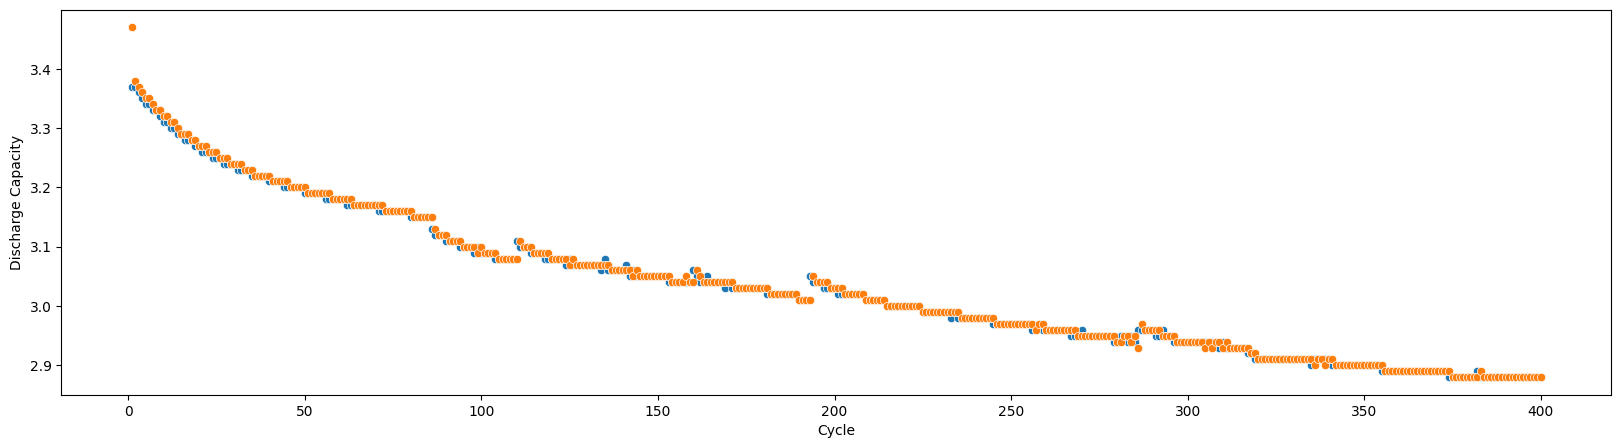

In [17]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=bat_data, x='Cycle',y='Discharge Capacity')
sns.scatterplot(data=bat_data, x='Cycle',y='Charge Capacity')
plt.show()

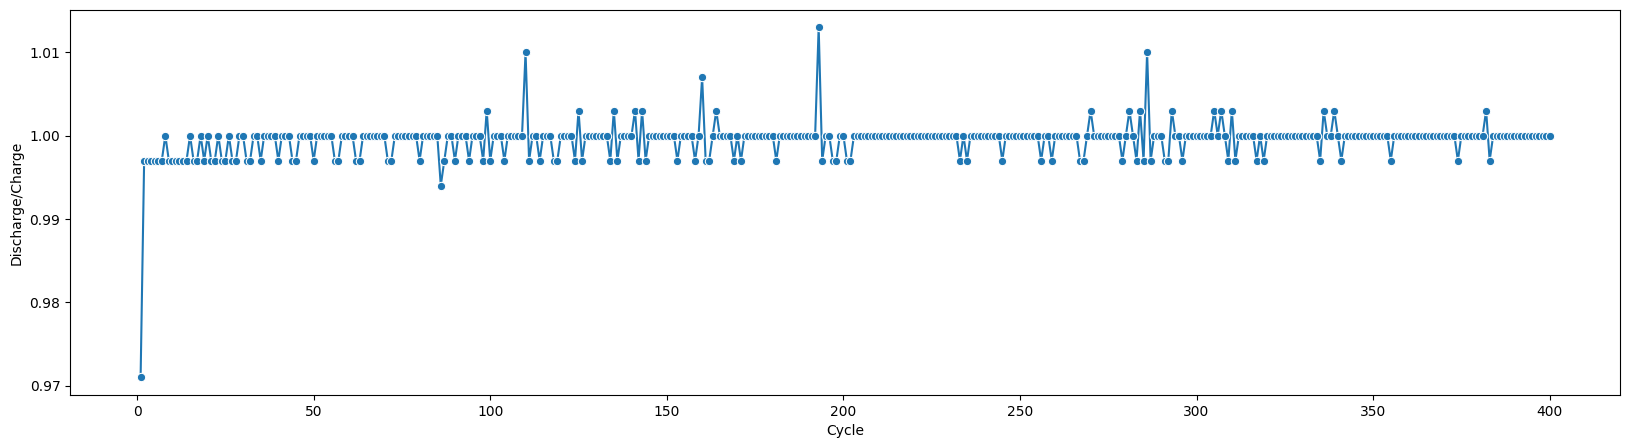

In [18]:
plt.figure(figsize=(20,5))
sns.lineplot(data=bat_data, x='Cycle',y='Discharge/Charge', marker='o')
plt.show()

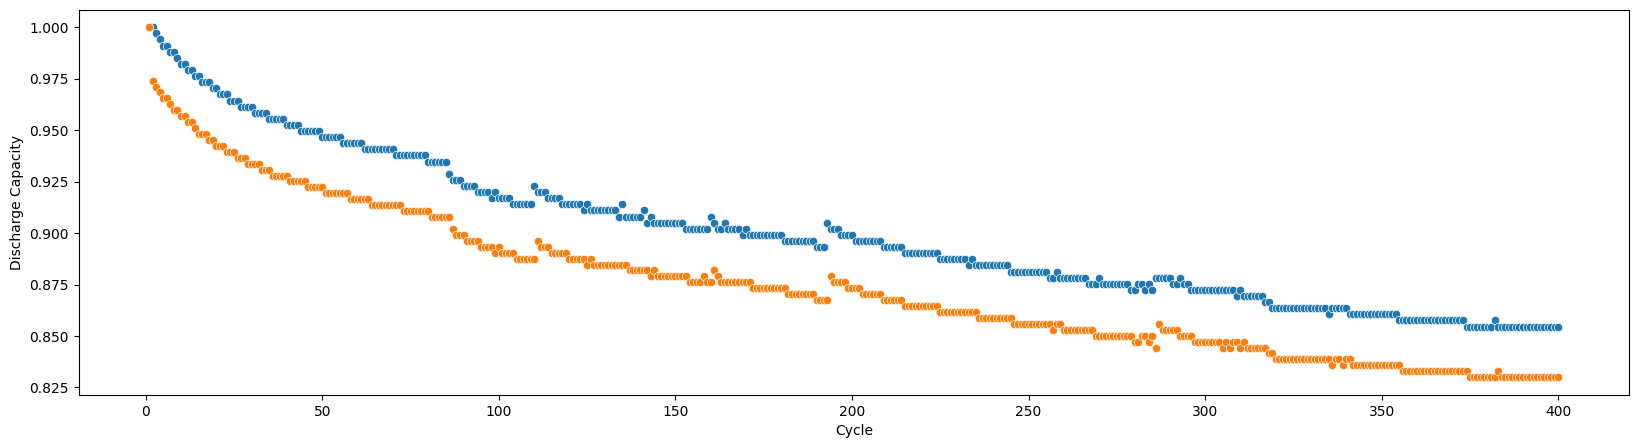

In [19]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=bat_data, x='Cycle',y=(bat_data['Discharge Capacity']/bat_data['Discharge Capacity'][0]))
sns.scatterplot(data=bat_data, x='Cycle',y=(bat_data['Charge Capacity']/bat_data['Charge Capacity'][0]))
plt.show()

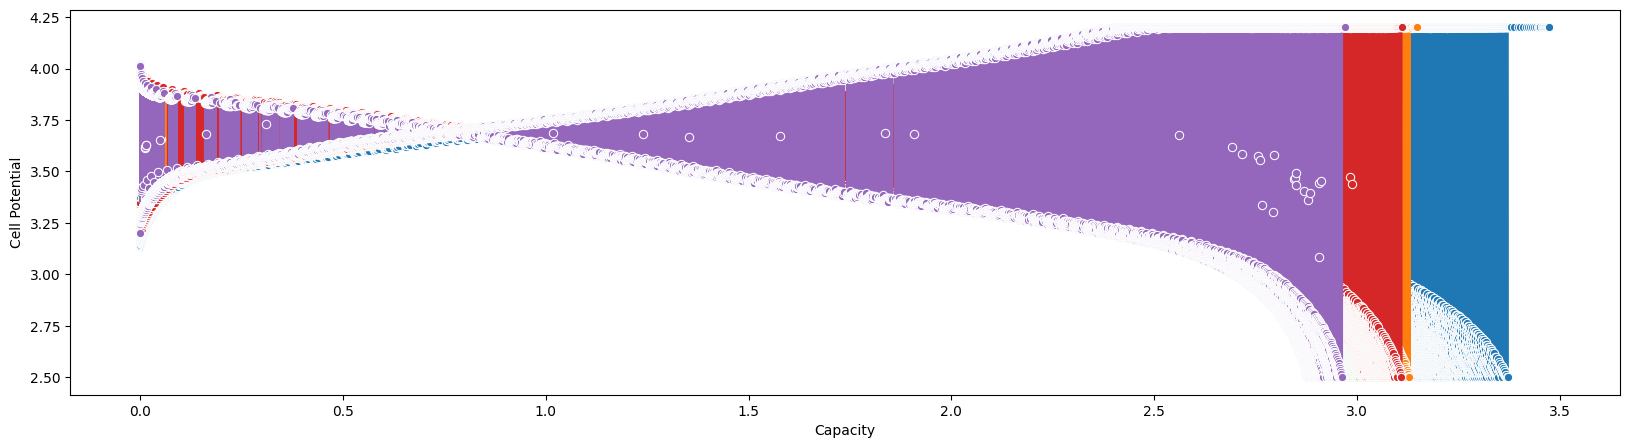

In [19]:
plt.figure(figsize=(20,5))
sns.lineplot(data=bat_data, x='Capacity',y='Cell Potential', marker='o')
sns.lineplot(data=bat_data, x='Capacity.1',y='Cell Potential.1', marker='o')
sns.lineplot(data=bat_data, x='Capacity.2',y='Cell Potential.2', marker='o')
sns.lineplot(data=bat_data, x='Capacity.3',y='Cell Potential.3', marker='o')
sns.lineplot(data=bat_data, x='Capacity.4',y='Cell Potential.4', marker='o')
#plt.ylim(2.5, 4.4)
plt.show()

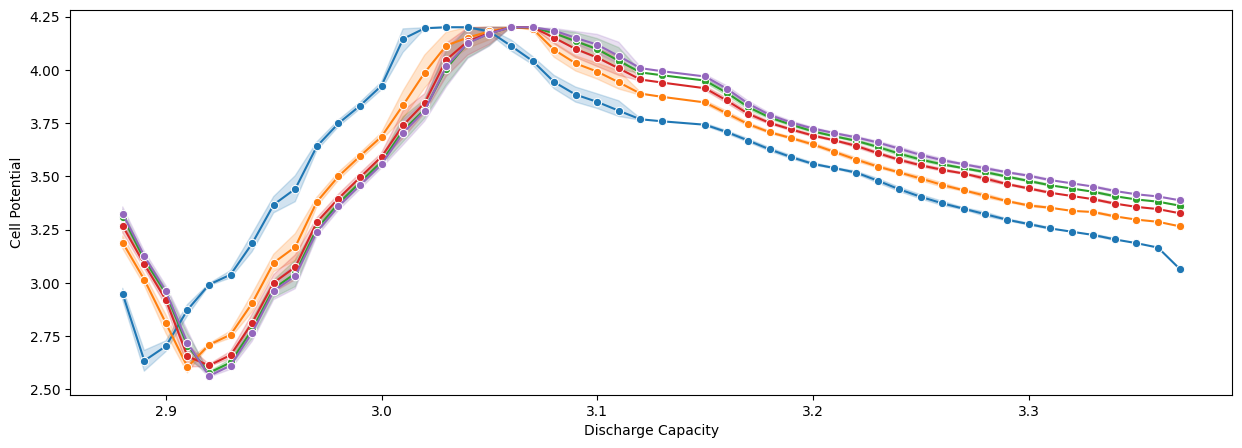

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(data=bat_data, x='Discharge Capacity',y='Cell Potential', marker='o')
sns.lineplot(data=bat_data, x='Discharge Capacity',y='Cell Potential.1', marker='o')
sns.lineplot(data=bat_data, x='Discharge Capacity',y='Cell Potential.2', marker='o')
sns.lineplot(data=bat_data, x='Discharge Capacity',y='Cell Potential.3', marker='o')
sns.lineplot(data=bat_data, x='Discharge Capacity',y='Cell Potential.4', marker='o')
#plt.ylim(2.5, 4.4)
plt.show()

In [21]:
dC = bat_data['Capacity'].diff()
dV = bat_data['Cell Potential'].diff()
dCdV = dC/dV

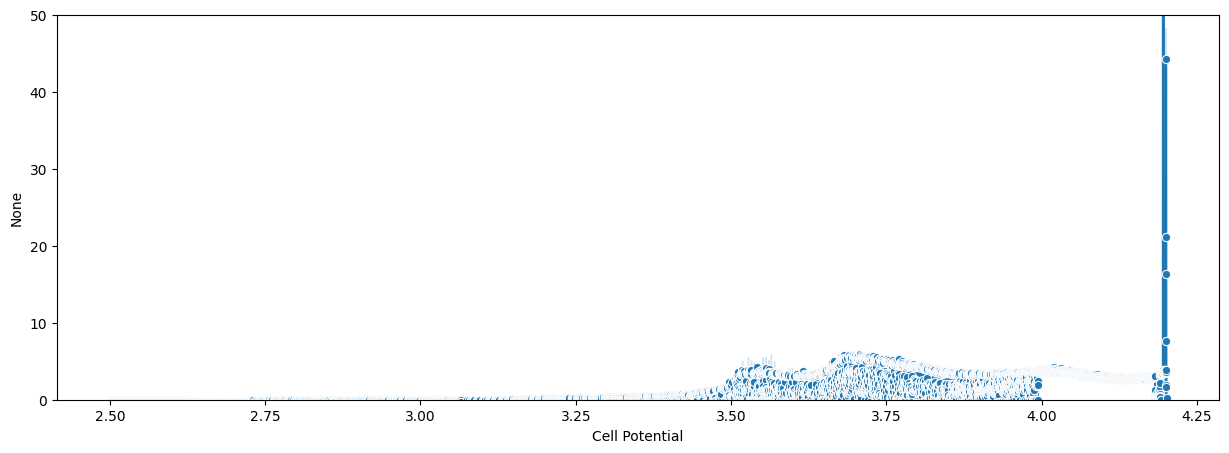

In [88]:
plt.figure(figsize=(15,5))
sns.lineplot(data=bat_data, x='Cell Potential', y=dCdV, marker='o')
#sns.lineplot(data=bat_data, x='Charge Capacity',y='Cell Potential.1', marker='o')
#sns.lineplot(data=bat_data, x='Charge Capacity',y='Cell Potential.2', marker='o')
#sns.lineplot(data=bat_data, x='Charge Capacity',y='Cell Potential.3', marker='o')
#sns.lineplot(data=bat_data, x='Charge Capacity',y='Cell Potential.4', marker='o')
#plt.xlim(3.5, 4.5)
plt.ylim(0, 50)
plt.show()

In [22]:
cycle1_data = pd.DataFrame(bat_data[['Test Time', 'Cycle Number', 'Temp', 'Capacity','Cell Potential']])
cycle1_data.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   0.000000           0.0  25.690142  0.000000        3.065919
1   0.002778           0.0  25.690142  0.000000        3.065614
2   0.002792           1.0  25.690142  0.000021        3.165103
3   0.002836           1.0  25.690142  0.000087        3.186008
4   0.002917           1.0  25.690142  0.000208        3.198215

In [23]:
cycle1_data.describe().T

count        mean        std        min        25%  \
Test Time       34454.0  172.657689  99.646035   0.000000  86.730477   
Cycle Number    34454.0   44.295873  25.440982   0.000000  22.000000   
Temp            34454.0   27.743439   3.336833  24.795521  25.945747   
Capacity        34454.0    1.484761   1.260353   0.000000   0.047253   
Cell Potential  34454.0    3.502952   0.495142   2.499809   3.081636   

                       50%         75%         max  
Test Time       172.767638  258.166271  352.960086  
Cycle Number     44.000000   67.000000   85.000000  
Temp             26.425007   28.102421   41.921673  
Capacity          1.396765    2.862401    3.474988  
Cell Potential    3.536431    3.923476    4.200885

In [24]:
cycle2_data = pd.DataFrame(bat_data[['Test Time.1', 'Cycle Number.1', 'Temp.1', 'Capacity.1','Cell Potential.1']])
cycle2_data.head()

Test Time.1  Cycle Number.1     Temp.1  Capacity.1  Cell Potential.1
0     0.000000            86.0  26.937492    0.000016          3.255589
1     0.002778            86.0  31.082670    0.000083          3.274815
2     0.002789            86.0  31.214361    0.000220          3.286259
3     0.002833            86.0  31.247282    0.001079          3.296483
4     0.002925            86.0  31.296665    0.002870          3.306554

In [25]:
cycle2_data.columns

Index(['Test Time.1', 'Cycle Number.1', 'Temp.1', 'Capacity.1',
       'Cell Potential.1'],
      dtype='object')

In [26]:
cycle2_data_dict = {'Test Time.1':'Test Time', 'Cycle Number.1': 'Cycle Number', 'Temp.1': 'Temp', 'Capacity.1': 'Capacity','Cell Potential.1': 'Cell Potential'}
cycle2_data.rename(columns=cycle2_data_dict, inplace=True)
cycle2_data.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   0.000000          86.0  26.937492  0.000016        3.255589
1   0.002778          86.0  31.082670  0.000083        3.274815
2   0.002789          86.0  31.214361  0.000220        3.286259
3   0.002833          86.0  31.247282  0.001079        3.296483
4   0.002925          86.0  31.296665  0.002870        3.306554

In [27]:
cycle3_data = pd.DataFrame(bat_data[['Test Time.2', 'Cycle Number.2', 'Temp.2', 'Capacity.2','Cell Potential.2']])
cycle3_data.head()

Test Time.2  Cycle Number.2     Temp.2  Capacity.2  Cell Potential.2
0     0.000000           110.0  24.693321    0.000016          3.354162
1     0.002778           110.0  24.743193    0.000087          3.370337
2     0.002789           110.0  24.759815    0.000362          3.380713
3     0.002833           110.0  24.759815    0.001954          3.391089
4     0.002978           110.0  24.759815    0.004466          3.401312

In [28]:
cycle3_data_dict = {'Test Time.2':'Test Time', 'Cycle Number.2': 'Cycle Number', 'Temp.2': 'Temp', 'Capacity.2': 'Capacity','Cell Potential.2': 'Cell Potential'}
cycle3_data.rename(columns=cycle3_data_dict, inplace=True)
cycle3_data.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   0.000000         110.0  24.693321  0.000016        3.354162
1   0.002778         110.0  24.743193  0.000087        3.370337
2   0.002789         110.0  24.759815  0.000362        3.380713
3   0.002833         110.0  24.759815  0.001954        3.391089
4   0.002978         110.0  24.759815  0.004466        3.401312

In [29]:
cycle4_data = pd.DataFrame(bat_data[['Test Time.3', 'Cycle Number.3', 'Temp.3', 'Capacity.3','Cell Potential.3']])
cycle4_data.head()

Test Time.3  Cycle Number.3     Temp.3  Capacity.3  Cell Potential.3
0     0.000000           203.0  25.723978    0.000016          3.317998
1     0.002778           203.0  25.690731    0.000083          3.335088
2     0.002789           203.0  25.707355    0.000300          3.345922
3     0.002836           203.0  25.707355    0.001675          3.356298
4     0.003019           203.0  25.707355    0.003862          3.366522

In [30]:
cycle4_data_dict = {'Test Time.3':'Test Time', 'Cycle Number.3': 'Cycle Number', 'Temp.3': 'Temp', 'Capacity.3': 'Capacity','Cell Potential.3': 'Cell Potential'}
cycle4_data.rename(columns=cycle4_data_dict, inplace=True)
cycle4_data.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   0.000000         203.0  25.723978  0.000016        3.317998
1   0.002778         203.0  25.690731  0.000083        3.335088
2   0.002789         203.0  25.707355  0.000300        3.345922
3   0.002836         203.0  25.707355  0.001675        3.356298
4   0.003019         203.0  25.707355  0.003862        3.366522

In [31]:
cycle5_data = pd.DataFrame(bat_data[['Test Time.4', 'Cycle Number.4', 'Temp.4', 'Capacity.4','Cell Potential.4']])
cycle5_data.head()

Test Time.4  Cycle Number.4     Temp.4  Capacity.4  Cell Potential.4
0     0.000000           286.0  28.948936    0.000021          3.379950
1     0.002778           286.0  29.015428    0.000100          3.394903
2     0.002792           286.0  29.015428    0.000470          3.405280
3     0.002844           286.0  29.015428    0.002204          3.415503
4     0.003092           286.0  28.982182    0.004866          3.425879

In [32]:
cycle5_data_dict = {'Test Time.4':'Test Time', 'Cycle Number.4': 'Cycle Number', 'Temp.4': 'Temp', 'Capacity.4': 'Capacity','Cell Potential.4': 'Cell Potential'}
cycle5_data.rename(columns=cycle5_data_dict, inplace=True)
cycle5_data.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   0.000000         286.0  28.948936  0.000021        3.379950
1   0.002778         286.0  29.015428  0.000100        3.394903
2   0.002792         286.0  29.015428  0.000470        3.405280
3   0.002844         286.0  29.015428  0.002204        3.415503
4   0.003092         286.0  28.982182  0.004866        3.425879

In [33]:
bat_df_list = [cycle1_data, cycle2_data, cycle3_data, cycle4_data, cycle5_data]
bat_df_full = pd.concat(bat_df_list, ignore_index=True)
bat_df_full.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   0.000000           0.0  25.690142  0.000000        3.065919
1   0.002778           0.0  25.690142  0.000000        3.065614
2   0.002792           1.0  25.690142  0.000021        3.165103
3   0.002836           1.0  25.690142  0.000087        3.186008
4   0.002917           1.0  25.690142  0.000208        3.198215

In [34]:
bat_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264785 entries, 0 to 264784
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Test Time       177397 non-null  float64
 1   Cycle Number    168531 non-null  float64
 2   Temp            168539 non-null  float64
 3   Capacity        168531 non-null  float64
 4   Cell Potential  168531 non-null  float64
dtypes: float64(5)
memory usage: 10.1 MB


In [35]:
bat_df_full.describe().T

count        mean         std        min         25%  \
Test Time       177397.0  196.282548  128.148121   0.000000   86.785586   
Cycle Number    168531.0  199.575710  113.239594   0.000000  105.000000   
Temp            168539.0   27.931864    2.638524  23.130714   26.056448   
Capacity        168531.0    1.350260    1.206779   0.000000    0.003528   
Cell Potential  168531.0    3.498240    0.486182   2.499809    3.134890   

                       50%         75%         max  
Test Time       183.142967  291.165253  542.615153  
Cycle Number    202.000000  291.000000  400.000000  
Temp             26.888292   29.347898   42.920246  
Capacity          1.218937    2.678648    3.474988  
Cell Potential    3.489204    3.912566    4.200885

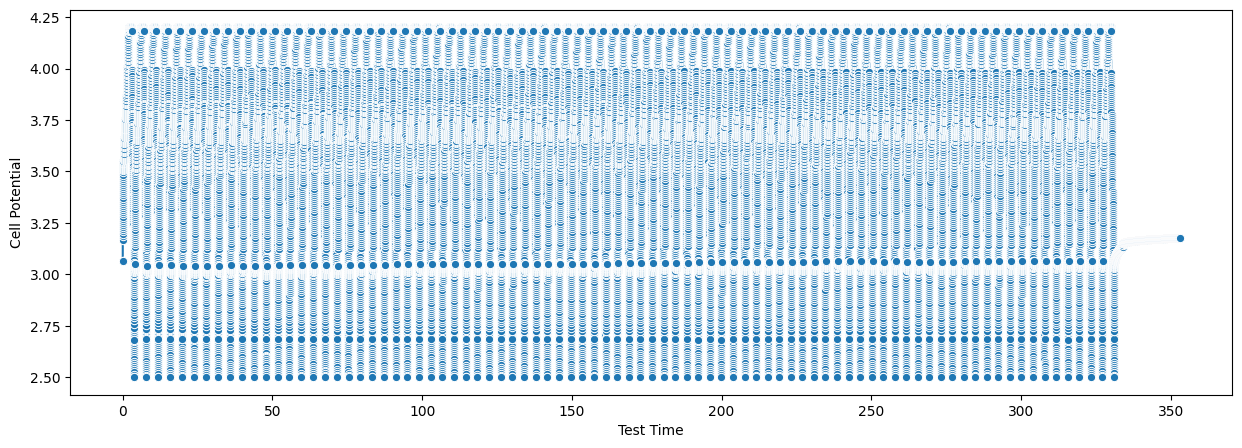

In [36]:
plt.figure(figsize=(15,5))
sns.lineplot(x=cycle1_data['Test Time'],y=cycle1_data['Cell Potential'], marker='o');
plt.show()

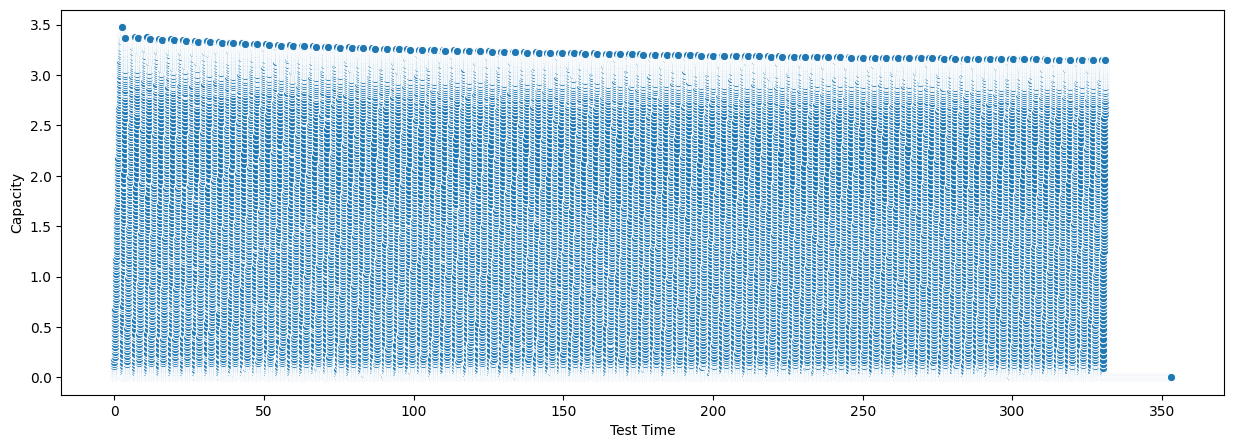

In [37]:
plt.figure(figsize=(15,5))
sns.lineplot(x=cycle1_data['Test Time'],y=cycle1_data['Capacity'], marker='o');
plt.show()

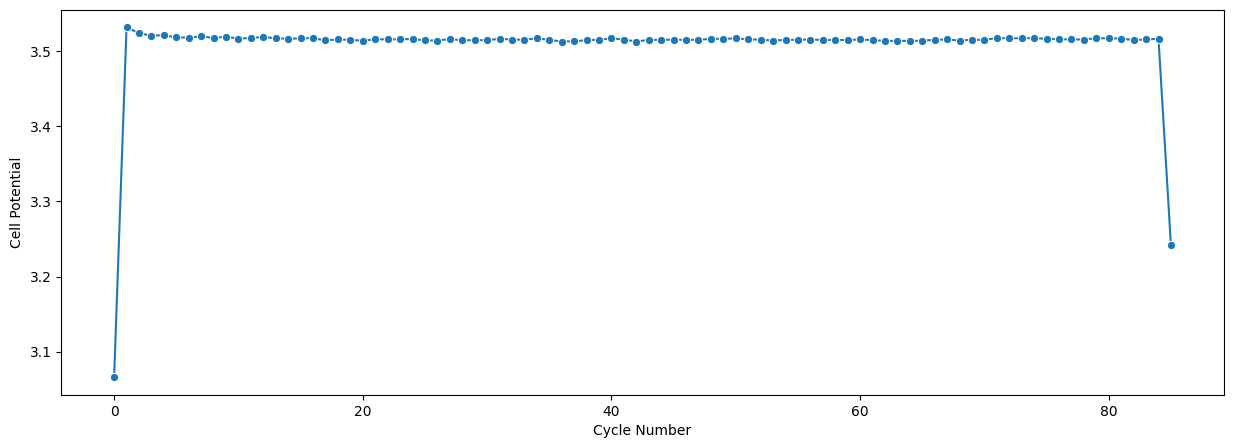

In [38]:
plt.figure(figsize=(15,5))
sns.lineplot(x=cycle1_data['Cycle Number'],y=cycle1_data['Cell Potential'], marker='o', errorbar=None);
plt.show()

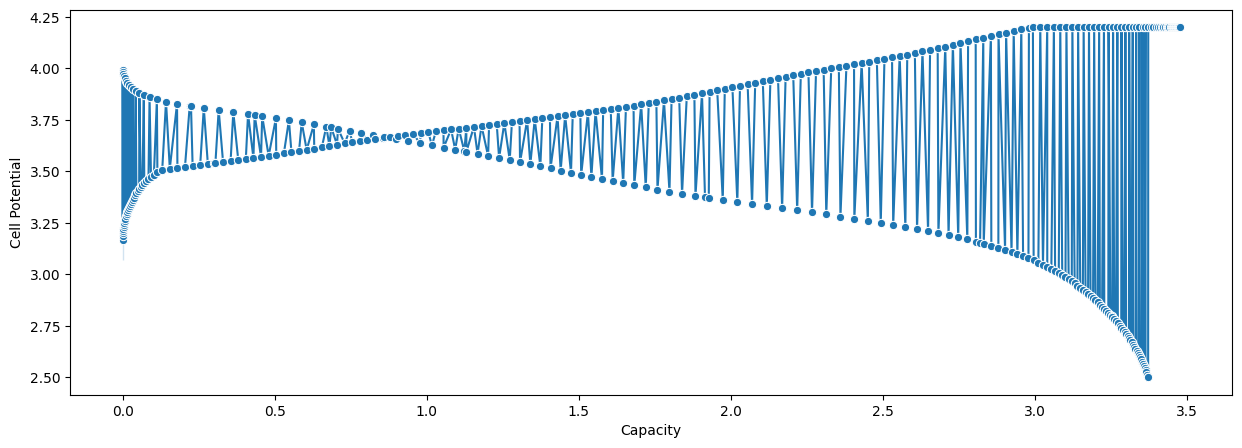

In [47]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle1_data[cycle1_data['Cycle Number']==1], x='Capacity',y='Cell Potential', marker='o');
plt.show()

In [48]:
cycle_1 = cycle1_data[cycle1_data['Cycle Number']<=1]
cycle_1.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   0.000000           0.0  25.690142  0.000000        3.065919
1   0.002778           0.0  25.690142  0.000000        3.065614
2   0.002792           1.0  25.690142  0.000021        3.165103
3   0.002836           1.0  25.690142  0.000087        3.186008
4   0.002917           1.0  25.690142  0.000208        3.198215

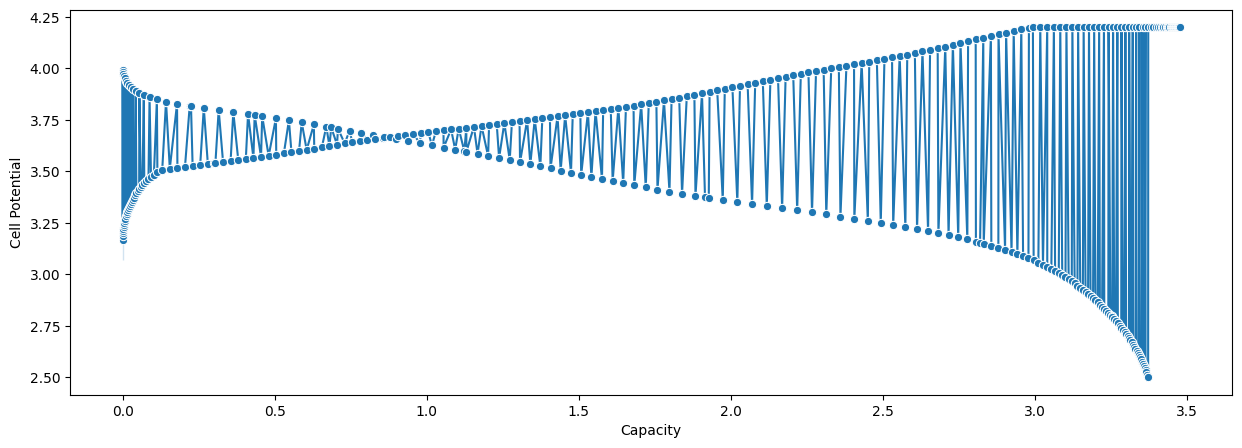

In [49]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1, x='Capacity',y='Cell Potential', marker='o')
plt.show()

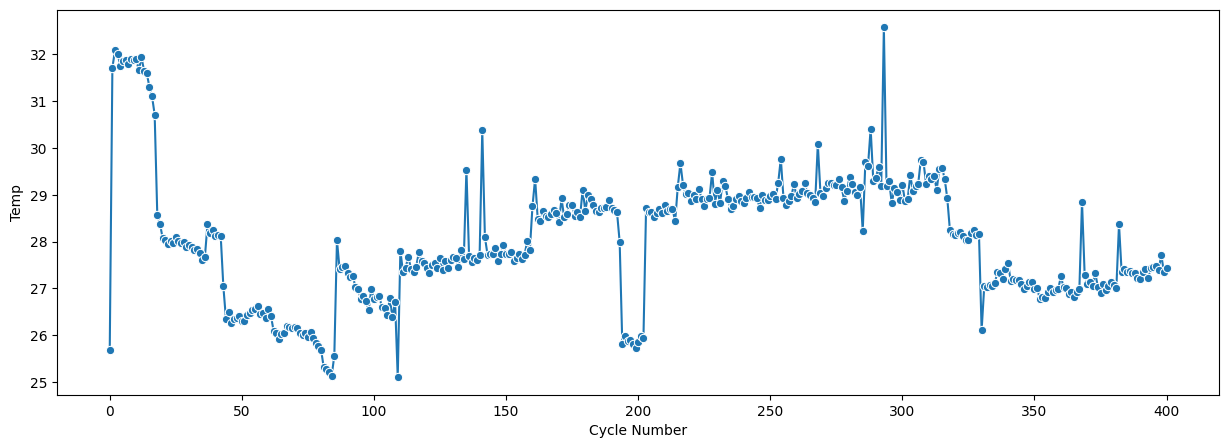

In [50]:
plt.figure(figsize=(15,5))
sns.lineplot(x = bat_df_full['Cycle Number'], y=bat_df_full['Temp'].rolling(2).mean(), marker='o', errorbar=None);
plt.show()

In [51]:
single_cycle_bat_df = pd.DataFrame(bat_data[['Cycle', 'Charge Capacity', 'Discharge Capacity', 'Discharge/Charge']])
single_cycle_bat_df.head()

Cycle  Charge Capacity  Discharge Capacity  Discharge/Charge
0    1.0             3.47                3.37             0.971
1    2.0             3.38                3.37             0.997
2    3.0             3.37                3.36             0.997
3    4.0             3.36                3.35             0.997
4    5.0             3.35                3.34             0.997

In [52]:
single_cycle_bat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52957 entries, 0 to 52956
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cycle               400 non-null    float64
 1   Charge Capacity     400 non-null    float64
 2   Discharge Capacity  400 non-null    float64
 3   Discharge/Charge    400 non-null    float64
dtypes: float64(4)
memory usage: 1.6 MB


In [53]:
single_cycle_bat_df['Discharge/Charge'] = single_cycle_bat_df['Discharge/Charge']*100
single_cycle_bat_df.head()

Cycle  Charge Capacity  Discharge Capacity  Discharge/Charge
0    1.0             3.47                3.37              97.1
1    2.0             3.38                3.37              99.7
2    3.0             3.37                3.36              99.7
3    4.0             3.36                3.35              99.7
4    5.0             3.35                3.34              99.7

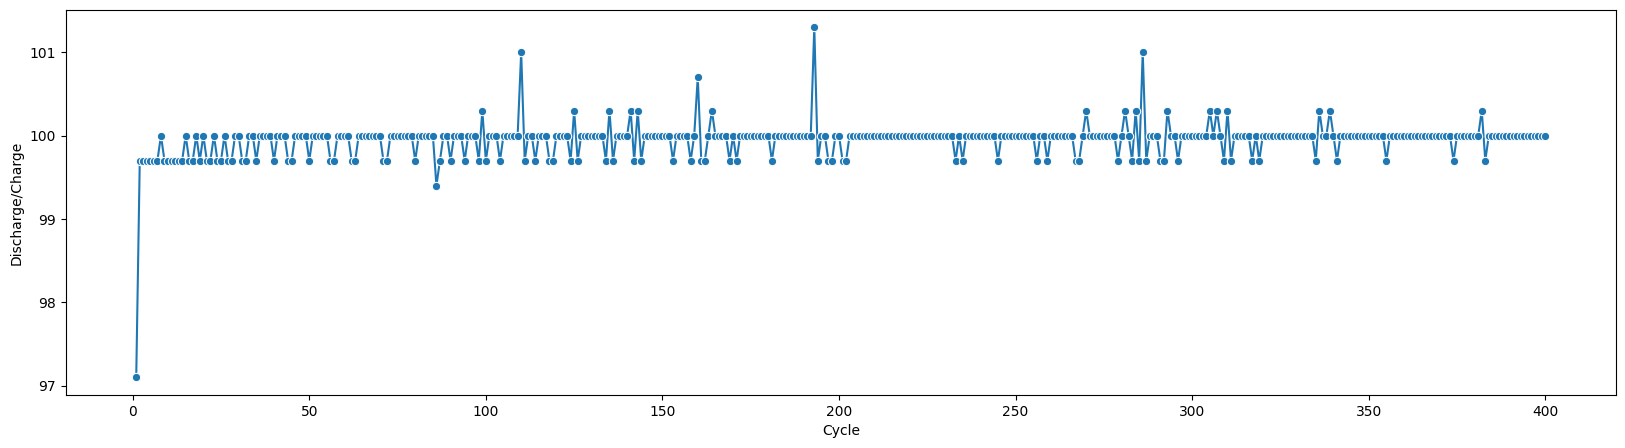

In [54]:
plt.figure(figsize=(20,5))
sns.lineplot(data=single_cycle_bat_df, x='Cycle',y='Discharge/Charge', marker='o')
plt.show()

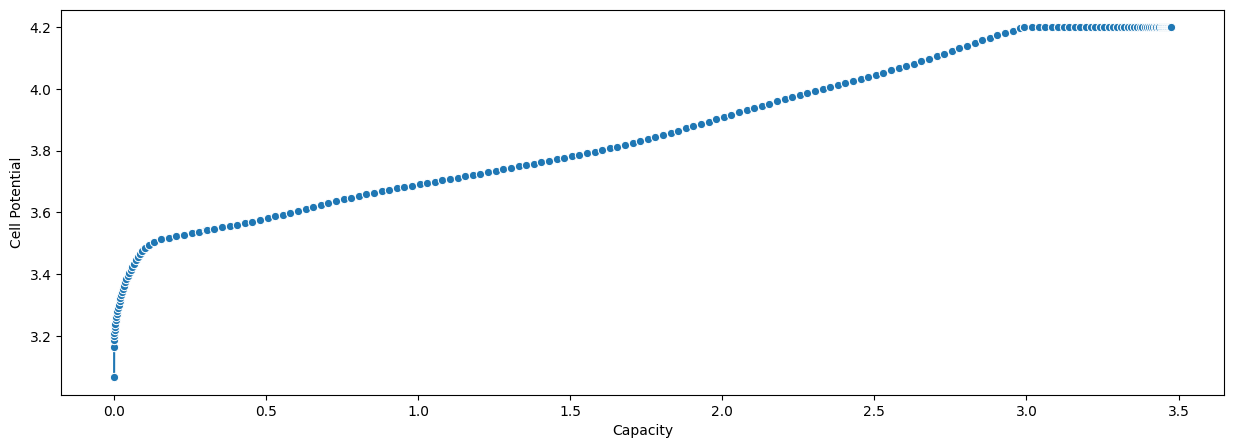

In [55]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1[0:201], x='Capacity',y='Cell Potential', marker='o')
#plt.xlim(-0.001,0.001)
plt.show()

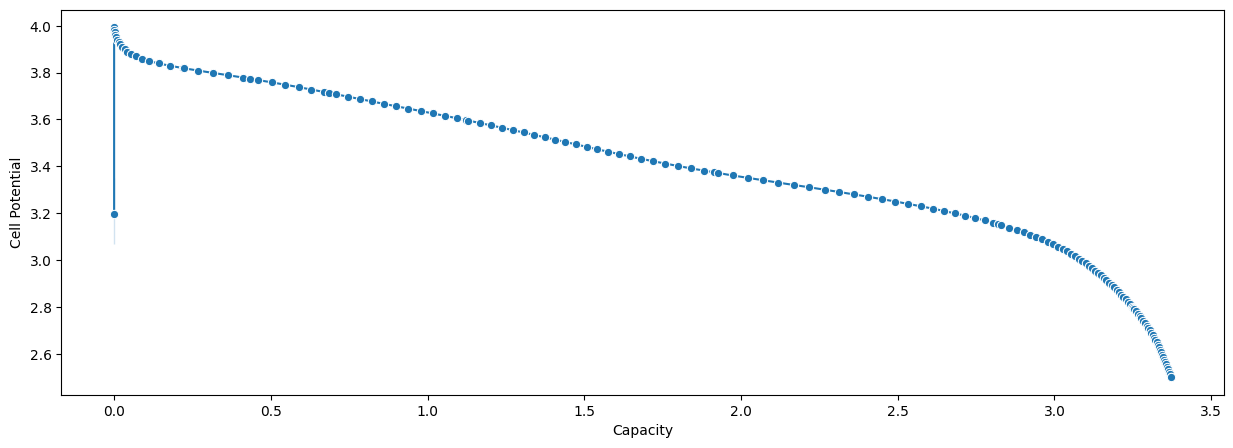

In [56]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1[201:], x='Capacity',y='Cell Potential', marker='o')
#plt.xlim(-0.001,0.001)
plt.show()

In [57]:
cycle_1_charge_df = pd.DataFrame(cycle_1[0:201])
cycle_1_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   0.000000           0.0  25.690142  0.000000        3.065919
1   0.002778           0.0  25.690142  0.000000        3.065614
2   0.002792           1.0  25.690142  0.000021        3.165103
3   0.002836           1.0  25.690142  0.000087        3.186008
4   0.002917           1.0  25.690142  0.000208        3.198215

In [58]:
cycle_1_charge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Test Time       201 non-null    float64
 1   Cycle Number    201 non-null    float64
 2   Temp            201 non-null    float64
 3   Capacity        201 non-null    float64
 4   Cell Potential  201 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


In [59]:
cycle_1_charge_df ['diffChargeCapacity'] = cycle_1_charge_df['Capacity'].diff()
cycle_1_charge_df ['diffChargeVoltage'] = cycle_1_charge_df['Cell Potential'].diff()
cycle_1_charge_df ['dCdV'] = cycle_1_charge_df['diffChargeCapacity']/cycle_1_charge_df['diffChargeVoltage']
cycle_1_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0   0.000000           0.0  25.690142  0.000000        3.065919   
1   0.002778           0.0  25.690142  0.000000        3.065614   
2   0.002792           1.0  25.690142  0.000021        3.165103   
3   0.002836           1.0  25.690142  0.000087        3.186008   
4   0.002917           1.0  25.690142  0.000208        3.198215   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000000          -0.000305 -0.000000  
2            0.000021           0.099489  0.000206  
3            0.000067           0.020905  0.003191  
4            0.000121           0.012207  0.009896

In [60]:
cycle_1_charge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Test Time           201 non-null    float64
 1   Cycle Number        201 non-null    float64
 2   Temp                201 non-null    float64
 3   Capacity            201 non-null    float64
 4   Cell Potential      201 non-null    float64
 5   diffChargeCapacity  200 non-null    float64
 6   diffChargeVoltage   200 non-null    float64
 7   dCdV                200 non-null    float64
dtypes: float64(8)
memory usage: 14.1 KB


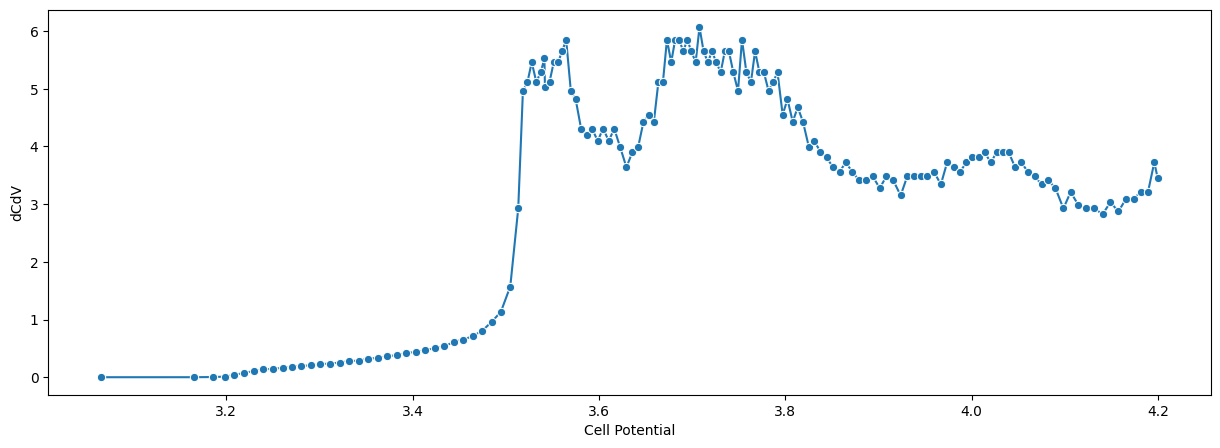

In [61]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1_charge_df, x=cycle_1_charge_df['Cell Potential'].iloc[0:151],y=cycle_1_charge_df['dCdV'].iloc[0:151], marker='o')
plt.show()

In [62]:
cycle_1_discharge_df = pd.DataFrame(cycle_1[201:])
cycle_1_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
201   2.785850           1.0  26.217327       0.0        4.195849
202   2.802517           1.0  26.217327       0.0        4.191119
203   2.819183           1.0  26.137451       0.0        4.189136
204   2.835850           1.0  26.137451       0.0        4.187762
205   2.852517           1.0  26.057575       0.0        4.186847

In [63]:
cycle_1_discharge_df.reset_index(drop=True, inplace=True)
cycle_1_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   2.785850           1.0  26.217327       0.0        4.195849
1   2.802517           1.0  26.217327       0.0        4.191119
2   2.819183           1.0  26.137451       0.0        4.189136
3   2.835850           1.0  26.137451       0.0        4.187762
4   2.852517           1.0  26.057575       0.0        4.186847

In [64]:
cycle_1_discharge_df ['diffChargeCapacity'] = cycle_1_discharge_df['Capacity'].diff()
cycle_1_discharge_df ['diffChargeVoltage'] = cycle_1_discharge_df['Cell Potential'].diff()
cycle_1_discharge_df ['dCdV'] = cycle_1_discharge_df['diffChargeCapacity']/cycle_1_discharge_df['diffChargeVoltage']
cycle_1_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0   2.785850           1.0  26.217327       0.0        4.195849   
1   2.802517           1.0  26.217327       0.0        4.191119   
2   2.819183           1.0  26.137451       0.0        4.189136   
3   2.835850           1.0  26.137451       0.0        4.187762   
4   2.852517           1.0  26.057575       0.0        4.186847   

   diffChargeCapacity  diffChargeVoltage  dCdV  
0                 NaN                NaN   NaN  
1                 0.0          -0.004730  -0.0  
2                 0.0          -0.001984  -0.0  
3                 0.0          -0.001373  -0.0  
4                 0.0          -0.000916  -0.0

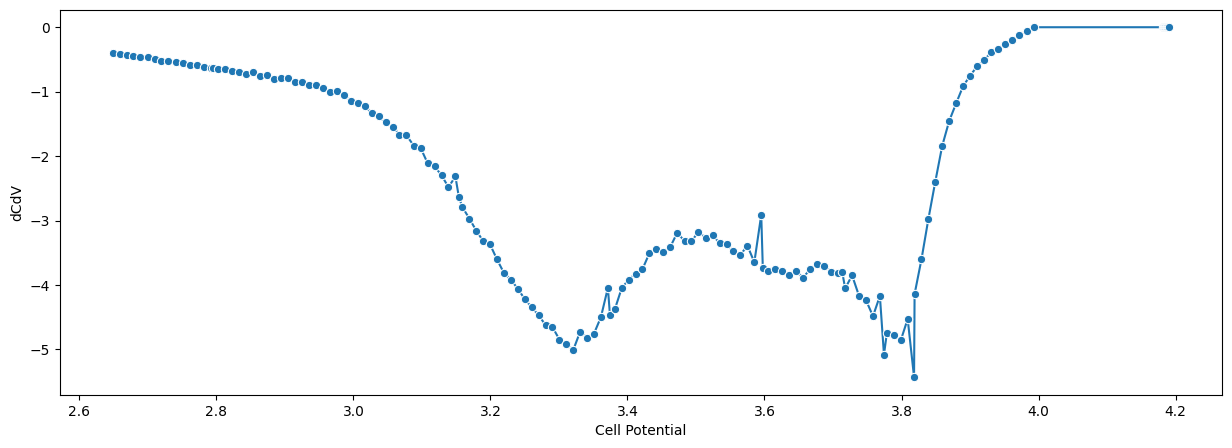

In [65]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1_discharge_df, x=cycle_1_discharge_df['Cell Potential'].iloc[0:151],y=cycle_1_discharge_df['dCdV'].iloc[0:151], marker='o')
plt.show()

In [66]:
cycle_2 = cycle1_data[cycle1_data['Cycle Number']==2]
cycle_2.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
409   4.128775           2.0  28.581680  0.000021        3.133059
410   4.128847           2.0  28.581680  0.000129        3.145571
411   4.129128           2.0  28.565706  0.000550        3.156252
412   4.129700           2.0  28.565706  0.001408        3.166628
413   4.130461           2.0  28.549728  0.002550        3.176852

In [67]:
cycle_2.reset_index(drop=True, inplace=True)
cycle_2.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   4.128775           2.0  28.581680  0.000021        3.133059
1   4.128847           2.0  28.581680  0.000129        3.145571
2   4.129128           2.0  28.565706  0.000550        3.156252
3   4.129700           2.0  28.565706  0.001408        3.166628
4   4.130461           2.0  28.549728  0.002550        3.176852

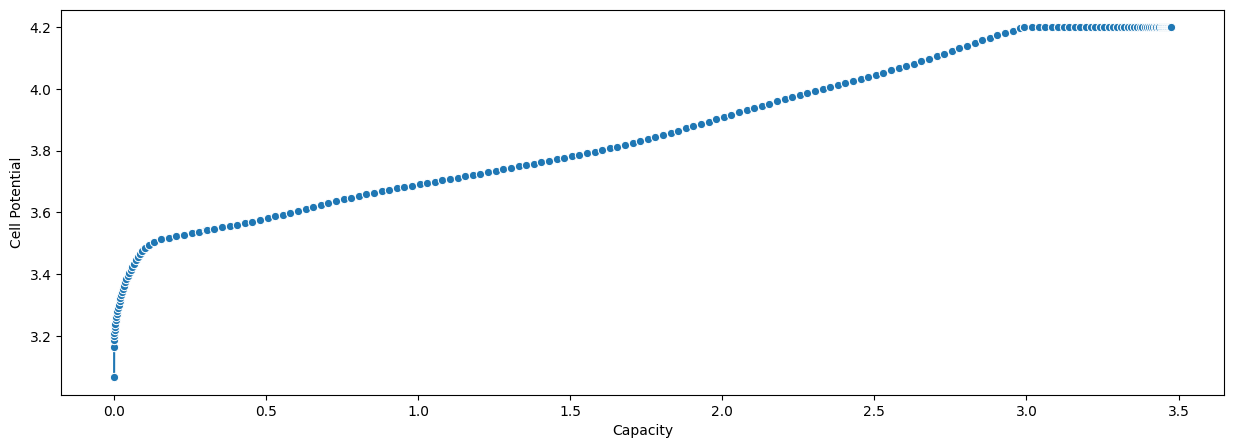

In [68]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1[0:201], x='Capacity',y='Cell Potential', marker='o')
plt.show()

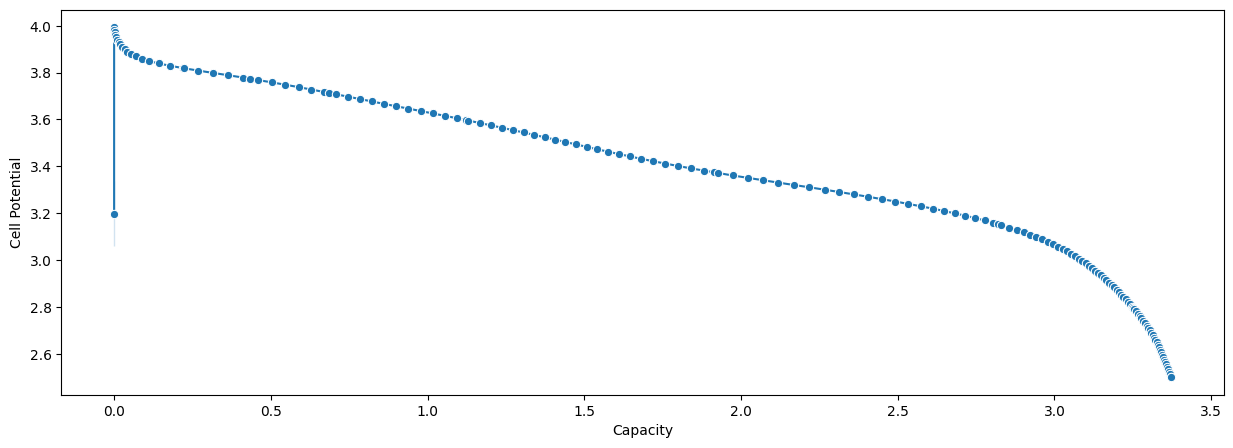

In [69]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1[201:], x='Capacity',y='Cell Potential', marker='o')
plt.show()

In [70]:
cycle_2_charge_df = pd.DataFrame(cycle_2[0:201])
cycle_2_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   4.128775           2.0  28.581680  0.000021        3.133059
1   4.128847           2.0  28.581680  0.000129        3.145571
2   4.129128           2.0  28.565706  0.000550        3.156252
3   4.129700           2.0  28.565706  0.001408        3.166628
4   4.130461           2.0  28.549728  0.002550        3.176852

In [71]:
cycle_2_charge_df ['diffChargeCapacity'] = cycle_2_charge_df['Capacity'].diff()
cycle_2_charge_df ['diffChargeVoltage'] = cycle_2_charge_df['Cell Potential'].diff()
cycle_2_charge_df ['dCdV'] = cycle_2_charge_df['diffChargeCapacity']/cycle_2_charge_df['diffChargeVoltage']
cycle_2_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0   4.128775           2.0  28.581680  0.000021        3.133059   
1   4.128847           2.0  28.581680  0.000129        3.145571   
2   4.129128           2.0  28.565706  0.000550        3.156252   
3   4.129700           2.0  28.565706  0.001408        3.166628   
4   4.130461           2.0  28.549728  0.002550        3.176852   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000108           0.012512  0.008663  
2            0.000421           0.010681  0.039396  
3            0.000858           0.010376  0.082719  
4            0.001142           0.010224  0.111663

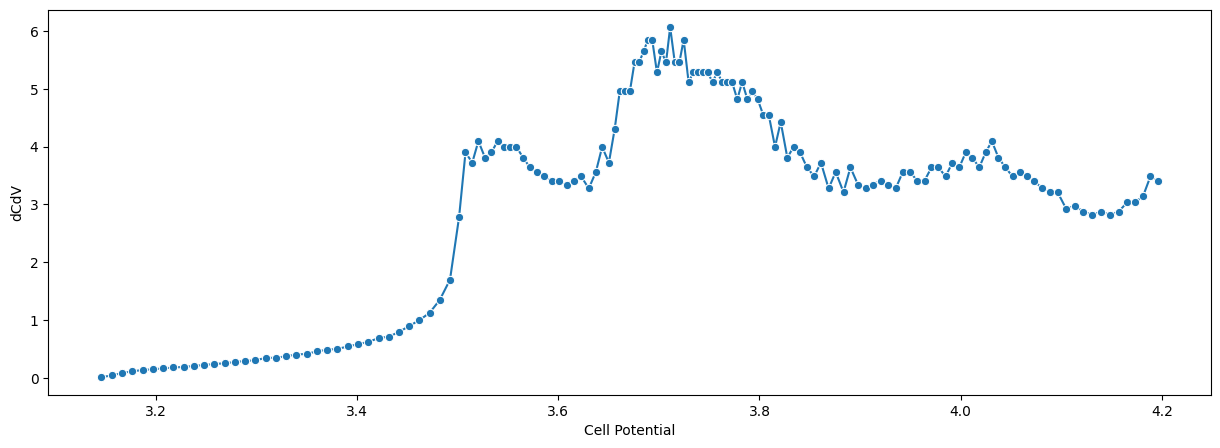

In [72]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_2_charge_df, x=cycle_2_charge_df['Cell Potential'].iloc[0:145],y=cycle_2_charge_df['dCdV'].iloc[0:145], marker='o')
plt.show()

In [73]:
cycle_2_discharge_df = pd.DataFrame(cycle_2[201:])
cycle_2_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
201   6.932431           2.0  25.881846       0.0        4.185321
202   6.949097           2.0  25.897820       0.0        4.184405
203   6.965764           2.0  25.913797       0.0        4.183795
204   6.982431           2.0  25.913797       0.0        4.183337
205   6.999094           2.0  25.929771       0.0        4.182879

In [74]:
cycle_2_discharge_df.reset_index(drop=True, inplace=True)
cycle_2_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   6.932431           2.0  25.881846       0.0        4.185321
1   6.949097           2.0  25.897820       0.0        4.184405
2   6.965764           2.0  25.913797       0.0        4.183795
3   6.982431           2.0  25.913797       0.0        4.183337
4   6.999094           2.0  25.929771       0.0        4.182879

In [75]:
cycle_2_discharge_df ['diffChargeCapacity'] = cycle_2_discharge_df['Capacity'].diff()
cycle_2_discharge_df ['diffChargeVoltage'] = cycle_2_discharge_df['Cell Potential'].diff()
cycle_2_discharge_df ['dCdV'] = cycle_2_discharge_df['diffChargeCapacity']/cycle_2_discharge_df['diffChargeVoltage']
cycle_2_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0   6.932431           2.0  25.881846       0.0        4.185321   
1   6.949097           2.0  25.897820       0.0        4.184405   
2   6.965764           2.0  25.913797       0.0        4.183795   
3   6.982431           2.0  25.913797       0.0        4.183337   
4   6.999094           2.0  25.929771       0.0        4.182879   

   diffChargeCapacity  diffChargeVoltage  dCdV  
0                 NaN                NaN   NaN  
1                 0.0          -0.000916  -0.0  
2                 0.0          -0.000610  -0.0  
3                 0.0          -0.000458  -0.0  
4                 0.0          -0.000458  -0.0

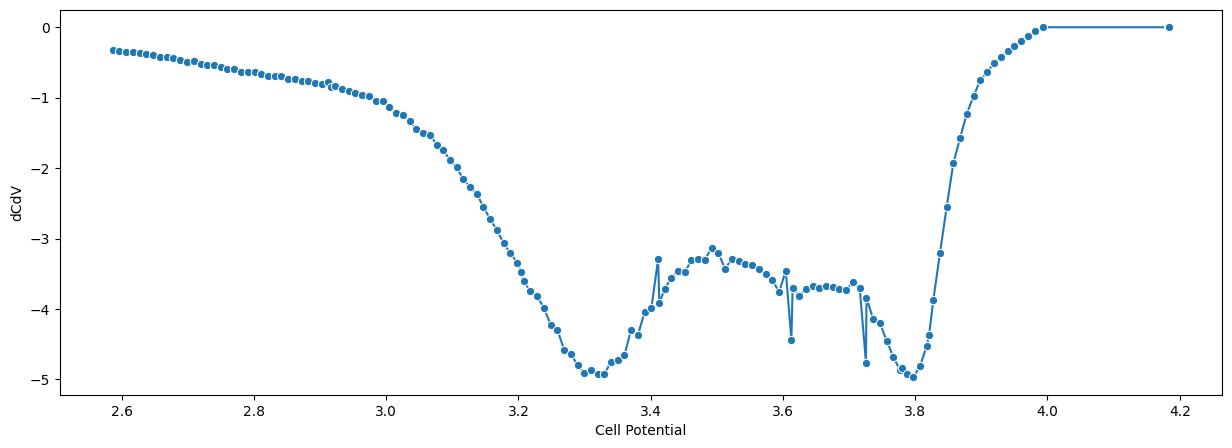

In [76]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_2_discharge_df, x=cycle_2_discharge_df['Cell Potential'].iloc[0:151],y=cycle_2_discharge_df['dCdV'].iloc[0:151], marker='o')
plt.show()

In [77]:
cycle_3 = cycle1_data[cycle1_data['Cycle Number']==3]
cycle_3.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
812   8.174308           3.0  29.316547  0.000021        3.125734
813   8.174381           3.0  29.316547  0.000129        3.137942
814   8.174661           3.0  29.316547  0.000550        3.148470
815   8.175242           3.0  29.300571  0.001421        3.158846
816   8.176017           3.0  29.284597  0.002583        3.169375

In [78]:
cycle_3.reset_index(drop=True, inplace=True)
cycle_3.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   8.174308           3.0  29.316547  0.000021        3.125734
1   8.174381           3.0  29.316547  0.000129        3.137942
2   8.174661           3.0  29.316547  0.000550        3.148470
3   8.175242           3.0  29.300571  0.001421        3.158846
4   8.176017           3.0  29.284597  0.002583        3.169375

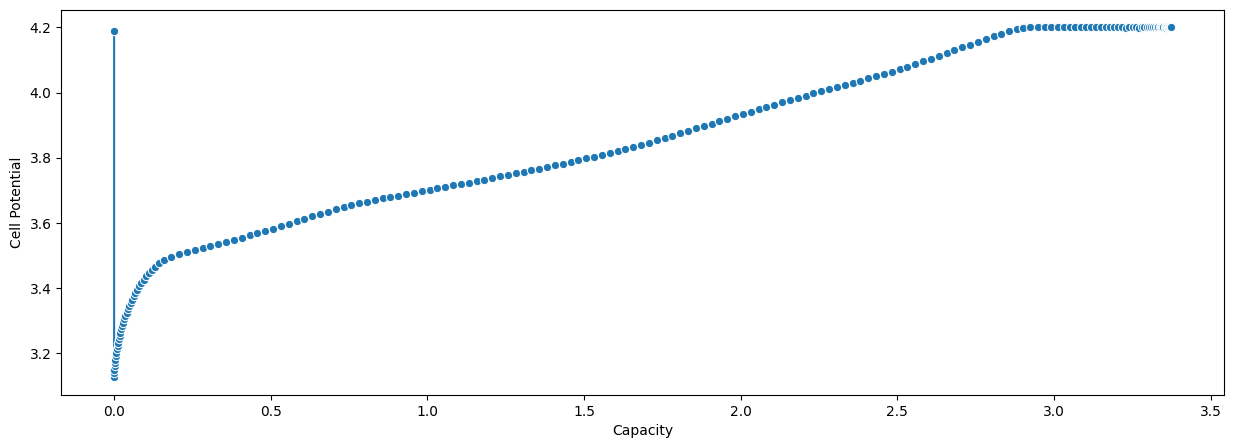

In [79]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_3[0:201], x='Capacity',y='Cell Potential', marker='o')
plt.show()

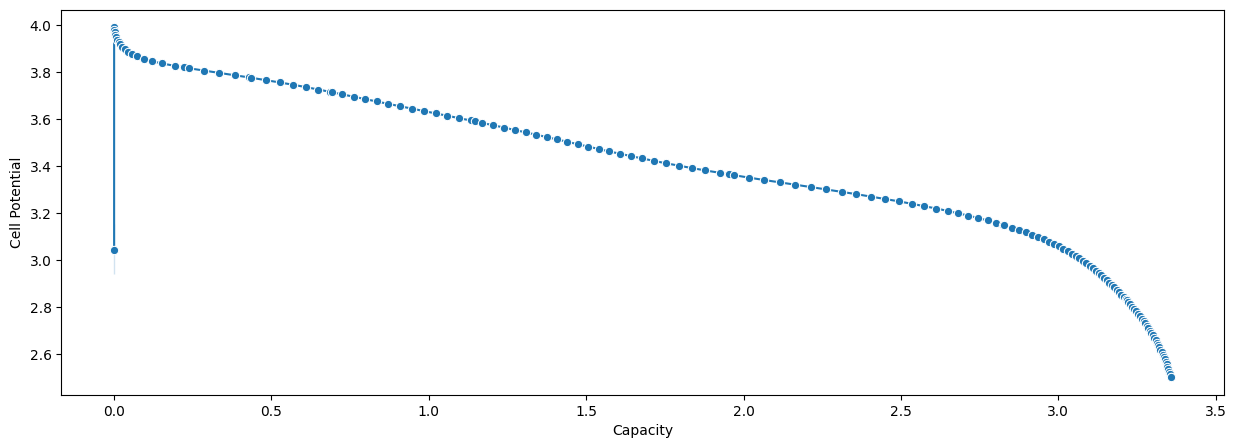

In [80]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_3[201:], x='Capacity',y='Cell Potential', marker='o')
plt.show()

In [81]:
cycle_3_charge_df = pd.DataFrame(cycle_3[0:201])
cycle_3_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   8.174308           3.0  29.316547  0.000021        3.125734
1   8.174381           3.0  29.316547  0.000129        3.137942
2   8.174661           3.0  29.316547  0.000550        3.148470
3   8.175242           3.0  29.300571  0.001421        3.158846
4   8.176017           3.0  29.284597  0.002583        3.169375

In [82]:
cycle_3_charge_df ['diffChargeCapacity'] = cycle_3_charge_df['Capacity'].diff()
cycle_3_charge_df ['diffChargeVoltage'] = cycle_3_charge_df['Cell Potential'].diff()
cycle_3_charge_df ['dCdV'] = cycle_3_charge_df['diffChargeCapacity']/cycle_3_charge_df['diffChargeVoltage']
cycle_3_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0   8.174308           3.0  29.316547  0.000021        3.125734   
1   8.174381           3.0  29.316547  0.000129        3.137942   
2   8.174661           3.0  29.316547  0.000550        3.148470   
3   8.175242           3.0  29.300571  0.001421        3.158846   
4   8.176017           3.0  29.284597  0.002583        3.169375   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000108           0.012207  0.008880  
2            0.000421           0.010529  0.039967  
3            0.000871           0.010376  0.083924  
4            0.001162           0.010529  0.110403

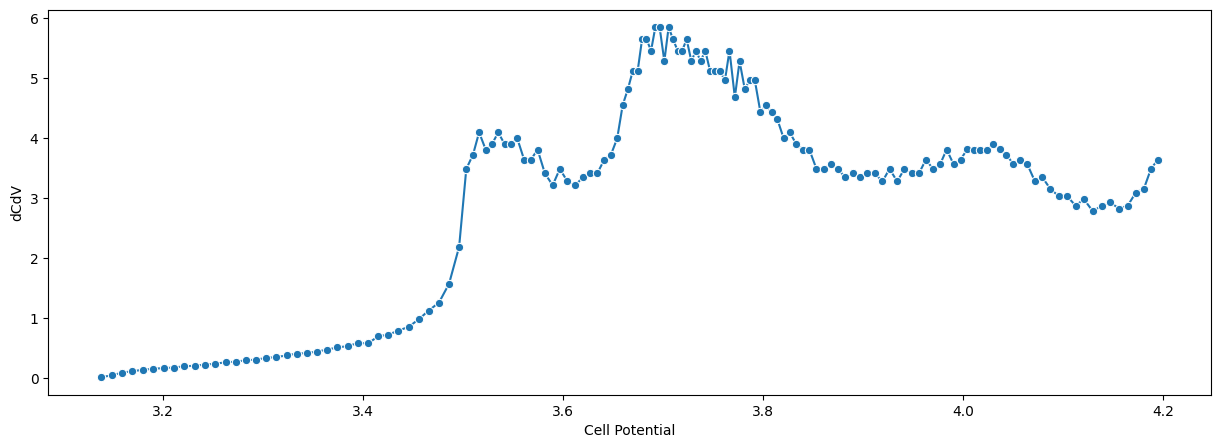

In [83]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_3_charge_df, x=cycle_3_charge_df['Cell Potential'].iloc[0:145],y=cycle_3_charge_df['dCdV'].iloc[0:145], marker='o')
plt.show()

In [84]:
cycle_3_discharge_df = pd.DataFrame(cycle_3[201:])
cycle_3_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
201  10.984022           3.0  25.865871  0.000000        4.184558
202  11.000689           3.0  25.913797  0.000000        4.183948
203  11.017356           3.0  25.897820  0.000000        4.183490
204  11.034019           3.0  25.817944  0.000000        4.183032
205  11.034033           3.0  25.817944  0.000056        3.991531

In [85]:
cycle_3_discharge_df.reset_index(drop=True, inplace=True)
cycle_3_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  10.984022           3.0  25.865871  0.000000        4.184558
1  11.000689           3.0  25.913797  0.000000        4.183948
2  11.017356           3.0  25.897820  0.000000        4.183490
3  11.034019           3.0  25.817944  0.000000        4.183032
4  11.034033           3.0  25.817944  0.000056        3.991531

In [86]:
cycle_3_discharge_df ['diffChargeCapacity'] = cycle_3_discharge_df['Capacity'].diff()
cycle_3_discharge_df ['diffChargeVoltage'] = cycle_3_discharge_df['Cell Potential'].diff()
cycle_3_discharge_df ['dCdV'] = cycle_3_discharge_df['diffChargeCapacity']/cycle_3_discharge_df['diffChargeVoltage']
cycle_3_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  10.984022           3.0  25.865871  0.000000        4.184558   
1  11.000689           3.0  25.913797  0.000000        4.183948   
2  11.017356           3.0  25.897820  0.000000        4.183490   
3  11.034019           3.0  25.817944  0.000000        4.183032   
4  11.034033           3.0  25.817944  0.000056        3.991531   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000000          -0.000610 -0.000000  
2            0.000000          -0.000458 -0.000000  
3            0.000000          -0.000458 -0.000000  
4            0.000056          -0.191501 -0.000293

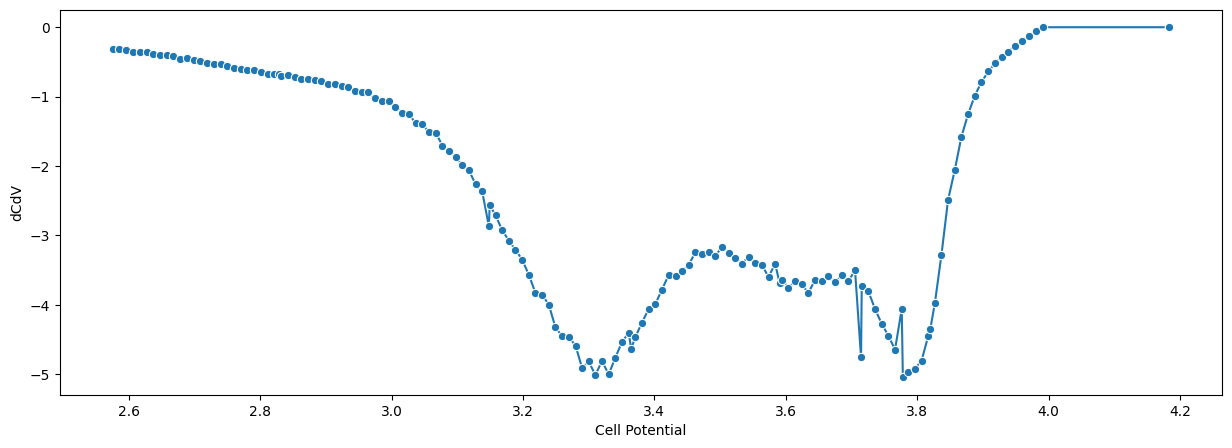

In [87]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_3_discharge_df, x=cycle_3_discharge_df['Cell Potential'].iloc[0:151],y=cycle_3_discharge_df['dCdV'].iloc[0:151], marker='o')
plt.show()

In [88]:
cycle_4 = cycle1_data[cycle1_data['Cycle Number']==4]
cycle_4.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
1214  12.206836           4.0  28.885214  0.000016        3.124971
1215  12.206897           4.0  28.885214  0.000108        3.138094
1216  12.207139           4.0  28.885214  0.000470        3.148623
1217  12.207697           4.0  28.885214  0.001308        3.159304
1218  12.208469           4.0  28.869236  0.002466        3.169528

In [89]:
cycle_4.reset_index(drop=True, inplace=True)
cycle_4.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  12.206836           4.0  28.885214  0.000016        3.124971
1  12.206897           4.0  28.885214  0.000108        3.138094
2  12.207139           4.0  28.885214  0.000470        3.148623
3  12.207697           4.0  28.885214  0.001308        3.159304
4  12.208469           4.0  28.869236  0.002466        3.169528

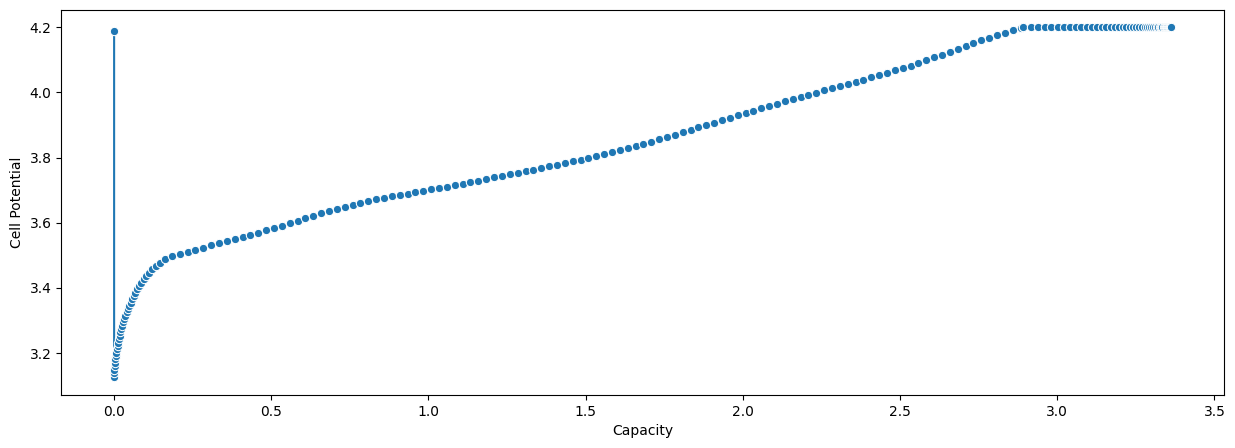

In [90]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_4[0:201], x='Capacity',y='Cell Potential', marker='o')
plt.show()

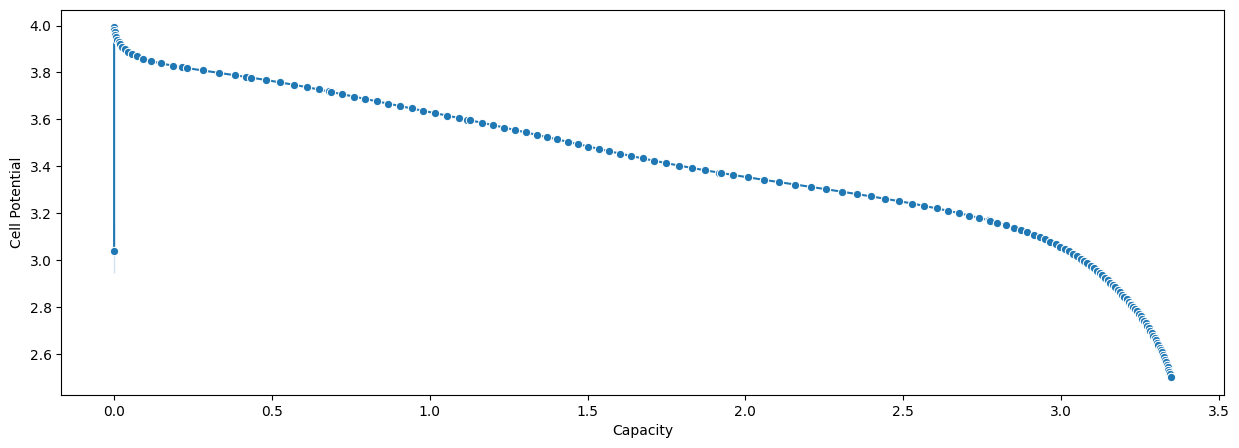

In [91]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_4[201:], x='Capacity',y='Cell Potential', marker='o')
plt.show()

In [92]:
cycle_4_charge_df = pd.DataFrame(cycle_4[0:201])
cycle_4_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  12.206836           4.0  28.885214  0.000016        3.124971
1  12.206897           4.0  28.885214  0.000108        3.138094
2  12.207139           4.0  28.885214  0.000470        3.148623
3  12.207697           4.0  28.885214  0.001308        3.159304
4  12.208469           4.0  28.869236  0.002466        3.169528

In [93]:
cycle_4_charge_df ['diffChargeCapacity'] = cycle_4_charge_df['Capacity'].diff()
cycle_4_charge_df ['diffChargeVoltage'] = cycle_4_charge_df['Cell Potential'].diff()
cycle_4_charge_df ['dCdV'] = cycle_4_charge_df['diffChargeCapacity']/cycle_4_charge_df['diffChargeVoltage']
cycle_4_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  12.206836           4.0  28.885214  0.000016        3.124971   
1  12.206897           4.0  28.885214  0.000108        3.138094   
2  12.207139           4.0  28.885214  0.000470        3.148623   
3  12.207697           4.0  28.885214  0.001308        3.159304   
4  12.208469           4.0  28.869236  0.002466        3.169528   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000092           0.013123  0.006988  
2            0.000362           0.010529  0.034429  
3            0.000837           0.010681  0.078408  
4            0.001158           0.010224  0.113298

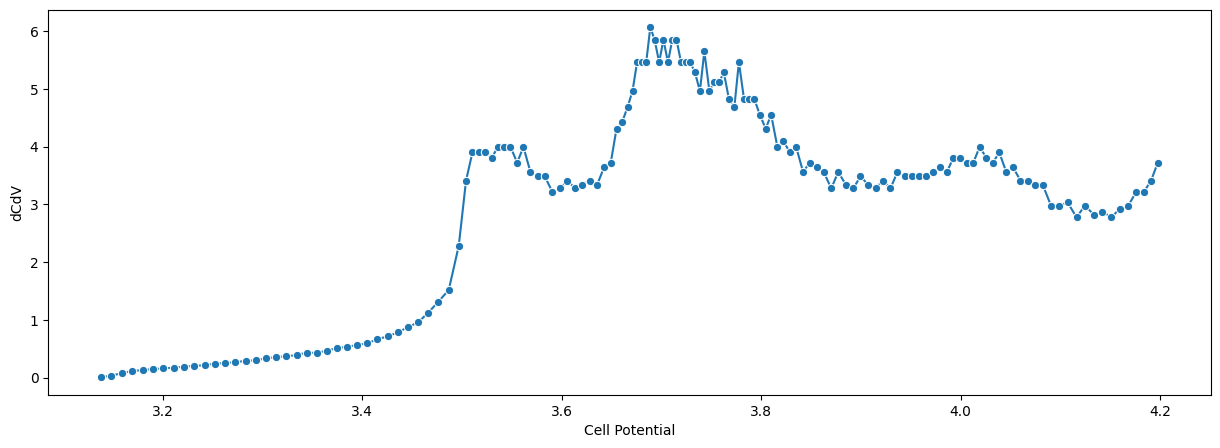

In [94]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_4_charge_df, x=cycle_4_charge_df['Cell Potential'].iloc[0:145],y=cycle_4_charge_df['dCdV'].iloc[0:145], marker='o')
plt.show()

In [95]:
cycle_4_discharge_df = pd.DataFrame(cycle_4[201:])
cycle_4_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
201  15.008094           4.0  25.498436  0.000000        4.184711
202  15.024761           4.0  25.514414  0.000000        4.183948
203  15.041428           4.0  25.434534  0.000000        4.183490
204  15.058092           4.0  25.450512  0.000000        4.183032
205  15.058103           4.0  25.450512  0.000045        3.992905

In [96]:
cycle_4_discharge_df.reset_index(drop=True, inplace=True)
cycle_4_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  15.008094           4.0  25.498436  0.000000        4.184711
1  15.024761           4.0  25.514414  0.000000        4.183948
2  15.041428           4.0  25.434534  0.000000        4.183490
3  15.058092           4.0  25.450512  0.000000        4.183032
4  15.058103           4.0  25.450512  0.000045        3.992905

In [97]:
cycle_4_discharge_df ['diffChargeCapacity'] = cycle_4_discharge_df['Capacity'].diff()
cycle_4_discharge_df ['diffChargeVoltage'] = cycle_4_discharge_df['Cell Potential'].diff()
cycle_4_discharge_df ['dCdV'] = cycle_4_discharge_df['diffChargeCapacity']/cycle_4_discharge_df['diffChargeVoltage']
cycle_4_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  15.008094           4.0  25.498436  0.000000        4.184711   
1  15.024761           4.0  25.514414  0.000000        4.183948   
2  15.041428           4.0  25.434534  0.000000        4.183490   
3  15.058092           4.0  25.450512  0.000000        4.183032   
4  15.058103           4.0  25.450512  0.000045        3.992905   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000000          -0.000763 -0.000000  
2            0.000000          -0.000458 -0.000000  
3            0.000000          -0.000458 -0.000000  
4            0.000045          -0.190127 -0.000237

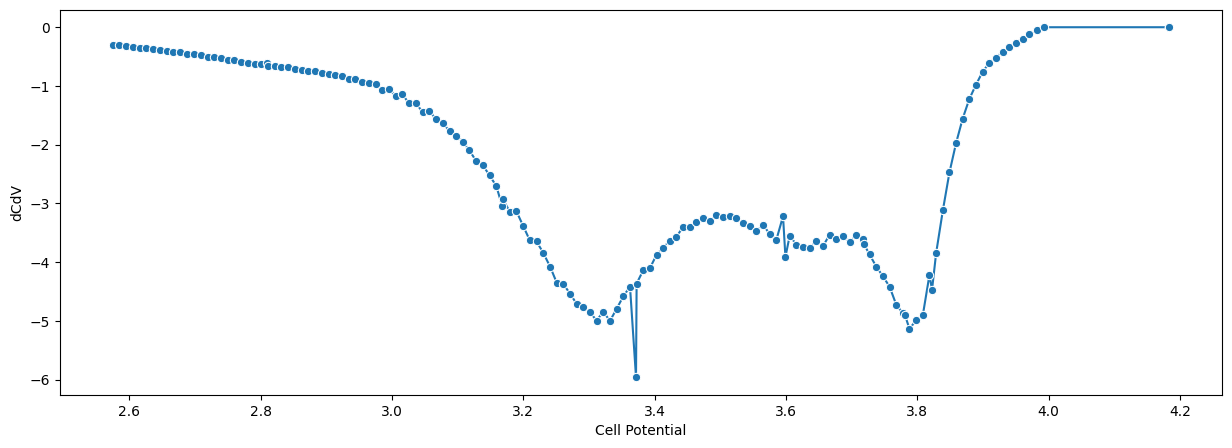

In [98]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_4_discharge_df, x=cycle_4_discharge_df['Cell Potential'].iloc[0:151],y=cycle_4_discharge_df['dCdV'].iloc[0:151], marker='o')
plt.show()

In [99]:
cycle_5 = cycle1_data[cycle1_data['Cycle Number']==5]
cycle_5.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
1616  16.228572           5.0  28.358027  0.000021        3.127108
1617  16.228636           5.0  28.358027  0.000116        3.140078
1618  16.228900           5.0  28.358027  0.000512        3.150606
1619  16.229453           5.0  28.342053  0.001341        3.160830
1620  16.230233           5.0  28.342053  0.002512        3.171359

In [100]:
cycle_5.reset_index(drop=True, inplace=True)
cycle_5.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  16.228572           5.0  28.358027  0.000021        3.127108
1  16.228636           5.0  28.358027  0.000116        3.140078
2  16.228900           5.0  28.358027  0.000512        3.150606
3  16.229453           5.0  28.342053  0.001341        3.160830
4  16.230233           5.0  28.342053  0.002512        3.171359

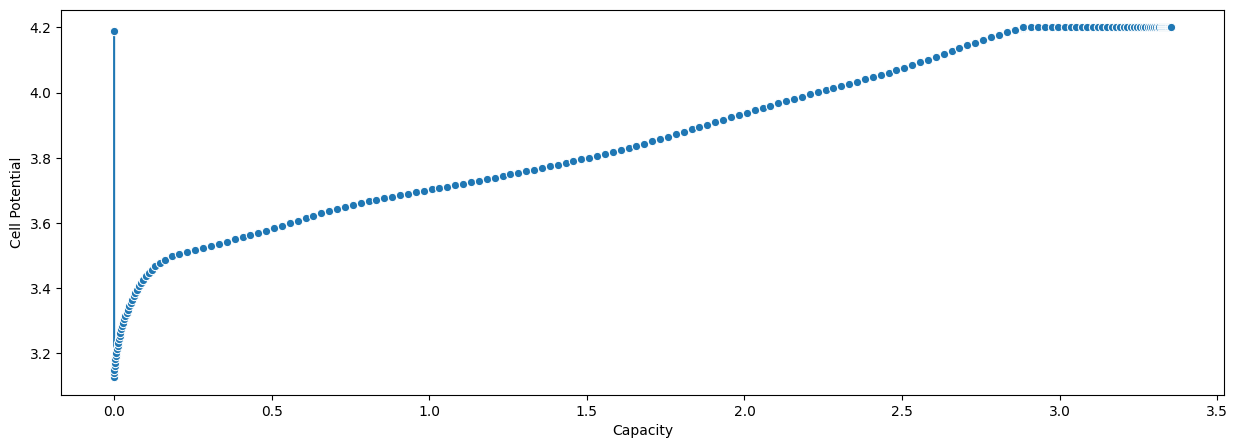

In [101]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_5[0:201], x='Capacity',y='Cell Potential', marker='o')
plt.show()

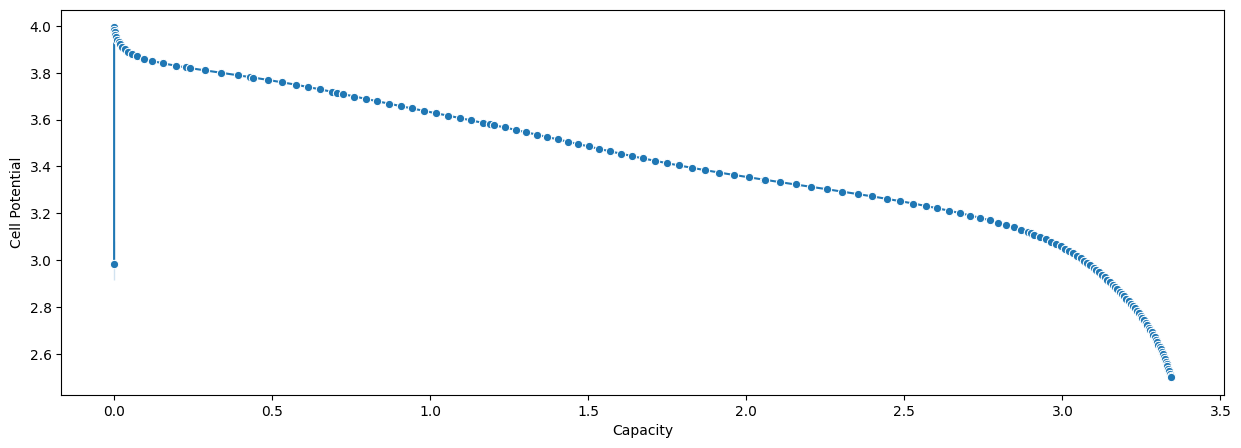

In [102]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_5[201:], x='Capacity',y='Cell Potential', marker='o')
plt.show()

In [103]:
cycle_5_charge_df = pd.DataFrame(cycle_5[0:201])
cycle_5_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  16.228572           5.0  28.358027  0.000021        3.127108
1  16.228636           5.0  28.358027  0.000116        3.140078
2  16.228900           5.0  28.358027  0.000512        3.150606
3  16.229453           5.0  28.342053  0.001341        3.160830
4  16.230233           5.0  28.342053  0.002512        3.171359

In [104]:
cycle_5_charge_df ['diffChargeCapacity'] = cycle_5_charge_df['Capacity'].diff()
cycle_5_charge_df ['diffChargeVoltage'] = cycle_5_charge_df['Cell Potential'].diff()
cycle_5_charge_df ['dCdV'] = cycle_5_charge_df['diffChargeCapacity']/cycle_5_charge_df['diffChargeVoltage']
cycle_5_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  16.228572           5.0  28.358027  0.000021        3.127108   
1  16.228636           5.0  28.358027  0.000116        3.140078   
2  16.228900           5.0  28.358027  0.000512        3.150606   
3  16.229453           5.0  28.342053  0.001341        3.160830   
4  16.230233           5.0  28.342053  0.002512        3.171359   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000096           0.012970  0.007394  
2            0.000396           0.010529  0.037592  
3            0.000829           0.010224  0.081097  
4            0.001171           0.010529  0.111201

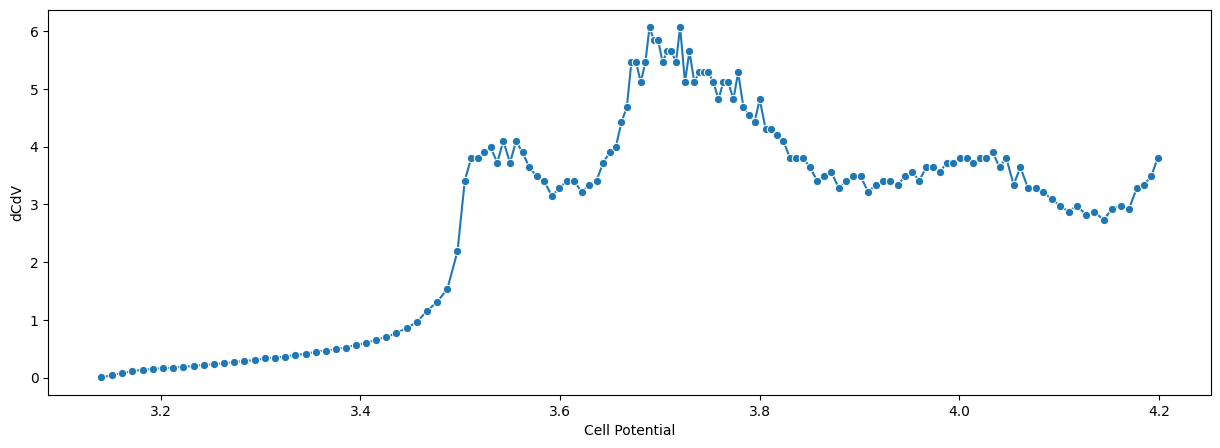

In [105]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_5_charge_df, x=cycle_5_charge_df['Cell Potential'].iloc[0:145],y=cycle_5_charge_df['dCdV'].iloc[0:145], marker='o')
plt.show()

In [106]:
cycle_5_discharge_df = pd.DataFrame(cycle_4[201:])
cycle_5_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
201  15.008094           4.0  25.498436  0.000000        4.184711
202  15.024761           4.0  25.514414  0.000000        4.183948
203  15.041428           4.0  25.434534  0.000000        4.183490
204  15.058092           4.0  25.450512  0.000000        4.183032
205  15.058103           4.0  25.450512  0.000045        3.992905

In [107]:
cycle_5_discharge_df.reset_index(drop=True, inplace=True)
cycle_5_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  15.008094           4.0  25.498436  0.000000        4.184711
1  15.024761           4.0  25.514414  0.000000        4.183948
2  15.041428           4.0  25.434534  0.000000        4.183490
3  15.058092           4.0  25.450512  0.000000        4.183032
4  15.058103           4.0  25.450512  0.000045        3.992905

In [108]:
cycle_5_discharge_df ['diffChargeCapacity'] = cycle_5_discharge_df['Capacity'].diff()
cycle_5_discharge_df ['diffChargeVoltage'] = cycle_5_discharge_df['Cell Potential'].diff()
cycle_5_discharge_df ['dCdV'] = cycle_5_discharge_df['diffChargeCapacity']/cycle_5_discharge_df['diffChargeVoltage']
cycle_5_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  15.008094           4.0  25.498436  0.000000        4.184711   
1  15.024761           4.0  25.514414  0.000000        4.183948   
2  15.041428           4.0  25.434534  0.000000        4.183490   
3  15.058092           4.0  25.450512  0.000000        4.183032   
4  15.058103           4.0  25.450512  0.000045        3.992905   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000000          -0.000763 -0.000000  
2            0.000000          -0.000458 -0.000000  
3            0.000000          -0.000458 -0.000000  
4            0.000045          -0.190127 -0.000237

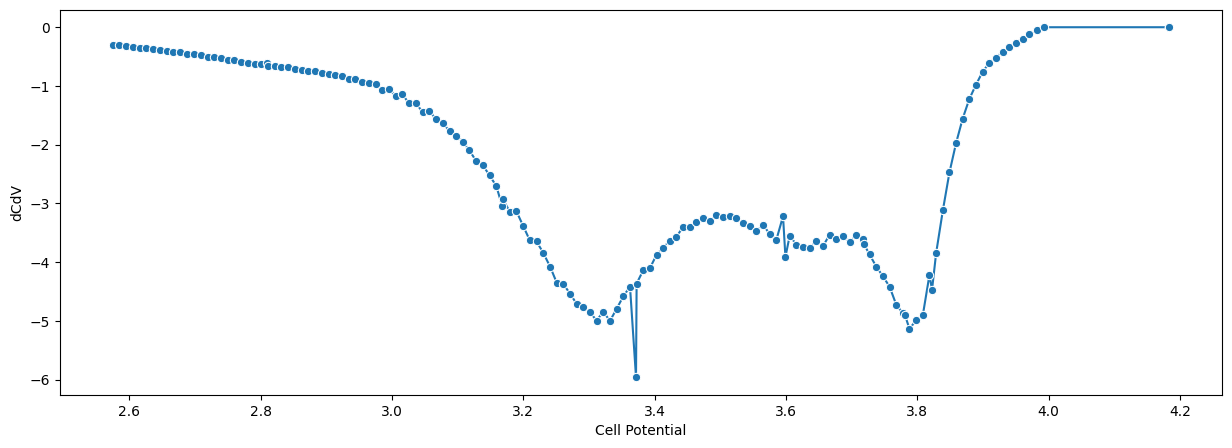

In [109]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_5_discharge_df, x=cycle_5_discharge_df['Cell Potential'].iloc[0:151],y=cycle_5_discharge_df['dCdV'].iloc[0:151], marker='o')
plt.show()

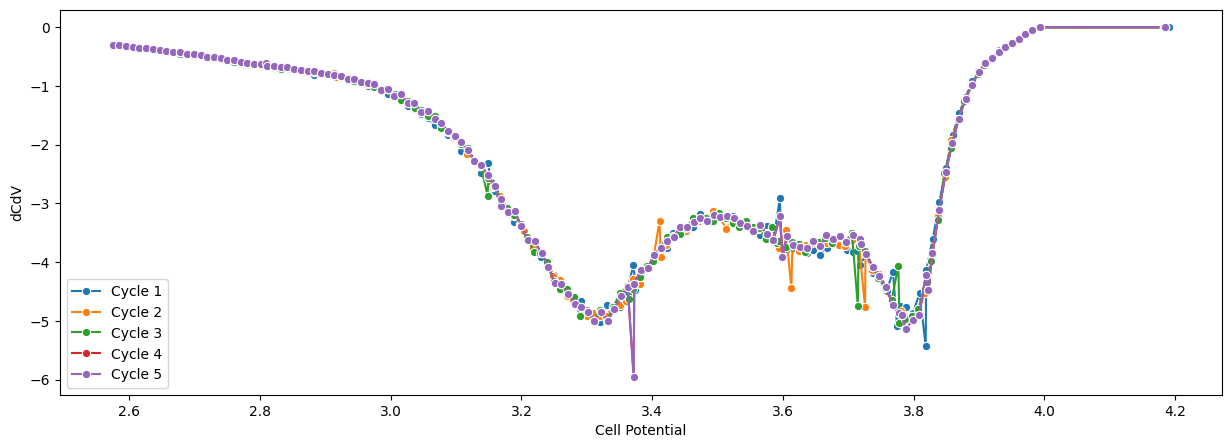

In [110]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1_discharge_df, x=cycle_1_discharge_df['Cell Potential'].iloc[0:151],y=cycle_1_discharge_df['dCdV'].iloc[0:151], marker='o', errorbar=None)
sns.lineplot(data= cycle_2_discharge_df, x=cycle_2_discharge_df['Cell Potential'].iloc[0:151],y=cycle_2_discharge_df['dCdV'].iloc[0:151], marker='o', errorbar=None)
sns.lineplot(data= cycle_3_discharge_df, x=cycle_3_discharge_df['Cell Potential'].iloc[0:151],y=cycle_3_discharge_df['dCdV'].iloc[0:151], marker='o', errorbar=None)
sns.lineplot(data= cycle_4_discharge_df, x=cycle_4_discharge_df['Cell Potential'].iloc[0:151],y=cycle_4_discharge_df['dCdV'].iloc[0:151], marker='o', errorbar=None)
sns.lineplot(data= cycle_5_discharge_df, x=cycle_5_discharge_df['Cell Potential'].iloc[0:151],y=cycle_5_discharge_df['dCdV'].iloc[0:151], marker='o', errorbar=None)
plt.legend(['Cycle 1', 'Cycle 2', 'Cycle 3', 'Cycle 4', 'Cycle 5'])
plt.show()

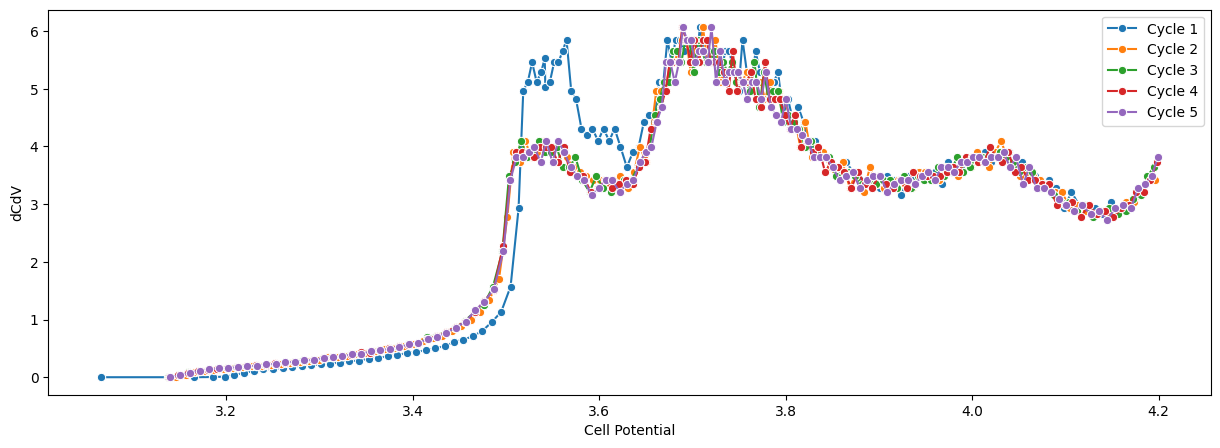

In [111]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1_charge_df, x=cycle_1_charge_df['Cell Potential'].iloc[0:145],y=cycle_1_charge_df['dCdV'].iloc[0:145], marker='o', errorbar=None)
sns.lineplot(data= cycle_2_charge_df, x=cycle_2_charge_df['Cell Potential'].iloc[0:145],y=cycle_2_charge_df['dCdV'].iloc[0:145], marker='o', errorbar=None)
sns.lineplot(data= cycle_3_charge_df, x=cycle_3_charge_df['Cell Potential'].iloc[0:145],y=cycle_3_charge_df['dCdV'].iloc[0:145], marker='o', errorbar=None)
sns.lineplot(data= cycle_4_charge_df, x=cycle_4_charge_df['Cell Potential'].iloc[0:145],y=cycle_4_charge_df['dCdV'].iloc[0:145], marker='o', errorbar=None)
sns.lineplot(data= cycle_5_charge_df, x=cycle_5_charge_df['Cell Potential'].iloc[0:145],y=cycle_5_charge_df['dCdV'].iloc[0:145], marker='o', errorbar=None)
plt.legend(['Cycle 1', 'Cycle 2', 'Cycle 3', 'Cycle 4', 'Cycle 5'])
plt.show()

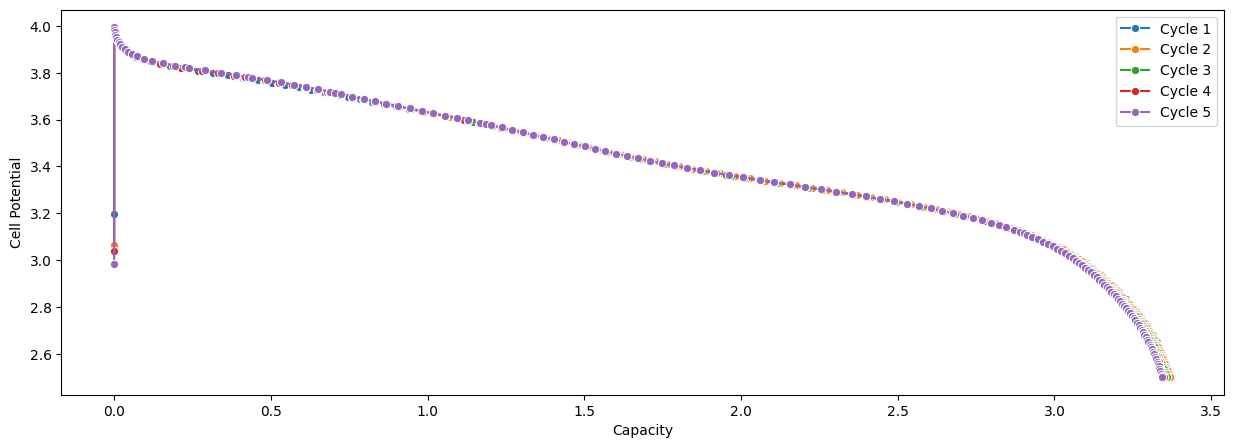

In [112]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1[201:], x='Capacity',y='Cell Potential', marker='o', errorbar=None)
sns.lineplot(data= cycle_2[201:], x='Capacity',y='Cell Potential', marker='o', errorbar=None)
sns.lineplot(data= cycle_3[201:], x='Capacity',y='Cell Potential', marker='o', errorbar=None)
sns.lineplot(data= cycle_4[201:], x='Capacity',y='Cell Potential', marker='o', errorbar=None)
sns.lineplot(data= cycle_5[201:], x='Capacity',y='Cell Potential', marker='o', errorbar=None)
plt.legend(['Cycle 1', 'Cycle 2', 'Cycle 3', 'Cycle 4', 'Cycle 5'])
plt.show()

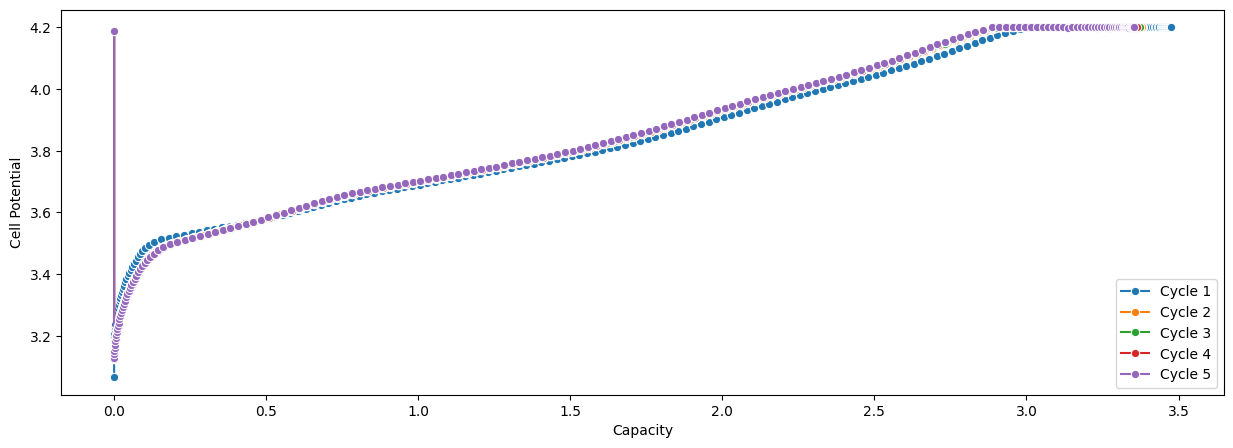

In [113]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1[0:201], x='Capacity',y='Cell Potential', marker='o', errorbar=None)
sns.lineplot(data= cycle_2[0:201], x='Capacity',y='Cell Potential', marker='o', errorbar=None)
sns.lineplot(data= cycle_3[0:201], x='Capacity',y='Cell Potential', marker='o', errorbar=None)
sns.lineplot(data= cycle_4[0:201], x='Capacity',y='Cell Potential', marker='o', errorbar=None)
sns.lineplot(data= cycle_5[0:201], x='Capacity',y='Cell Potential', marker='o', errorbar=None)
plt.legend(['Cycle 1', 'Cycle 2', 'Cycle 3', 'Cycle 4', 'Cycle 5'])
plt.show()

In [114]:
cycle_100 = bat_df_full[bat_df_full['Cycle Number']==100]
cycle_100.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
58401  53.132100         100.0  25.940085  0.000016        3.209659
58402  53.145681         100.0  25.906836  0.000096        3.224765
58403  53.145692         100.0  25.906836  0.000437        3.235294
58404  53.145744         100.0  25.906836  0.001579        3.245823
58405  53.145972         100.0  25.923460  0.003212        3.255894

In [115]:
cycle_100.reset_index(drop=True, inplace=True)
cycle_100.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  53.132100         100.0  25.940085  0.000016        3.209659
1  53.145681         100.0  25.906836  0.000096        3.224765
2  53.145692         100.0  25.906836  0.000437        3.235294
3  53.145744         100.0  25.906836  0.001579        3.245823
4  53.145972         100.0  25.923460  0.003212        3.255894

In [116]:
cycle_100_charge_df = pd.DataFrame(cycle_100[0:201])
cycle_100_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  53.132100         100.0  25.940085  0.000016        3.209659
1  53.145681         100.0  25.906836  0.000096        3.224765
2  53.145692         100.0  25.906836  0.000437        3.235294
3  53.145744         100.0  25.906836  0.001579        3.245823
4  53.145972         100.0  25.923460  0.003212        3.255894

In [117]:
cycle_100_charge_df ['diffChargeCapacity'] = cycle_100_charge_df['Capacity'].diff()
cycle_100_charge_df ['diffChargeVoltage'] = cycle_100_charge_df['Cell Potential'].diff()
cycle_100_charge_df ['dCdV'] = cycle_100_charge_df['diffChargeCapacity']/cycle_100_charge_df['diffChargeVoltage']
cycle_100_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  53.132100         100.0  25.940085  0.000016        3.209659   
1  53.145681         100.0  25.906836  0.000096        3.224765   
2  53.145692         100.0  25.906836  0.000437        3.235294   
3  53.145744         100.0  25.906836  0.001579        3.245823   
4  53.145972         100.0  25.923460  0.003212        3.255894   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000079           0.015106  0.005236  
2            0.000342           0.010529  0.032454  
3            0.001142           0.010529  0.108427  
4            0.001633           0.010071  0.162179

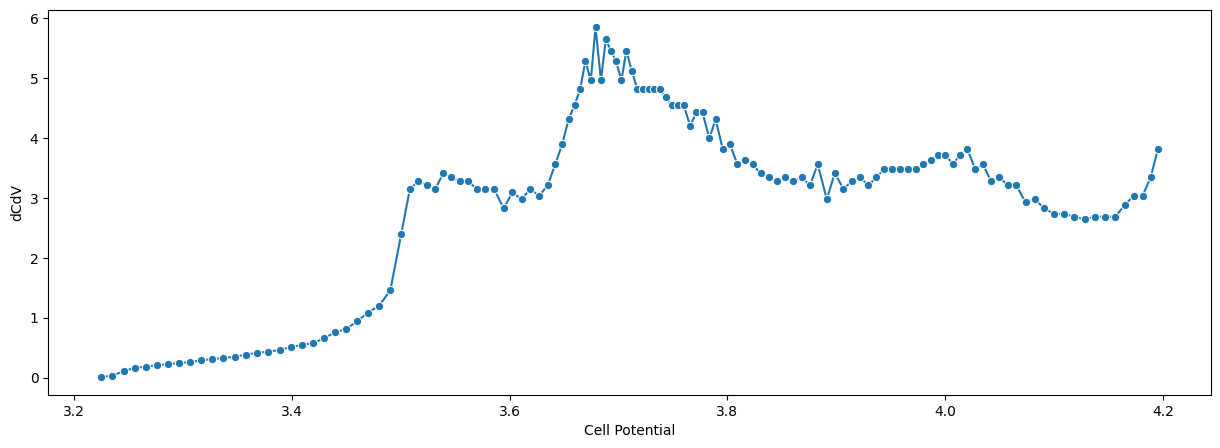

In [118]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_100_charge_df, x=cycle_100_charge_df['Cell Potential'].iloc[0:128],y=cycle_100_charge_df['dCdV'].iloc[0:128], marker='o')
plt.show()

In [119]:
cycle_100_discharge_df = pd.DataFrame(cycle_100[201:])
cycle_100_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
201  55.853092         100.0  25.923460  0.207377        3.854810
202  55.863006         100.0  26.073072  0.253432        3.844587
203  55.874172         100.0  26.189436  0.301832        3.834516
204  55.885686         100.0  26.089693  0.348220        3.824445
205  55.897786         100.0  26.339046  0.394620        3.814221

In [120]:
cycle_100_discharge_df.reset_index(drop=True, inplace=True)
cycle_100_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  55.853092         100.0  25.923460  0.207377        3.854810
1  55.863006         100.0  26.073072  0.253432        3.844587
2  55.874172         100.0  26.189436  0.301832        3.834516
3  55.885686         100.0  26.089693  0.348220        3.824445
4  55.897786         100.0  26.339046  0.394620        3.814221

In [121]:
cycle_100_discharge_df ['diffChargeCapacity'] = cycle_100_discharge_df['Capacity'].diff()
cycle_100_discharge_df ['diffChargeVoltage'] = cycle_100_discharge_df['Cell Potential'].diff()
cycle_100_discharge_df ['dCdV'] = cycle_100_discharge_df['diffChargeCapacity']/cycle_100_discharge_df['diffChargeVoltage']
cycle_100_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  55.853092         100.0  25.923460  0.207377        3.854810   
1  55.863006         100.0  26.073072  0.253432        3.844587   
2  55.874172         100.0  26.189436  0.301832        3.834516   
3  55.885686         100.0  26.089693  0.348220        3.824445   
4  55.897786         100.0  26.339046  0.394620        3.814221   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.046055          -0.010223 -4.504837  
2            0.048400          -0.010071 -4.805848  
3            0.046388          -0.010071 -4.606192  
4            0.046400          -0.010224 -4.538489

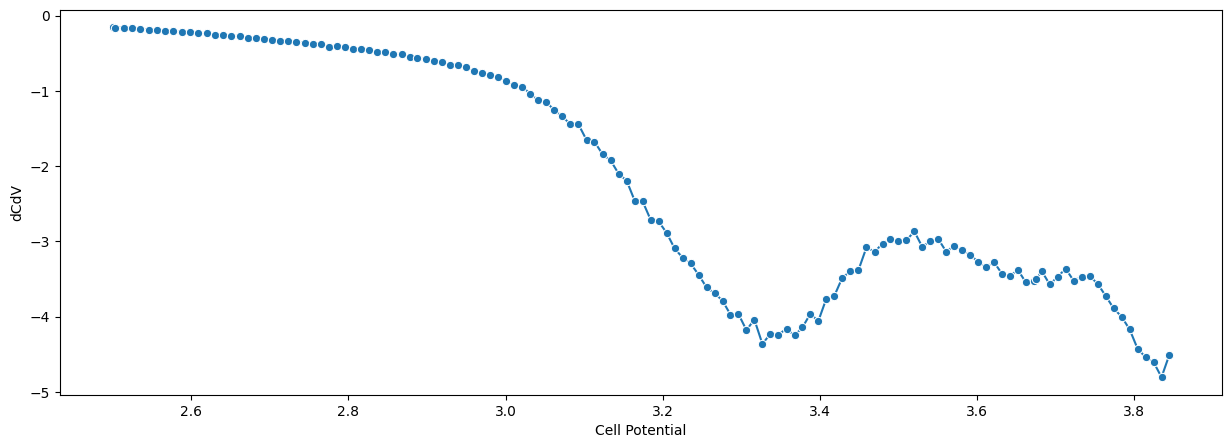

In [122]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_100_discharge_df, x=cycle_100_discharge_df['Cell Potential'].iloc[0:135],y=cycle_100_discharge_df['dCdV'].iloc[0:135], marker='o')
plt.show()

In [123]:
charge_list = [cycle_1_charge_df['Capacity'], cycle_2_charge_df['Capacity'], cycle_3_charge_df['Capacity'], cycle_4_charge_df['Capacity'], cycle_5_charge_df['Capacity']]
potential_charge_list = [cycle_1_charge_df['Cell Potential'], cycle_2_charge_df['Cell Potential'], cycle_3_charge_df['Cell Potential'], cycle_4_charge_df['Cell Potential'], cycle_5_charge_df['Cell Potential']]
cycle_list = [cycle_1_charge_df['Cycle Number'], cycle_2_charge_df['Cycle Number'], cycle_3_charge_df['Cycle Number'], cycle_4_charge_df['Cycle Number'], cycle_5_charge_df['Cycle Number']]

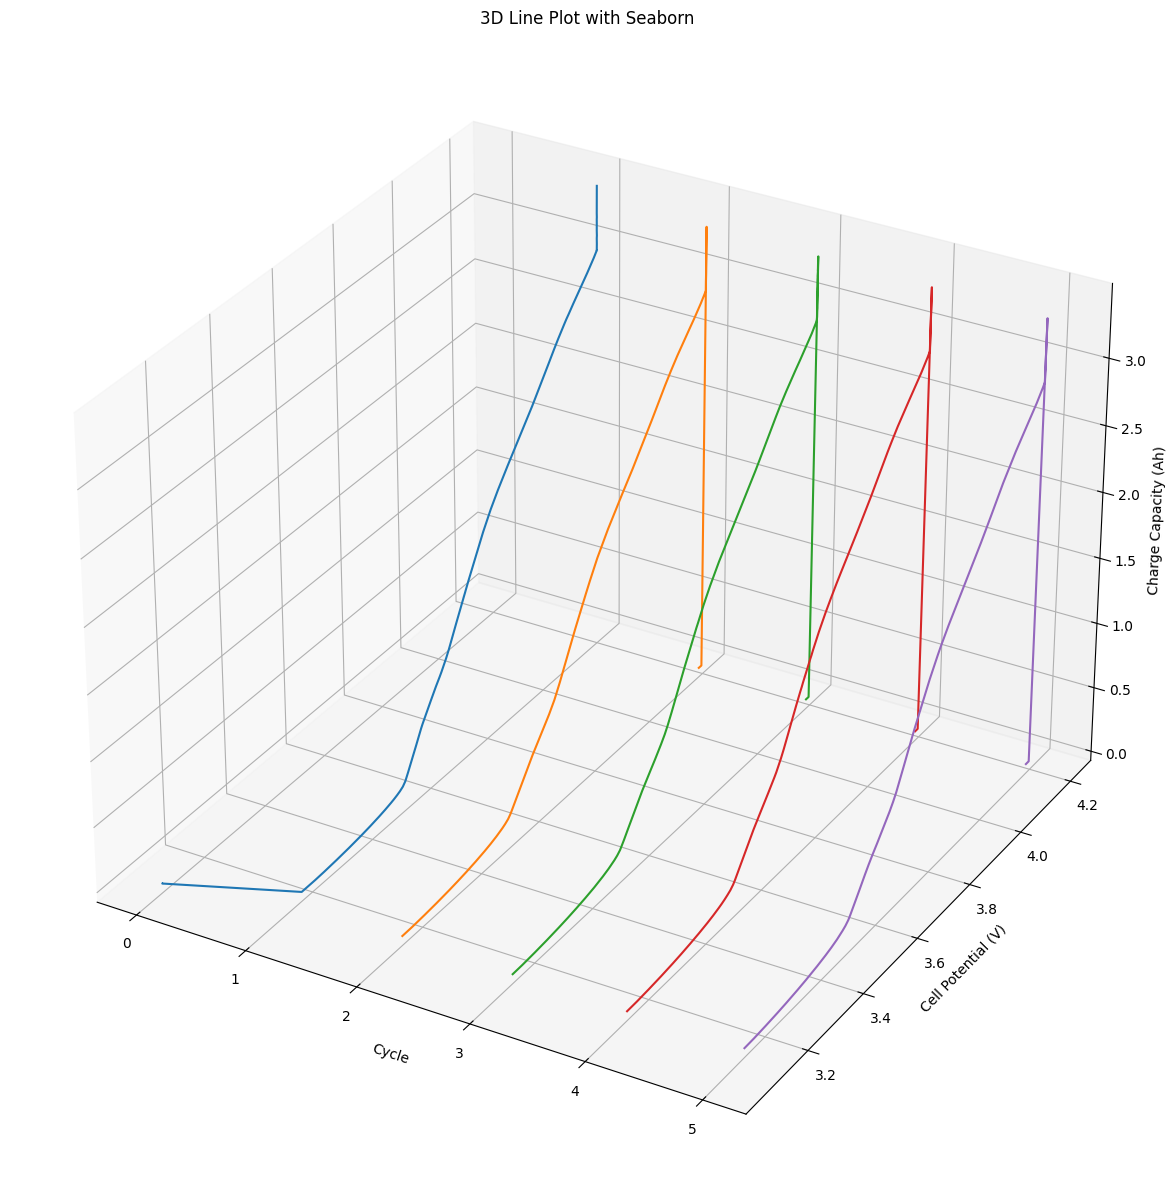

In [124]:
# Create a 3D line plot with Seaborn
fig = plt.figure(figsize=(40, 15))
ax = fig.add_subplot(111, projection='3d')
for i, j, k in zip(cycle_list, potential_charge_list, charge_list):
    ax.plot(i, j, k)
ax.set_xlabel('Cycle')
ax.set_ylabel('Cell Potential (V)')
ax.set_zlabel('Charge Capacity (Ah)')
plt.title('3D Line Plot with Seaborn')
plt.show()

In [125]:
diff_chargecapacity_list = charge_list = [cycle_1_charge_df['dCdV'].iloc[0:145], cycle_2_charge_df['dCdV'].iloc[0:145], cycle_3_charge_df['dCdV'].iloc[0:145], cycle_4_charge_df['dCdV'].iloc[0:145], cycle_5_charge_df['dCdV'].iloc[0:145]]
potential_charge_list_1 = [cycle_1_charge_df['Cell Potential'].iloc[0:145], cycle_2_charge_df['Cell Potential'].iloc[0:145], cycle_3_charge_df['Cell Potential'].iloc[0:145], cycle_4_charge_df['Cell Potential'].iloc[0:145], cycle_5_charge_df['Cell Potential'].iloc[0:145]]
cycle_list_1 = [cycle_1_charge_df['Cycle Number'].iloc[0:145], cycle_2_charge_df['Cycle Number'].iloc[0:145], cycle_3_charge_df['Cycle Number'].iloc[0:145], cycle_4_charge_df['Cycle Number'].iloc[0:145], cycle_5_charge_df['Cycle Number'].iloc[0:145]]

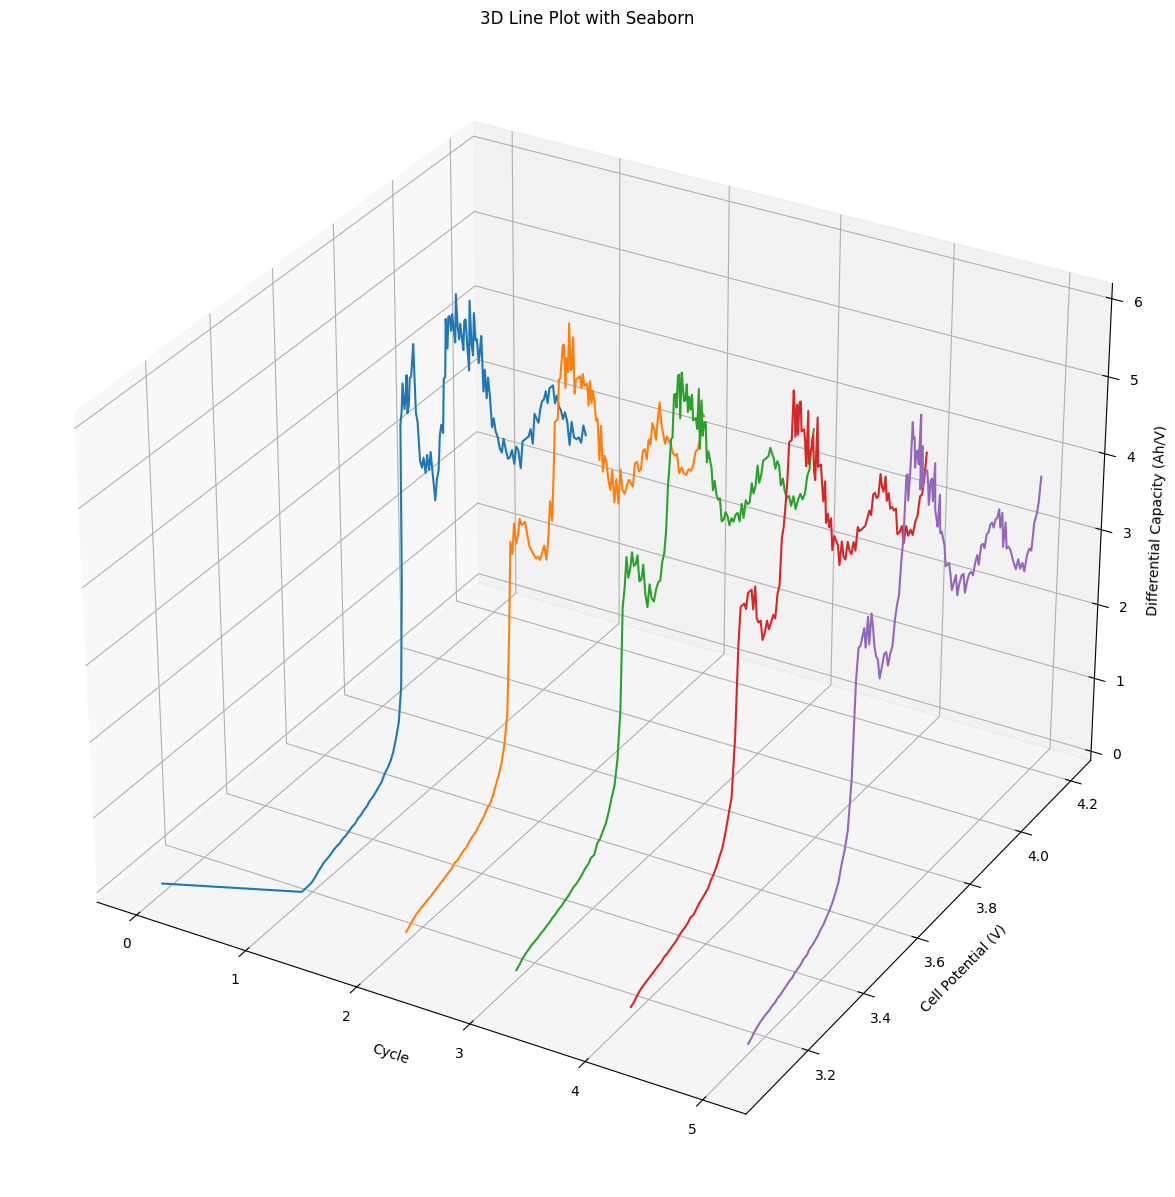

In [126]:
# Create a 3D line plot with Seaborn
fig = plt.figure(figsize=(40, 15))
ax = fig.add_subplot(111, projection='3d')
for i, j, k in zip(cycle_list_1, potential_charge_list_1, diff_chargecapacity_list):
    ax.plot(i, j, k)
ax.set_xlabel('Cycle')
ax.set_ylabel('Cell Potential (V)')
ax.set_zlabel('Differential Capacity (Ah/V)')
plt.title('3D Line Plot with Seaborn')
plt.show()

In [127]:
cycle_200 = bat_df_full[bat_df_full['Cycle Number']==200]
cycle_200.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
140687  354.223556         200.0  25.723978  0.000021        3.212863
140688  354.240222         200.0  25.723978  0.000108        3.226749
140689  354.256889         200.0  25.723978  0.000475        3.237430
140690  354.273556         200.0  25.674107  0.001608        3.247806
140691  354.290222         200.0  25.674107  0.003166        3.258183

In [128]:
cycle_200.reset_index(drop=True, inplace=True)
cycle_200.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  354.223556         200.0  25.723978  0.000021        3.212863
1  354.240222         200.0  25.723978  0.000108        3.226749
2  354.256889         200.0  25.723978  0.000475        3.237430
3  354.273556         200.0  25.674107  0.001608        3.247806
4  354.290222         200.0  25.674107  0.003166        3.258183

In [129]:
cycle_200_charge_df = pd.DataFrame(cycle_200[0:201])
cycle_200_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  354.223556         200.0  25.723978  0.000021        3.212863
1  354.240222         200.0  25.723978  0.000108        3.226749
2  354.256889         200.0  25.723978  0.000475        3.237430
3  354.273556         200.0  25.674107  0.001608        3.247806
4  354.290222         200.0  25.674107  0.003166        3.258183

In [130]:
cycle_200_charge_df ['diffChargeCapacity'] = cycle_200_charge_df['Capacity'].diff()
cycle_200_charge_df ['diffChargeVoltage'] = cycle_200_charge_df['Cell Potential'].diff()
cycle_200_charge_df ['dCdV'] = cycle_200_charge_df['diffChargeCapacity']/cycle_200_charge_df['diffChargeVoltage']
cycle_200_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  354.223556         200.0  25.723978  0.000021        3.212863   
1  354.240222         200.0  25.723978  0.000108        3.226749   
2  354.256889         200.0  25.723978  0.000475        3.237430   
3  354.273556         200.0  25.674107  0.001608        3.247806   
4  354.290222         200.0  25.674107  0.003166        3.258183   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000087           0.013886  0.006301  
2            0.000367           0.010681  0.034331  
3            0.001133           0.010376  0.109222  
4            0.001558           0.010376  0.150171

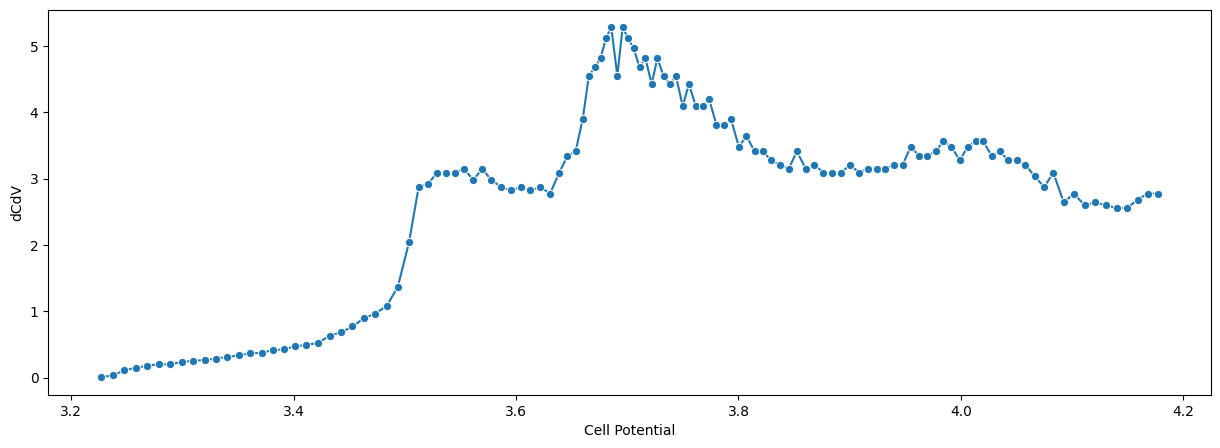

In [131]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_200_charge_df, x=cycle_200_charge_df['Cell Potential'].iloc[0:120],y=cycle_200_charge_df['dCdV'].iloc[0:120], marker='o')
plt.show()

In [132]:
cycle_200_discharge_df = pd.DataFrame(cycle_200[201:])
cycle_200_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
201  357.573556         200.0  25.574368  0.266965        3.828870
202  357.590222         200.0  25.740603  0.314587        3.818646
203  357.606889         200.0  25.690731  0.359309        3.808576
204  357.623556         200.0  25.674107  0.403031        3.798505
205  357.640222         200.0  25.690731  0.444142        3.788434

In [133]:
cycle_200_discharge_df.reset_index(drop=True, inplace=True)
cycle_200_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  357.573556         200.0  25.574368  0.266965        3.828870
1  357.590222         200.0  25.740603  0.314587        3.818646
2  357.606889         200.0  25.690731  0.359309        3.808576
3  357.623556         200.0  25.674107  0.403031        3.798505
4  357.640222         200.0  25.690731  0.444142        3.788434

In [134]:
cycle_200_discharge_df ['diffChargeCapacity'] = cycle_200_discharge_df['Capacity'].diff()
cycle_200_discharge_df ['diffChargeVoltage'] = cycle_200_discharge_df['Cell Potential'].diff()
cycle_200_discharge_df ['dCdV'] = cycle_200_discharge_df['diffChargeCapacity']/cycle_200_discharge_df['diffChargeVoltage']
cycle_200_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  357.573556         200.0  25.574368  0.266965        3.828870   
1  357.590222         200.0  25.740603  0.314587        3.818646   
2  357.606889         200.0  25.690731  0.359309        3.808576   
3  357.623556         200.0  25.674107  0.403031        3.798505   
4  357.640222         200.0  25.690731  0.444142        3.788434   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.047622          -0.010224 -4.658027  
2            0.044722          -0.010071 -4.440705  
3            0.043722          -0.010071 -4.341366  
4            0.041111          -0.010071 -4.082148

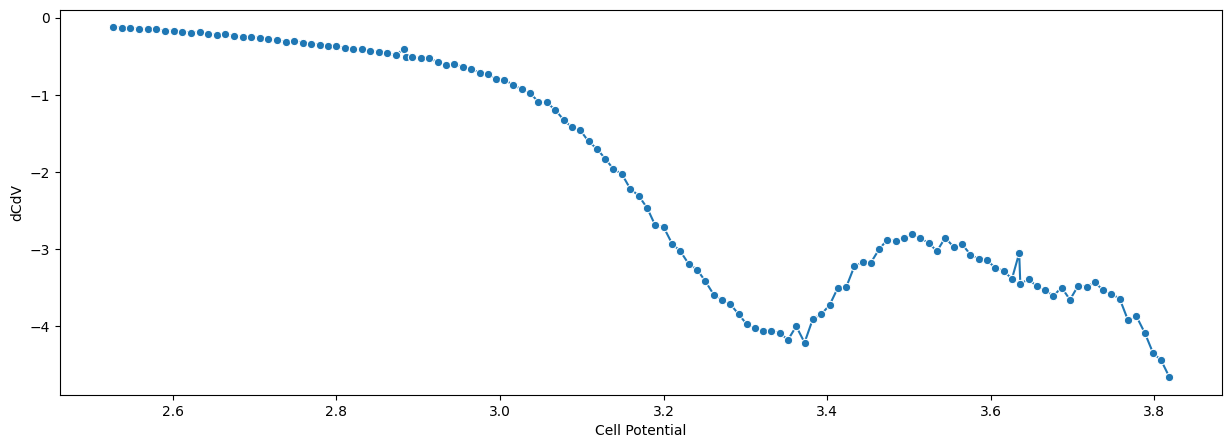

In [135]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_200_discharge_df, x=cycle_200_discharge_df['Cell Potential'].iloc[0:130],y=cycle_200_discharge_df['dCdV'].iloc[0:130], marker='o')
plt.show()

In [136]:
cycle_300 = bat_df_full[bat_df_full['Cycle Number']==300]
cycle_300.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
217224  52.075172         300.0  28.067890  0.000021        3.230869
217225  52.087578         300.0  28.134384  0.000104        3.245518
217226  52.087592         300.0  28.134384  0.000420        3.255741
217227  52.087647         300.0  28.134384  0.001479        3.265965
217228  52.087858         300.0  28.134384  0.003050        3.276036

In [137]:
cycle_300.reset_index(drop=True, inplace=True)
cycle_300.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  52.075172         300.0  28.067890  0.000021        3.230869
1  52.087578         300.0  28.134384  0.000104        3.245518
2  52.087592         300.0  28.134384  0.000420        3.255741
3  52.087647         300.0  28.134384  0.001479        3.265965
4  52.087858         300.0  28.134384  0.003050        3.276036

In [138]:
cycle_300_charge_df = pd.DataFrame(cycle_300[0:201])
cycle_300_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  52.075172         300.0  28.067890  0.000021        3.230869
1  52.087578         300.0  28.134384  0.000104        3.245518
2  52.087592         300.0  28.134384  0.000420        3.255741
3  52.087647         300.0  28.134384  0.001479        3.265965
4  52.087858         300.0  28.134384  0.003050        3.276036

In [139]:
cycle_300_charge_df ['diffChargeCapacity'] = cycle_300_charge_df['Capacity'].diff()
cycle_300_charge_df ['diffChargeVoltage'] = cycle_300_charge_df['Cell Potential'].diff()
cycle_300_charge_df ['dCdV'] = cycle_300_charge_df['diffChargeCapacity']/cycle_300_charge_df['diffChargeVoltage']
cycle_300_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  52.075172         300.0  28.067890  0.000021        3.230869   
1  52.087578         300.0  28.134384  0.000104        3.245518   
2  52.087592         300.0  28.134384  0.000420        3.255741   
3  52.087647         300.0  28.134384  0.001479        3.265965   
4  52.087858         300.0  28.134384  0.003050        3.276036   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000083           0.014649  0.005693  
2            0.000317           0.010223  0.030968  
3            0.001058           0.010224  0.103515  
4            0.001571           0.010071  0.155974

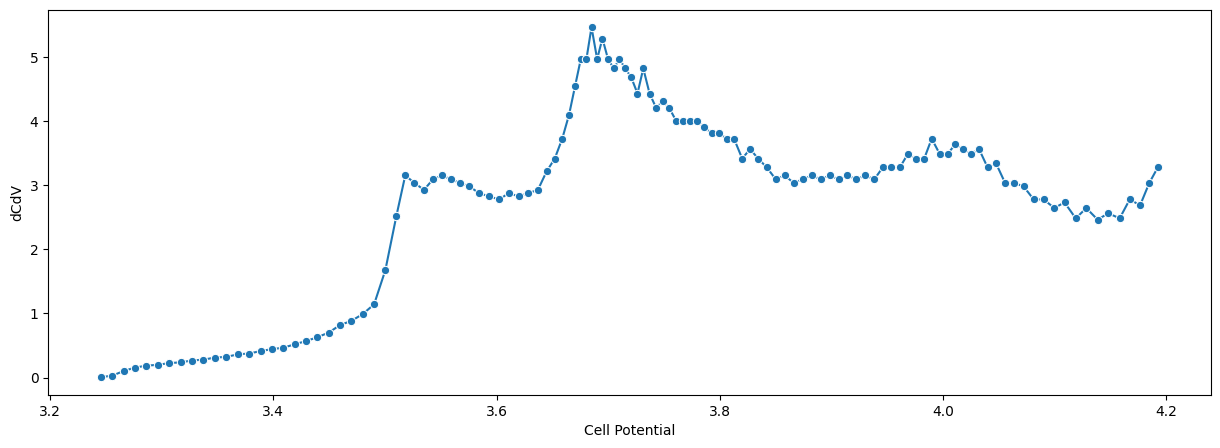

In [140]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_300_charge_df, x=cycle_300_charge_df['Cell Potential'].iloc[0:120],y=cycle_300_charge_df['dCdV'].iloc[0:120], marker='o')
plt.show()

In [141]:
cycle_300_discharge_df = pd.DataFrame(cycle_300[201:])
cycle_300_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
201  54.790761         300.0  28.815949  0.320843        3.814984
202  54.803047         300.0  29.198286  0.324387        3.814679
203  54.815144         300.0  29.331274  0.366765        3.804913
204  54.816031         300.0  29.364523  0.409909        3.794843
205  54.826625         300.0  29.347898  0.450920        3.784772

In [142]:
cycle_300_discharge_df.reset_index(drop=True, inplace=True)
cycle_300_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  54.790761         300.0  28.815949  0.320843        3.814984
1  54.803047         300.0  29.198286  0.324387        3.814679
2  54.815144         300.0  29.331274  0.366765        3.804913
3  54.816031         300.0  29.364523  0.409909        3.794843
4  54.826625         300.0  29.347898  0.450920        3.784772

In [143]:
cycle_300_discharge_df ['diffChargeCapacity'] = cycle_300_discharge_df['Capacity'].diff()
cycle_300_discharge_df ['diffChargeVoltage'] = cycle_300_discharge_df['Cell Potential'].diff()
cycle_300_discharge_df ['dCdV'] = cycle_300_discharge_df['diffChargeCapacity']/cycle_300_discharge_df['diffChargeVoltage']
cycle_300_discharge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  54.790761         300.0  28.815949  0.320843        3.814984   
1  54.803047         300.0  29.198286  0.324387        3.814679   
2  54.815144         300.0  29.331274  0.366765        3.804913   
3  54.816031         300.0  29.364523  0.409909        3.794843   
4  54.826625         300.0  29.347898  0.450920        3.784772   

   diffChargeCapacity  diffChargeVoltage       dCdV  
0                 NaN                NaN        NaN  
1            0.003544          -0.000305 -11.613368  
2            0.042378          -0.009766  -4.339378  
3            0.043144          -0.010071  -4.284036  
4            0.041011          -0.010071  -4.072168

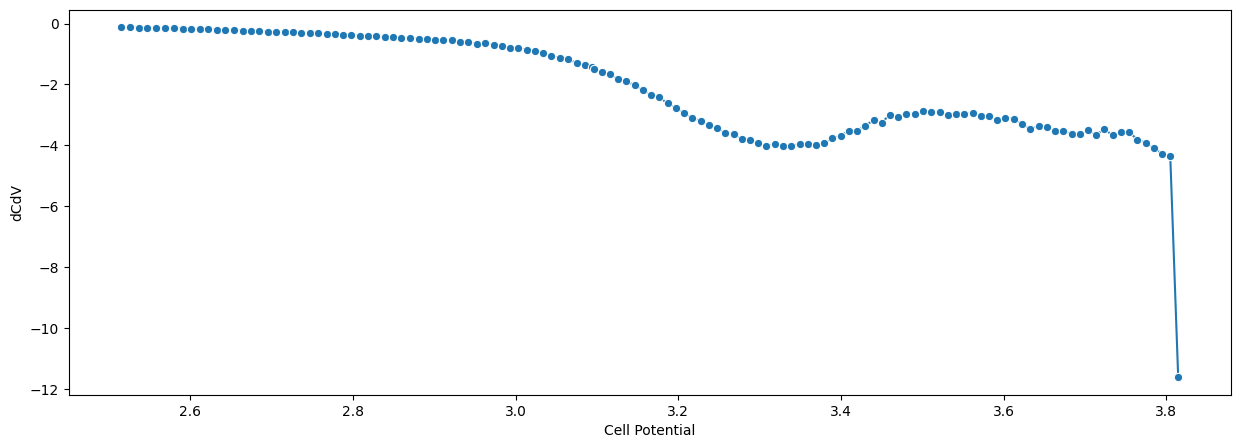

In [144]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_300_discharge_df, x=cycle_300_discharge_df['Cell Potential'].iloc[0:130],y=cycle_300_discharge_df['dCdV'].iloc[0:130], marker='o')
plt.show()

In [145]:
cycle_400 = bat_df_full[bat_df_full['Cycle Number']==400]
cycle_400.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
255542  423.377953         400.0  25.341639  0.000021        3.256199
255543  423.394172         400.0  25.607615  0.000100        3.271000
255544  423.394186         400.0  25.607615  0.000325        3.281529
255545  423.394239         400.0  25.607615  0.001208        3.291905
255546  423.394389         400.0  25.607615  0.002783        3.301976

In [146]:
cycle_400.reset_index(drop=True, inplace=True)
cycle_400.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  423.377953         400.0  25.341639  0.000021        3.256199
1  423.394172         400.0  25.607615  0.000100        3.271000
2  423.394186         400.0  25.607615  0.000325        3.281529
3  423.394239         400.0  25.607615  0.001208        3.291905
4  423.394389         400.0  25.607615  0.002783        3.301976

In [147]:
cycle_400_charge_df = pd.DataFrame(cycle_400[0:201])
cycle_400_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0  423.377953         400.0  25.341639  0.000021        3.256199
1  423.394172         400.0  25.607615  0.000100        3.271000
2  423.394186         400.0  25.607615  0.000325        3.281529
3  423.394239         400.0  25.607615  0.001208        3.291905
4  423.394389         400.0  25.607615  0.002783        3.301976

In [148]:
cycle_400_charge_df ['diffChargeCapacity'] = cycle_400_charge_df['Capacity'].diff()
cycle_400_charge_df ['diffChargeVoltage'] = cycle_400_charge_df['Cell Potential'].diff()
cycle_400_charge_df ['dCdV'] = cycle_400_charge_df['diffChargeCapacity']/cycle_400_charge_df['diffChargeVoltage']
cycle_400_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0  423.377953         400.0  25.341639  0.000021        3.256199   
1  423.394172         400.0  25.607615  0.000100        3.271000   
2  423.394186         400.0  25.607615  0.000325        3.281529   
3  423.394239         400.0  25.607615  0.001208        3.291905   
4  423.394389         400.0  25.607615  0.002783        3.301976   

   diffChargeCapacity  diffChargeVoltage      dCdV  
0                 NaN                NaN       NaN  
1            0.000079           0.014801  0.005351  
2            0.000225           0.010529  0.021370  
3            0.000883           0.010376  0.085128  
4            0.001575           0.010071  0.156381

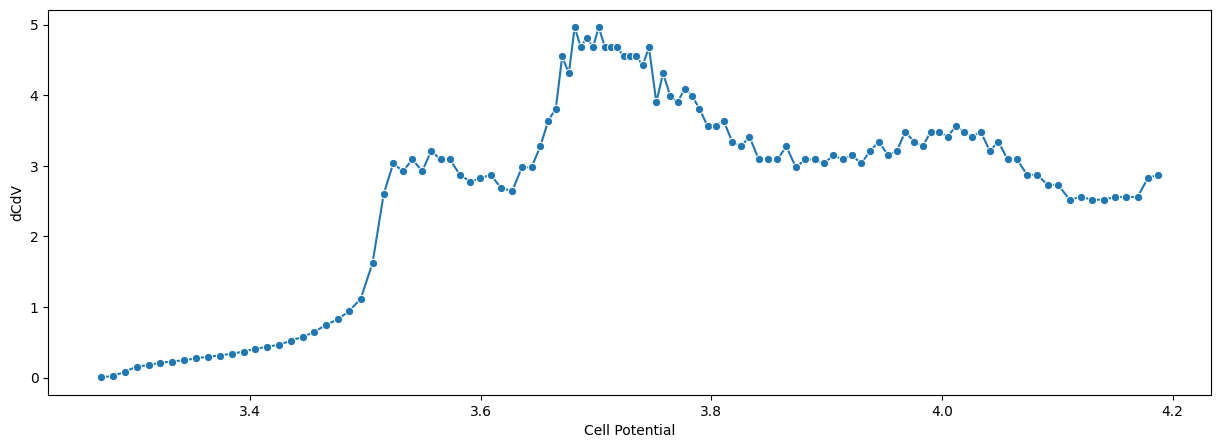

In [149]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_400_charge_df, x=cycle_400_charge_df['Cell Potential'].iloc[0:115],y=cycle_400_charge_df['dCdV'].iloc[0:115], marker='o')
plt.show()

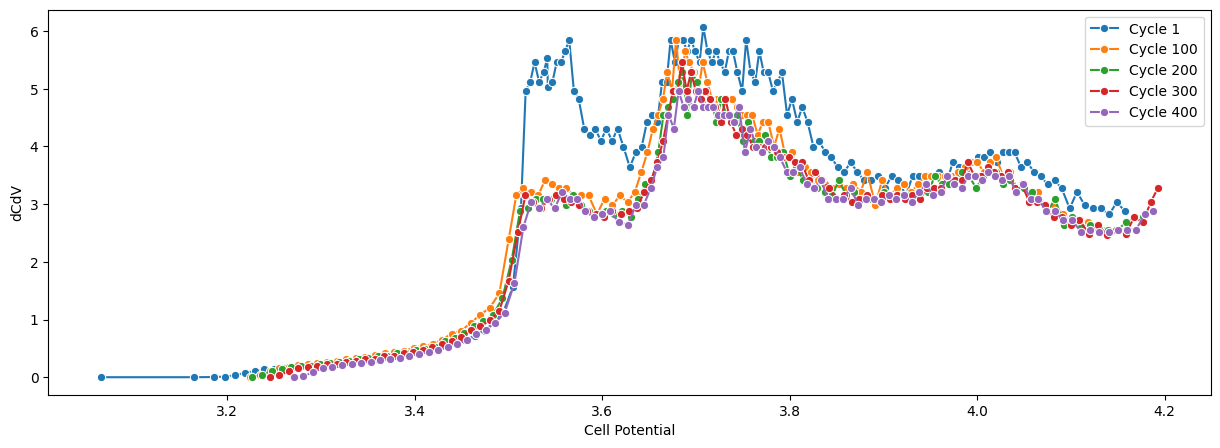

In [150]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1_charge_df, x=cycle_1_charge_df['Cell Potential'].iloc[0:145],y=cycle_1_charge_df['dCdV'].iloc[0:145], marker='o', errorbar=None)
sns.lineplot(data= cycle_100_charge_df, x=cycle_100_charge_df['Cell Potential'].iloc[0:120],y=cycle_100_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_200_charge_df, x=cycle_200_charge_df['Cell Potential'].iloc[0:120],y=cycle_200_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_300_charge_df, x=cycle_300_charge_df['Cell Potential'].iloc[0:120],y=cycle_300_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_400_charge_df, x=cycle_400_charge_df['Cell Potential'].iloc[0:115],y=cycle_400_charge_df['dCdV'].iloc[0:115], marker='o', errorbar=None)
plt.legend(['Cycle 1', 'Cycle 100', 'Cycle 200', 'Cycle 300', 'Cycle 400'])
plt.show()

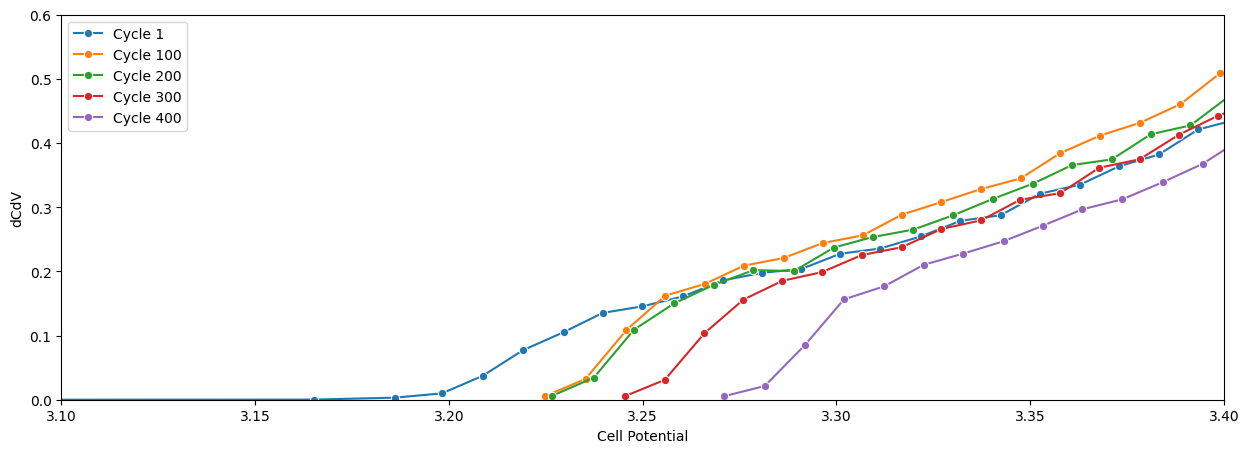

In [151]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1_charge_df, x=cycle_1_charge_df['Cell Potential'].iloc[0:145],y=cycle_1_charge_df['dCdV'].iloc[0:145], marker='o', errorbar=None)
sns.lineplot(data= cycle_100_charge_df, x=cycle_100_charge_df['Cell Potential'].iloc[0:120],y=cycle_100_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_200_charge_df, x=cycle_200_charge_df['Cell Potential'].iloc[0:120],y=cycle_200_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_300_charge_df, x=cycle_300_charge_df['Cell Potential'].iloc[0:120],y=cycle_300_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_400_charge_df, x=cycle_400_charge_df['Cell Potential'].iloc[0:115],y=cycle_400_charge_df['dCdV'].iloc[0:115], marker='o', errorbar=None)
plt.legend(['Cycle 1', 'Cycle 100', 'Cycle 200', 'Cycle 300', 'Cycle 400'], loc='upper left')
plt.xlim(3.10,3.40)
plt.ylim(0,0.60)
plt.show()

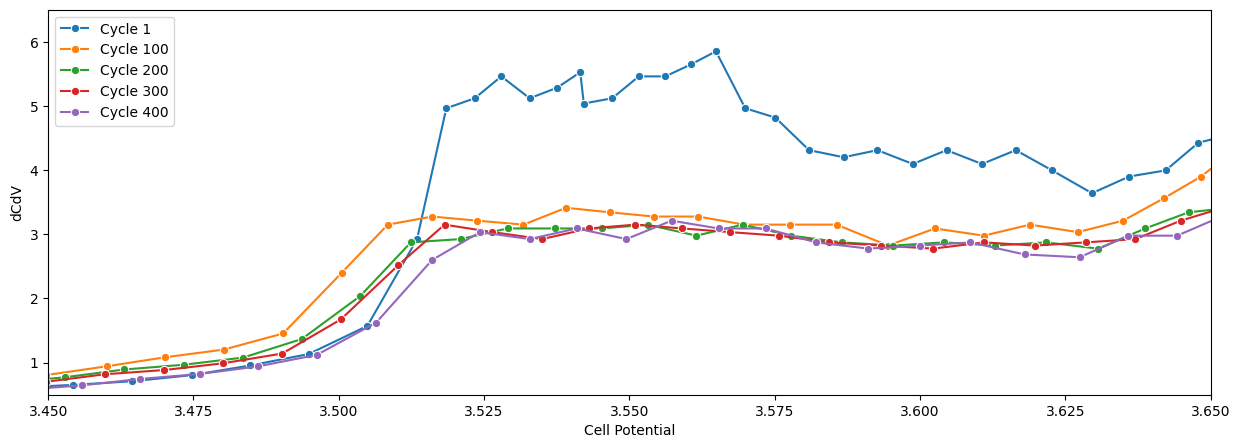

In [152]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1_charge_df, x=cycle_1_charge_df['Cell Potential'].iloc[0:145],y=cycle_1_charge_df['dCdV'].iloc[0:145], marker='o', errorbar=None)
sns.lineplot(data= cycle_100_charge_df, x=cycle_100_charge_df['Cell Potential'].iloc[0:120],y=cycle_100_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_200_charge_df, x=cycle_200_charge_df['Cell Potential'].iloc[0:120],y=cycle_200_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_300_charge_df, x=cycle_300_charge_df['Cell Potential'].iloc[0:120],y=cycle_300_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_400_charge_df, x=cycle_400_charge_df['Cell Potential'].iloc[0:115],y=cycle_400_charge_df['dCdV'].iloc[0:115], marker='o', errorbar=None)
plt.legend(['Cycle 1', 'Cycle 100', 'Cycle 200', 'Cycle 300', 'Cycle 400'], loc='upper left')
plt.xlim(3.45,3.65)
plt.ylim(0.5,6.5)
plt.show()

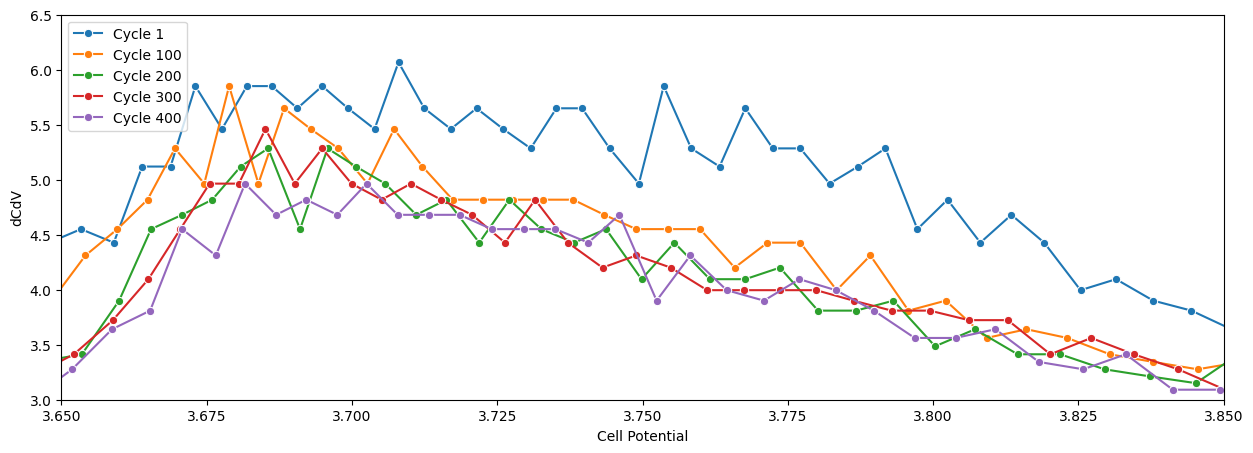

In [153]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1_charge_df, x=cycle_1_charge_df['Cell Potential'].iloc[0:145],y=cycle_1_charge_df['dCdV'].iloc[0:145], marker='o', errorbar=None)
sns.lineplot(data= cycle_100_charge_df, x=cycle_100_charge_df['Cell Potential'].iloc[0:120],y=cycle_100_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_200_charge_df, x=cycle_200_charge_df['Cell Potential'].iloc[0:120],y=cycle_200_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_300_charge_df, x=cycle_300_charge_df['Cell Potential'].iloc[0:120],y=cycle_300_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_400_charge_df, x=cycle_400_charge_df['Cell Potential'].iloc[0:115],y=cycle_400_charge_df['dCdV'].iloc[0:115], marker='o', errorbar=None)
plt.legend(['Cycle 1', 'Cycle 100', 'Cycle 200', 'Cycle 300', 'Cycle 400'], loc='upper left')
plt.xlim(3.65,3.85)
plt.ylim(3.0,6.5)
plt.show()

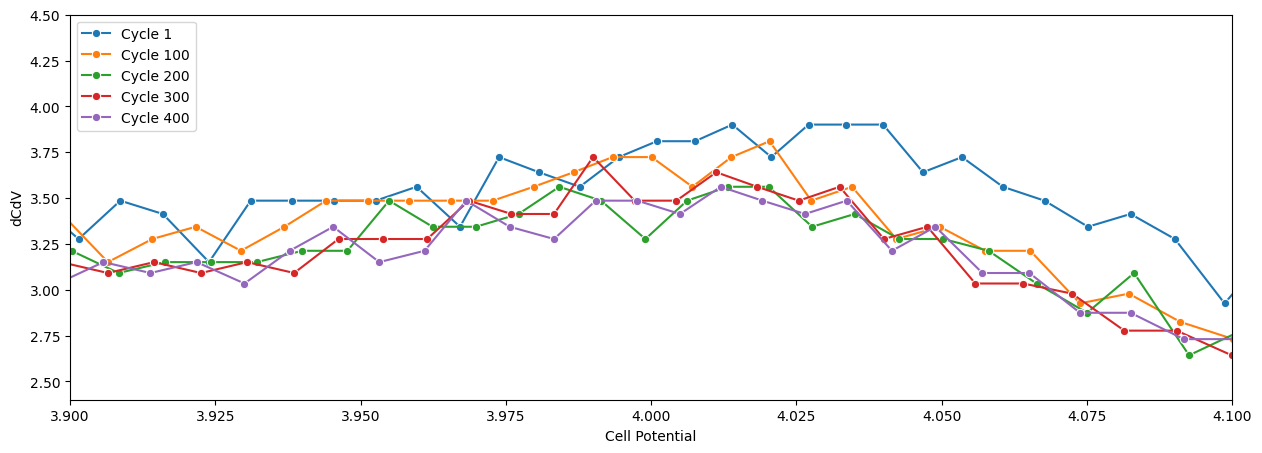

In [154]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1_charge_df, x=cycle_1_charge_df['Cell Potential'].iloc[0:145],y=cycle_1_charge_df['dCdV'].iloc[0:145], marker='o', errorbar=None)
sns.lineplot(data= cycle_100_charge_df, x=cycle_100_charge_df['Cell Potential'].iloc[0:120],y=cycle_100_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_200_charge_df, x=cycle_200_charge_df['Cell Potential'].iloc[0:120],y=cycle_200_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_300_charge_df, x=cycle_300_charge_df['Cell Potential'].iloc[0:120],y=cycle_300_charge_df['dCdV'].iloc[0:120], marker='o', errorbar=None)
sns.lineplot(data= cycle_400_charge_df, x=cycle_400_charge_df['Cell Potential'].iloc[0:115],y=cycle_400_charge_df['dCdV'].iloc[0:115], marker='o', errorbar=None)
plt.legend(['Cycle 1', 'Cycle 100', 'Cycle 200', 'Cycle 300', 'Cycle 400'], loc='upper left')
plt.xlim(3.90,4.10)
plt.ylim(2.4,4.5)
plt.show()

In [168]:
max_c_rated = 3.6
cycle_1_charge_df['SOC%'] = (cycle_1_charge_df['Capacity']/max_c_rated)*100
cycle_1_charge_df.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential  \
0   0.000000           0.0  25.690142  0.000000        3.065919   
1   0.002778           0.0  25.690142  0.000000        3.065614   
2   0.002792           1.0  25.690142  0.000021        3.165103   
3   0.002836           1.0  25.690142  0.000087        3.186008   
4   0.002917           1.0  25.690142  0.000208        3.198215   

   diffChargeCapacity  diffChargeVoltage      dCdV      SOC%  
0                 NaN                NaN       NaN  0.000000  
1            0.000000          -0.000305 -0.000000  0.000000  
2            0.000021           0.099489  0.000206  0.000569  
3            0.000067           0.020905  0.003191  0.002422  
4            0.000121           0.012207  0.009896  0.005778

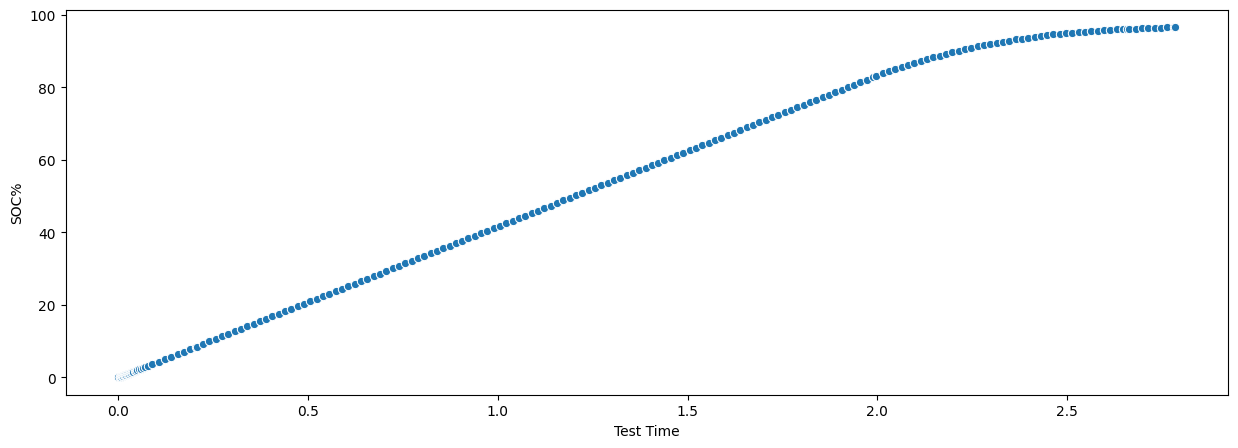

In [169]:
plt.figure(figsize=(15,5))
sns.lineplot(data= cycle_1_charge_df, x=cycle_1_charge_df['Test Time'],y=cycle_1_charge_df['SOC%'], marker='o', errorbar=None)
plt.show()

In [155]:
def separate_charge_discharge(df):
  """
  This function separates charge and discharge cycles from a battery cycling dataframe 
  containing capacity, voltage, and cycle number columns.

  Args:
      df: A pandas dataframe containing columns for capacity, voltage, and cycle number.

  Returns:
      Two separate DataFrames: one containing charge cycles and another containing
          discharge cycles.
  """
  # Identify charging based on two consecutive increasing capacities (may need adjustment)
  is_charging = (df['Cell Potential'].diff() >= -0.001) & (df['Cell Potential'].shift(1).diff() >= -0.001)

  charge_df = df[is_charging]
  discharge_df = df[~is_charging]
  return charge_df, discharge_df

In [267]:
cycle_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 0 to 408
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Test Time       409 non-null    float64
 1   Cycle Number    409 non-null    float64
 2   Temp            409 non-null    float64
 3   Capacity        409 non-null    float64
 4   Cell Potential  409 non-null    float64
dtypes: float64(5)
memory usage: 19.2 KB


In [282]:
charge_df, discharge_df = separate_charge_discharge(cycle_2)

In [283]:
charge_df.reset_index(drop=True, inplace=True)
discharge_df.reset_index(drop=True, inplace=True)

In [284]:
charge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Test Time       239 non-null    float64
 1   Cycle Number    239 non-null    float64
 2   Temp            239 non-null    float64
 3   Capacity        239 non-null    float64
 4   Cell Potential  239 non-null    float64
dtypes: float64(5)
memory usage: 9.5 KB


In [285]:
discharge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Test Time       164 non-null    float64
 1   Cycle Number    164 non-null    float64
 2   Temp            164 non-null    float64
 3   Capacity        164 non-null    float64
 4   Cell Potential  164 non-null    float64
dtypes: float64(5)
memory usage: 6.5 KB


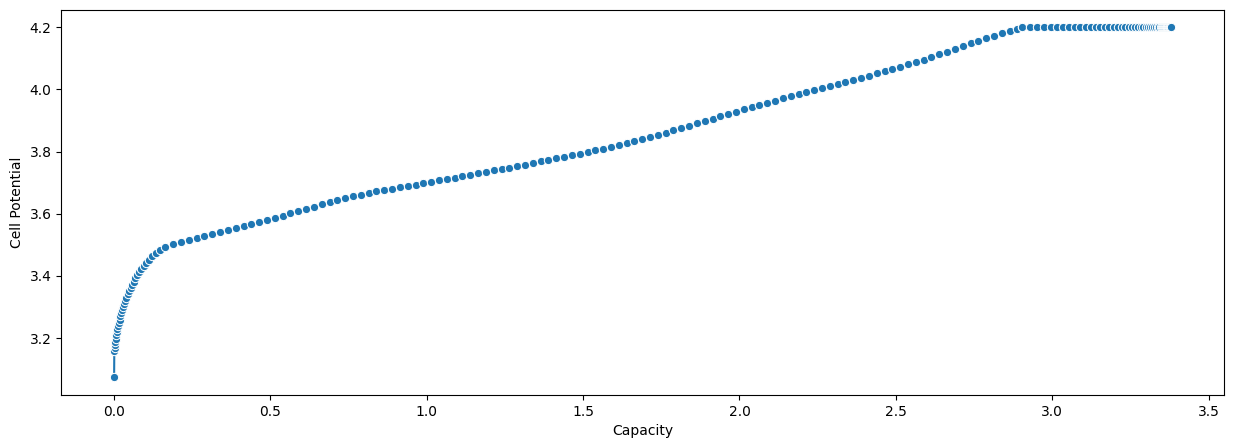

In [286]:
plt.figure(figsize=(15,5))
sns.lineplot(data= charge_df, x=charge_df['Capacity'],y=charge_df['Cell Potential'], marker='o', errorbar=None)
plt.show()

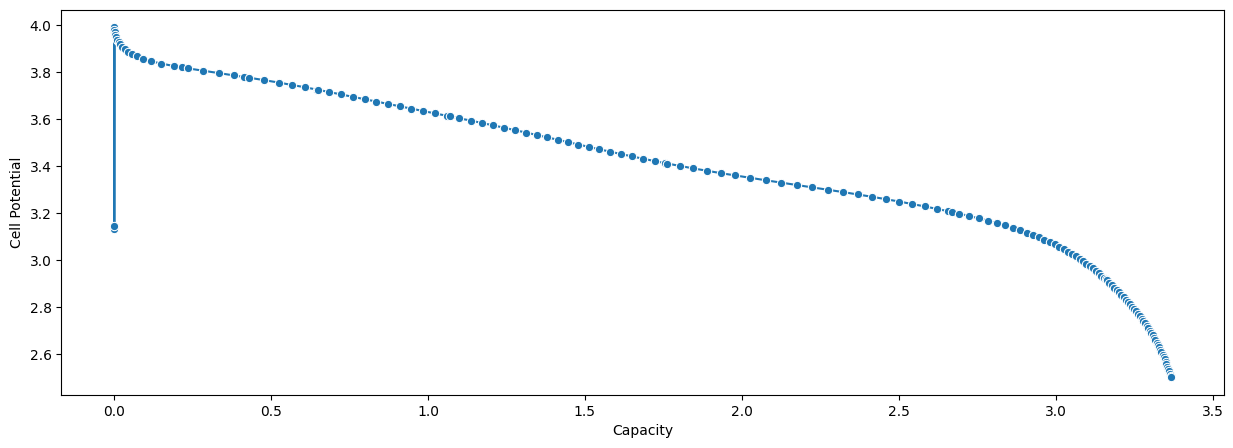

In [287]:
plt.figure(figsize=(15,5))
sns.lineplot(data= discharge_df, x=discharge_df['Capacity'],y=discharge_df['Cell Potential'], marker='o', errorbar=None)
plt.show()

In [156]:
def split_by_cycle_number(df):
  """
  This function splits a dataframe containing cycle number, potential, and capacity 
  columns into separate DataFrames based on cycle number and returns a dictionary.

  Args:
      df: A pandas dataframe containing columns for cycle number, potential, and capacity.

  Returns:
      A dictionary with cycle numbers as keys and the corresponding dataframes as values.
  """
  cycle_dfs = {}
  for cycle_number, group_df in df.groupby('Cycle Number'):
    cycle_dfs[cycle_number] = group_df.copy()
  return cycle_dfs

In [157]:
# Example usage (assuming you have a dataframe named 'data')
cycle_dfs = split_by_cycle_number(bat_df_full.copy())

In [158]:
cycle_dfs.keys()

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 

In [293]:
cycle_dfs[0.0].head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   0.000000           0.0  25.690142       0.0        3.065919
1   0.002778           0.0  25.690142       0.0        3.065614

In [294]:
cycle_dfs[1.0].head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
2   0.002792           1.0  25.690142  0.000021        3.165103
3   0.002836           1.0  25.690142  0.000087        3.186008
4   0.002917           1.0  25.690142  0.000208        3.198215
5   0.003178           1.0  25.690142  0.000600        3.208743
6   0.003711           1.0  25.690142  0.001400        3.219120

In [295]:
cycle_dfs[1.0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 2 to 408
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Test Time       407 non-null    float64
 1   Cycle Number    407 non-null    float64
 2   Temp            407 non-null    float64
 3   Capacity        407 non-null    float64
 4   Cell Potential  407 non-null    float64
dtypes: float64(5)
memory usage: 19.1 KB


In [159]:
max_c_rated = 3.6
single_cycle_bat_df ['Charge_SOH(%)'] = (single_cycle_bat_df['Charge Capacity']/max_c_rated)*100
single_cycle_bat_df ['Discharge_SOH(%)'] = (single_cycle_bat_df['Discharge Capacity']/max_c_rated)*100
single_cycle_bat_df.head()

Cycle  Charge Capacity  Discharge Capacity  Discharge/Charge  \
0    1.0             3.47                3.37              97.1   
1    2.0             3.38                3.37              99.7   
2    3.0             3.37                3.36              99.7   
3    4.0             3.36                3.35              99.7   
4    5.0             3.35                3.34              99.7   

   Charge_SOH(%)  Discharge_SOH(%)  
0      96.388889         93.611111  
1      93.888889         93.611111  
2      93.611111         93.333333  
3      93.333333         93.055556  
4      93.055556         92.777778

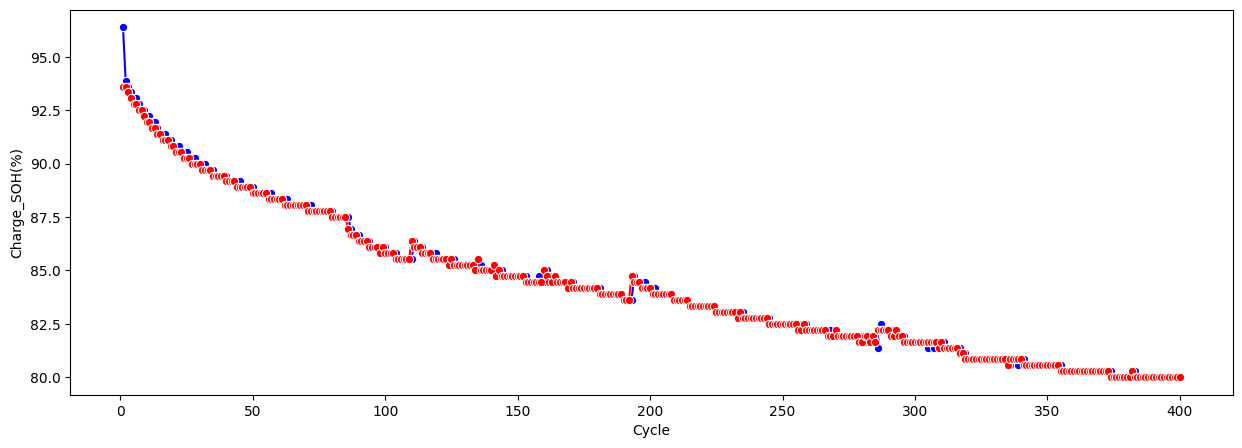

In [160]:
plt.figure(figsize=(15,5))
sns.lineplot(data= single_cycle_bat_df, x=single_cycle_bat_df['Cycle'],y=single_cycle_bat_df['Charge_SOH(%)'], marker='o', errorbar=None, color='blue')
sns.lineplot(data= single_cycle_bat_df, x=single_cycle_bat_df['Cycle'],y=single_cycle_bat_df['Discharge_SOH(%)'], marker='o', errorbar=None, color='red')
plt.show()

In [163]:
def separate_charge_discharge_by_cycle(df):
  """
  This function splits a dataframe containing cycle number, potential, and capacity 
  columns into separate dictionaries for charge and discharge data within each cycle.

  Args:
      df: A pandas dataframe containing columns for cycle number, potential, and capacity (assuming current column exists for separation).

  Returns:
      Two separate dictionaries: one containing charge DataFrames for each cycle number 
      and another containing discharge DataFrames for each cycle number.
  """
  charge_data = {}
  discharge_data = {}
  for cycle_number, group_df in df.groupby('Cycle Number'):
    charge_df, discharge_df = separate_charge_discharge(group_df.copy())
    charge_data[cycle_number] = charge_df
    discharge_data[cycle_number] = discharge_df
  return charge_data, discharge_data

In [165]:
charge_data, discharge_data = separate_charge_discharge_by_cycle(bat_df_full)

In [166]:
charge_data.keys()

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 

In [168]:
charge_data[1.0].head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
4   0.002917           1.0  25.690142  0.000208        3.198215
5   0.003178           1.0  25.690142  0.000600        3.208743
6   0.003711           1.0  25.690142  0.001400        3.219120
7   0.004450           1.0  25.706116  0.002508        3.229648
8   0.005358           1.0  25.690142  0.003870        3.239719

In [169]:
charge_data[1.0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 4 to 408
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Test Time       242 non-null    float64
 1   Cycle Number    242 non-null    float64
 2   Temp            242 non-null    float64
 3   Capacity        242 non-null    float64
 4   Cell Potential  242 non-null    float64
dtypes: float64(5)
memory usage: 11.3 KB


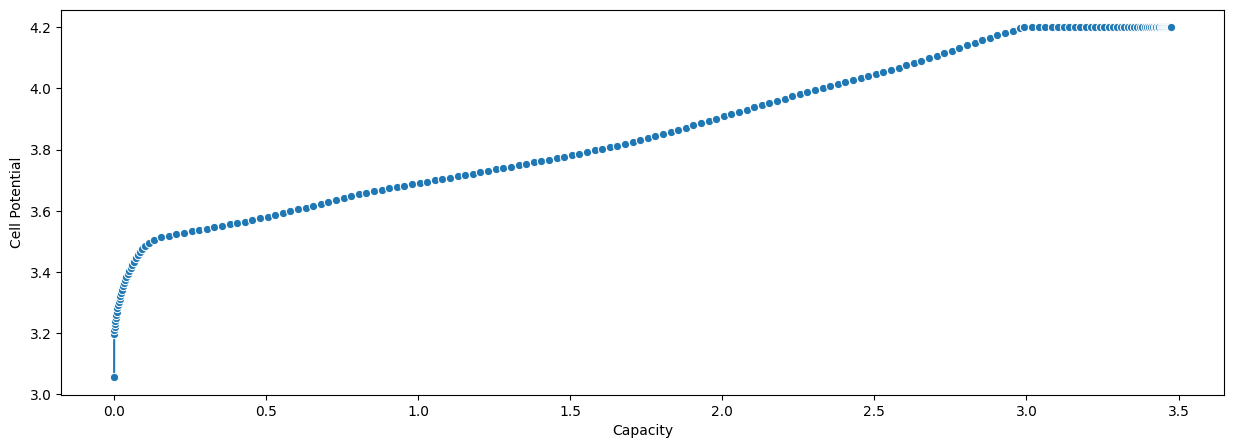

In [170]:
plt.figure(figsize=(15,5))
sns.lineplot(data= charge_data[1.0], x=charge_data[1.0]['Capacity'],y=charge_data[1.0]['Cell Potential'], marker='o', errorbar=None)
plt.show()

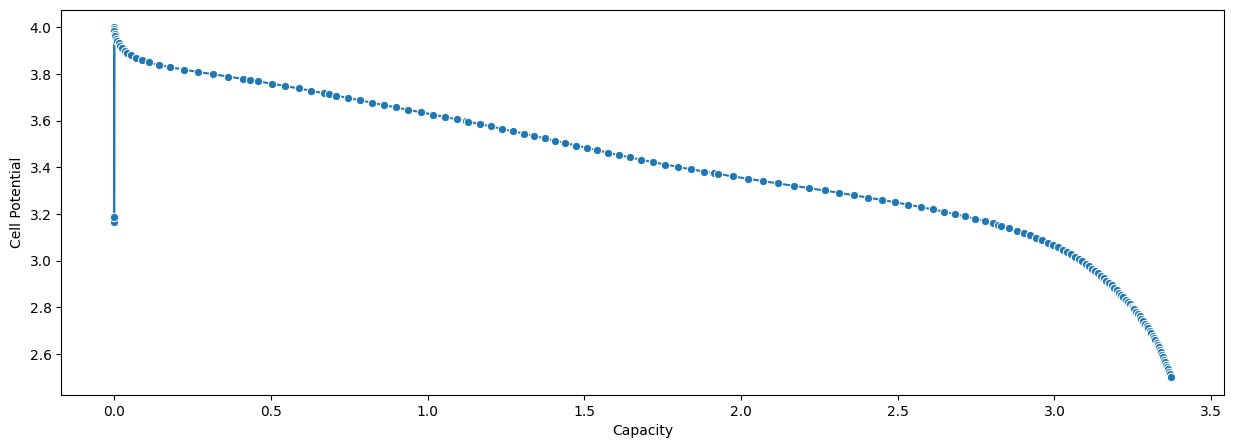

In [171]:
plt.figure(figsize=(15,5))
sns.lineplot(data= discharge_data[1.0], x=discharge_data[1.0]['Capacity'],y=discharge_data[1.0]['Cell Potential'], marker='o', errorbar=None)
plt.show()

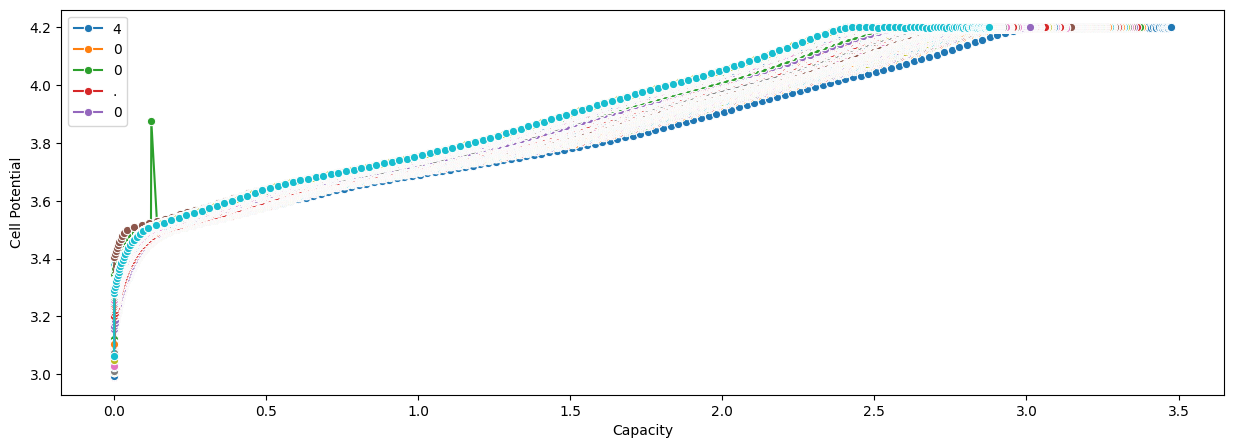

In [181]:
plt.figure(figsize=(15,5))
for key in charge_data.keys():
    sns.lineplot(data= charge_data[key], x=charge_data[key]['Capacity'],y=charge_data[key]['Cell Potential'], marker='o', errorbar=None)
plt.show()

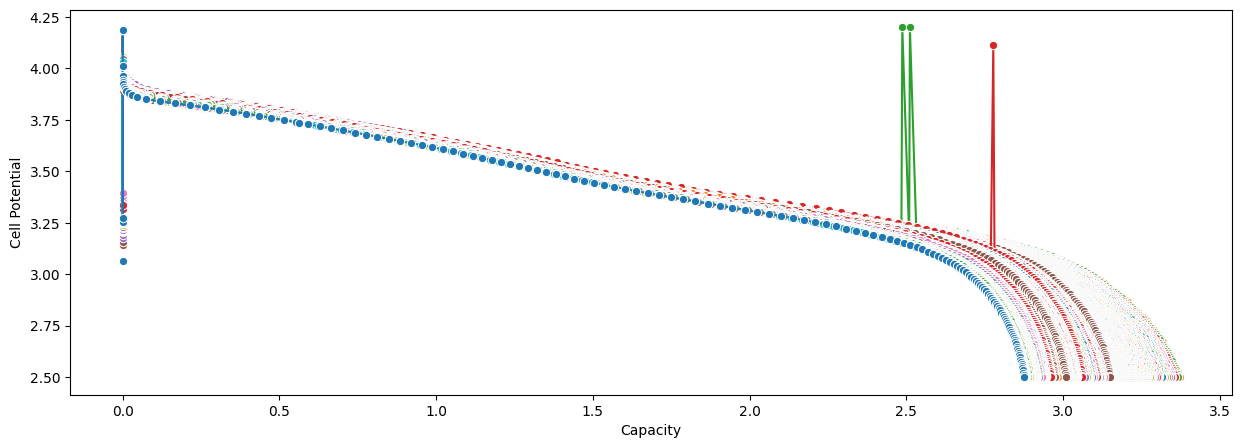

In [178]:
plt.figure(figsize=(15,5))
for key in discharge_data.keys():
    sns.lineplot(data= discharge_data[key], x=discharge_data[key]['Capacity'],y=discharge_data[key]['Cell Potential'], marker='o', errorbar=None)
plt.show()

In [ ]:
# Prints separate 3d plots
def plot_3d_cycle_data(cycle_number, df):
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111, projection='3d')

  cycle_number = df['Cycle Number']
  capacity = df['Capacity']
  voltage = df['Cell Potential']  

  ax.plot(cycle_number, capacity, voltage, c='b', marker='o')

  ax.set_xlabel('Cycle Number')
  ax.set_ylabel('Capacity (Ah)')
  ax.set_zlabel('Voltage (V)')
  ax.set_title(f'3D Plot of Charge Data (Cycle {cycle_number})')

  plt.show()

# Plot 3D for each dataframe in charge_data
for cycle_number, df in charge_data.items():
  plot_3d_cycle_data(cycle_number, df.copy())

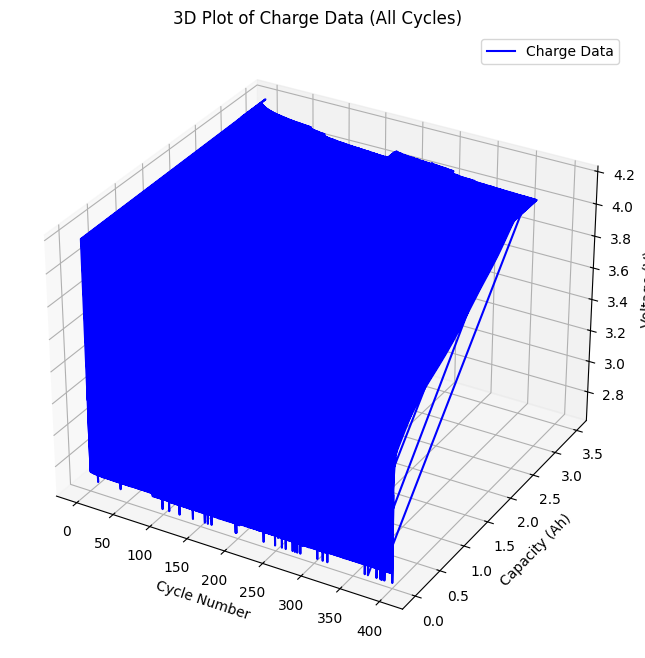

In [195]:
import itertools
import matplotlib

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Initialize empty lists for data
cycle_numbers = []
capacities = []
voltages = []
colors = []

# Colormap for assigning colors (adjust colormap as needed)
cmap =   matplotlib.colormaps['viridis'] # You can use other colormaps from matplotlib.cm

# Collect data from all dataframes
for cycle_number, df in charge_data.items():
  cycle_numbers.extend(df['Cycle Number'].to_list())
  capacities.extend(df['Capacity'].to_list())
  voltages.extend(df['Cell Potential'].to_list())
  # Assign color based on cycle number and colormap
  colors.append(cmap(i / (len(charge_data) - 1)))  # Normalize index for colormap

# Plot the data points (adjust marker style and color as needed)
ax.plot(cycle_numbers, capacities, voltages, c='b',  label='Charge Data')

# Set labels and title
ax.set_xlabel('Cycle Number')
ax.set_ylabel('Capacity (Ah)')
ax.set_zlabel('Voltage (V)')
ax.set_title('3D Plot of Charge Data (All Cycles)')

# Add legend (optional)
ax.legend()

plt.show()

In [179]:
discharge_data[0.0].head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential
0   0.000000           0.0  25.690142       0.0        3.065919
1   0.002778           0.0  25.690142       0.0        3.065614

In [300]:
bat_df_full['Current'] = bat_df_full['Capacity']/bat_df_full['Test Time']
bat_df_full.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential   Current
0   0.000000           0.0  25.690142  0.000000        3.065919       NaN
1   0.002778           0.0  25.690142  0.000000        3.065614  0.000000
2   0.002792           1.0  25.690142  0.000021        3.165103  0.007343
3   0.002836           1.0  25.690142  0.000087        3.186008  0.030746
4   0.002917           1.0  25.690142  0.000208        3.198215  0.071313

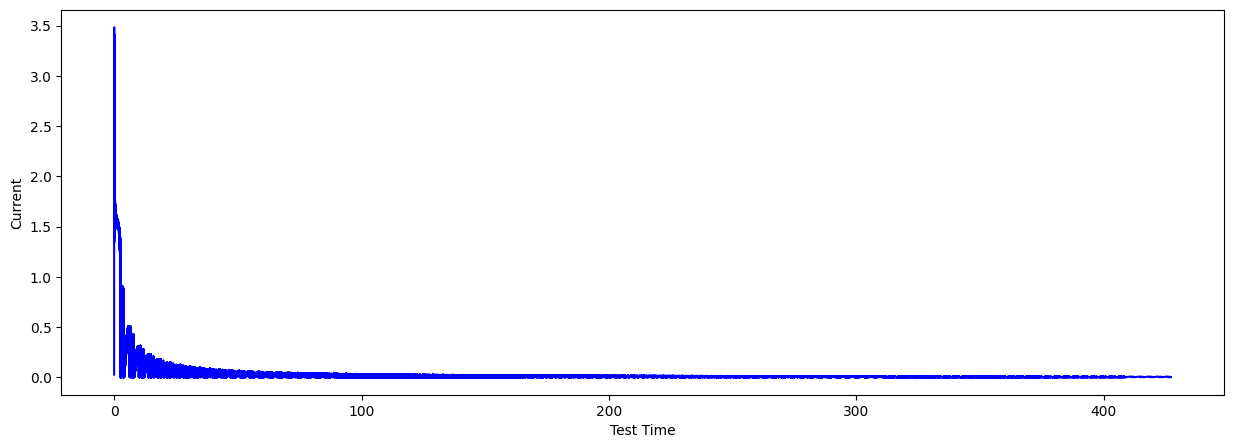

In [302]:
plt.figure(figsize=(15,5))
sns.lineplot(data= bat_df_full, x=bat_df_full['Test Time'],y=bat_df_full['Current'], errorbar=None, color='blue')
plt.show()

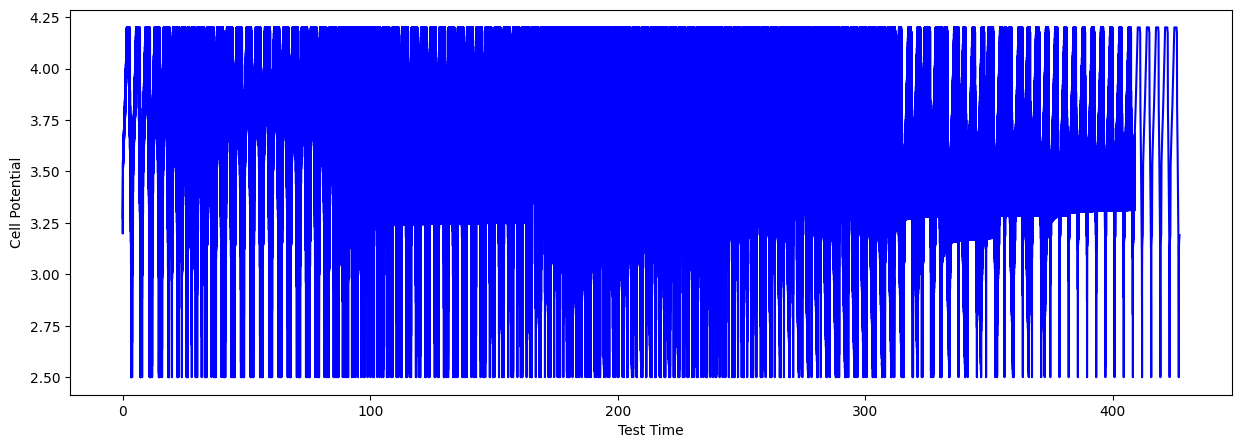

In [304]:
plt.figure(figsize=(15,5))
sns.lineplot(data= bat_df_full, x=bat_df_full['Test Time'],y=bat_df_full['Cell Potential'], errorbar=None, color='blue')
plt.show()

In [309]:
def estimate_soc(df, initial_capacity):
  """
  This function estimates the State of Charge (SOC) for each cycle in a battery cycling dataframe.

  Args:
      df: A pandas dataframe containing columns for charge capacity, discharge capacity, and cycle number.
      initial_capacity: The initial capacity of the battery (e.g., in mAh).

  Returns:
      A new dataframe with an additional column 'SOC' containing the estimated SOC for each cycle.
  """
  df['SOC'] = initial_capacity
  for i in range(1, len(df)):
    df.loc[i, 'SOC'] = (df.loc[i-1, 'SOC'] + (df.loc[i, 'Charge Capacity'] - df.loc[i, 'Discharge Capacity']))
  return df

In [310]:
# Example usage (assuming you have a dataframe named 'data' and initial capacity of 1000 mAh)
initial_capacity = max_c_rated
df_with_soc = estimate_soc(single_cycle_bat_df.copy(), initial_capacity)

In [311]:
df_with_soc.head()

Cycle  Charge Capacity  Discharge Capacity  Discharge/Charge  \
0    1.0             3.47                3.37              97.1   
1    2.0             3.38                3.37              99.7   
2    3.0             3.37                3.36              99.7   
3    4.0             3.36                3.35              99.7   
4    5.0             3.35                3.34              99.7   

   Charge_SOC(%)  Discharge_SOC(%)   SOC  
0      96.388889         93.611111  3.60  
1      93.888889         93.611111  3.61  
2      93.611111         93.333333  3.62  
3      93.333333         93.055556  3.63  
4      93.055556         92.777778  3.64

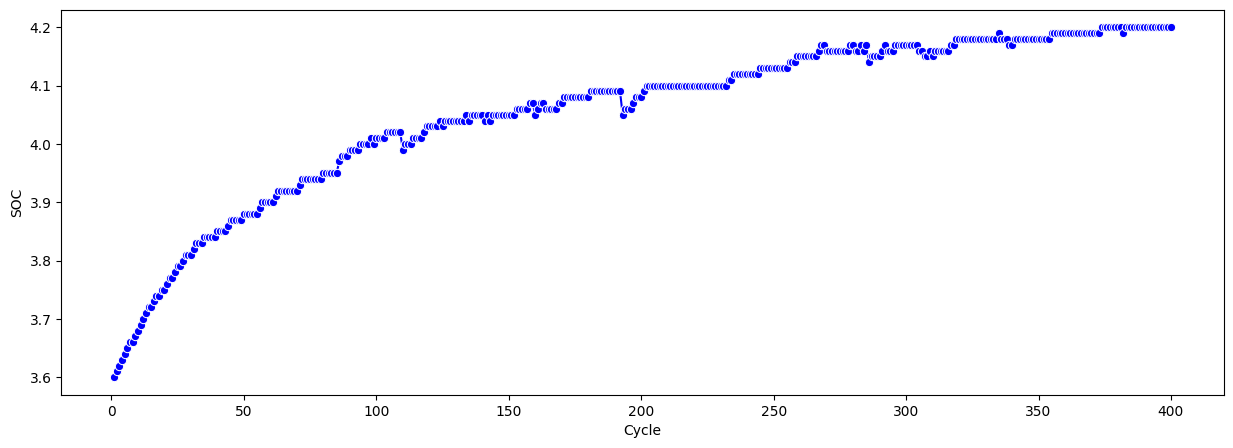

In [313]:
plt.figure(figsize=(15,5))
sns.lineplot(data= df_with_soc, x=df_with_soc['Cycle'],y=df_with_soc['SOC'], marker='o', errorbar=None, color='blue')
plt.show()

In [315]:
df_with_soc['SOC%'] = (df_with_soc['SOC']/df_with_soc['SOC'].iloc[0])*100
df_with_soc.head()

Cycle  Charge Capacity  Discharge Capacity  Discharge/Charge  \
0    1.0             3.47                3.37              97.1   
1    2.0             3.38                3.37              99.7   
2    3.0             3.37                3.36              99.7   
3    4.0             3.36                3.35              99.7   
4    5.0             3.35                3.34              99.7   

   Charge_SOC(%)  Discharge_SOC(%)   SOC        SOC%  
0      96.388889         93.611111  3.60  100.000000  
1      93.888889         93.611111  3.61  100.277778  
2      93.611111         93.333333  3.62  100.555556  
3      93.333333         93.055556  3.63  100.833333  
4      93.055556         92.777778  3.64  101.111111

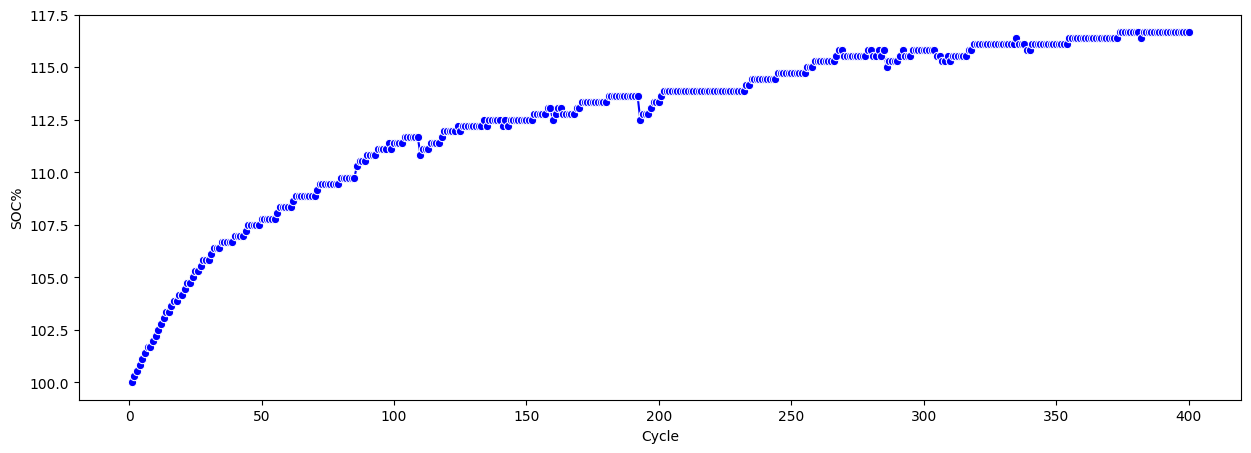

In [337]:
plt.figure(figsize=(15,5))
sns.lineplot(data= df_with_soc, x=df_with_soc['Cycle'],y=df_with_soc['SOC%'], marker='o', errorbar=None, color='blue')
plt.show()

In [316]:
df_with_soc['delt'] = [1 for i in range(len(df_with_soc))]
df_with_soc.head()

Cycle  Charge Capacity  Discharge Capacity  Discharge/Charge  \
0    1.0             3.47                3.37              97.1   
1    2.0             3.38                3.37              99.7   
2    3.0             3.37                3.36              99.7   
3    4.0             3.36                3.35              99.7   
4    5.0             3.35                3.34              99.7   

   Charge_SOC(%)  Discharge_SOC(%)   SOC        SOC%  delt  
0      96.388889         93.611111  3.60  100.000000     1  
1      93.888889         93.611111  3.61  100.277778     1  
2      93.611111         93.333333  3.62  100.555556     1  
3      93.333333         93.055556  3.63  100.833333     1  
4      93.055556         92.777778  3.64  101.111111     1

In [317]:
bat_df_full['delt'] = bat_df_full['Test Time'].diff()
bat_df_full.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential   Current  \
0   0.000000           0.0  25.690142  0.000000        3.065919       NaN   
1   0.002778           0.0  25.690142  0.000000        3.065614  0.000000   
2   0.002792           1.0  25.690142  0.000021        3.165103  0.007343   
3   0.002836           1.0  25.690142  0.000087        3.186008  0.030746   
4   0.002917           1.0  25.690142  0.000208        3.198215  0.071313   

       delt  
0       NaN  
1  0.002778  
2  0.000014  
3  0.000044  
4  0.000081

In [320]:
bat_df_full['Current'] = bat_df_full['Current'].fillna(value=0.0)
bat_df_full['delt'] = bat_df_full['delt'].fillna(value=0.0)
bat_df_full.head()

Test Time  Cycle Number       Temp  Capacity  Cell Potential   Current  \
0   0.000000           0.0  25.690142  0.000000        3.065919  0.000000   
1   0.002778           0.0  25.690142  0.000000        3.065614  0.000000   
2   0.002792           1.0  25.690142  0.000021        3.165103  0.007343   
3   0.002836           1.0  25.690142  0.000087        3.186008  0.030746   
4   0.002917           1.0  25.690142  0.000208        3.198215  0.071313   

       delt  
0  0.000000  
1  0.002778  
2  0.000014  
3  0.000044  
4  0.000081

In [323]:
slice_df = pd.DataFrame(bat_df_full[['Cell Potential', 'Current', 'delt']])
slice_df.head()

Cell Potential   Current      delt
0        3.065919  0.000000  0.000000
1        3.065614  0.000000  0.002778
2        3.165103  0.007343  0.000014
3        3.186008  0.030746  0.000044
4        3.198215  0.071313  0.000081

In [330]:
# Battery parameters (replace with your specific values)
battery_capacity = 3.6  # Ah
initial_soc = 96  # %

# Process noise covariance (adjust based on model uncertainty)
process_noise_cov = 0.01

# Measurement noise covariance (adjust based on sensor noise)
measurement_noise_cov = 1.0

# State vector (SoC)
x = np.array([initial_soc / 100.0])

# Covariance matrix
P = np.zeros((1, 1))

# Measurement matrix (typically 1 for SoC estimation)
H = np.array([1.0])


def kalman_filter_dataframe(data):
  """
  Performs a Kalman filter update for battery data in a DataFrame 
  and returns a new DataFrame with an 'estimated_soc' column.

  Args:
      data: DataFrame containing voltage, current, and dt columns.

  Returns:
      data_with_soc: New DataFrame with an 'estimated_soc' column.
  """

  global x, P
  data_with_soc = data.copy()  # Avoid modifying the original DataFrame

  for i, row in data.iterrows():
    voltage = row["Cell Potential"]
    current = row["Current"]
    dt = row["delt"]

    # Simple battery model (adjust based on your cell type)
    predicted_soc = x + (current * dt) / battery_capacity

    # Predict covariance
    P_predicted = P + process_noise_cov

    # Innovation (difference between prediction and measurement)
    innovation = voltage - predicted_soc

    # Kalman gain
    K = P_predicted * H / (H.T @ P_predicted @ H + measurement_noise_cov)

    # Update state and covariance
    x = predicted_soc + K * innovation
    P = (np.eye(1) - K @ H) @ P_predicted

    # Append estimated SoC to a new column (avoid modifying original DataFrame)
    data_with_soc.loc[i, "KF_SOC"] = x * 100.0

  return data_with_soc


In [329]:
slice_df.columns

Index(['Cell Potential', 'Current', 'delt', 'KFSOC'], dtype='object')

In [331]:
data_with_soc = kalman_filter_dataframe(slice_df.copy())

In [332]:
data_with_soc.head()

Cell Potential   Current      delt                   KFSOC      KF_SOC
0        3.065919  0.000000  0.000000   [[98.08506831683168]]   98.085068
1        3.065614  0.000000  0.002778  [[102.15299751286283]]  102.152998
2        3.165103  0.007343  0.000014   [[108.2979026638275]]  108.297903
3        3.186008  0.030746  0.000044  [[116.12692308535854]]  116.126923
4        3.198215  0.071313  0.000081  [[125.31316337007124]]  125.313163

In [333]:
data_with_soc.drop(columns='KFSOC', inplace=True)

In [334]:
data_with_soc.head()

Cell Potential   Current      delt      KF_SOC
0        3.065919  0.000000  0.000000   98.085068
1        3.065614  0.000000  0.002778  102.152998
2        3.165103  0.007343  0.000014  108.297903
3        3.186008  0.030746  0.000044  116.126923
4        3.198215  0.071313  0.000081  125.313163

In [335]:
data_with_soc['Test Time'] = bat_df_full['Test Time']
data_with_soc.head()

Cell Potential   Current      delt      KF_SOC  Test Time
0        3.065919  0.000000  0.000000   98.085068   0.000000
1        3.065614  0.000000  0.002778  102.152998   0.002778
2        3.165103  0.007343  0.000014  108.297903   0.002792
3        3.186008  0.030746  0.000044  116.126923   0.002836
4        3.198215  0.071313  0.000081  125.313163   0.002917

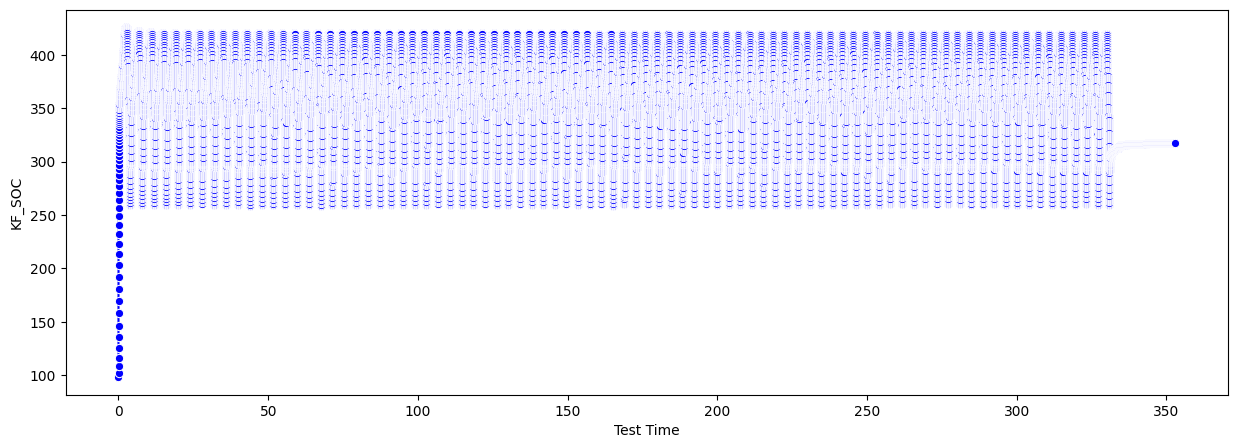

In [336]:
plt.figure(figsize=(15,5))
sns.lineplot(data= data_with_soc, x=data_with_soc['Test Time'],y=data_with_soc['KF_SOC'], marker='o', errorbar=None, color='blue')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Battery parameters (replace with your specific values)
battery_capacity = 1000  # Ah
initial_soc = 50  # %
nominal_voltage = 3.7  # V (Nominal voltage of your cell)

# Process noise covariance (adjust based on model uncertainty)
process_noise_cov = np.diag([0.01, 0.1])  # Covariance for SoC and voltage

# Measurement noise covariance (adjust based on sensor noise)
measurement_noise_cov = 1.0

# State vector (SoC, open circuit voltage (OCV))
x = np.array([initial_soc / 100.0, nominal_voltage])

# Covariance matrix
P = np.zeros((2, 2))


def open_circuit_voltage(soc):
  """
  Replace this function with your specific OCV model based on SoC.
  """
  # Implement your OCV model here
  pass


def d_open_circuit_voltage_dsoc(soc):
  """
  Replace this function with the derivative of your OCV model w.r.t SoC.
  """
  # Implement the derivative here
  pass


def ekf_battery_dataframe(data):
  """
  Performs an Extended Kalman Filter update for battery data in a DataFrame 
  and returns a new DataFrame with an 'estimated_soc' column.

  Args:
      data: DataFrame containing "Cell Potential", "Current", and "delt" columns.

  Returns:
      data_with_soc: New DataFrame with an 'estimated_soc' column.
  """

  global x, P
  data_with_soc = data.copy()  # Avoid modifying the original DataFrame

  for i, row in data.iterrows():
    voltage = row["Cell Potential"]
    current = row["Current"]
    dt = row["delt"]

    # Simple battery model (adjust based on your cell type)
    predicted_soc = x[0] + (current * dt) / battery_capacity
    predicted_ocv = open_circuit_voltage(predicted_soc)  # Replace with your OCV model

    # State transition matrix (linear approximation)
    A = np.array([[1.0, 0.0],
                  [-current / battery_capacity, 1.0]])

    # Jacobian of open circuit voltage (wrt SoC)
    # Replace with the derivative of your OCV model
    j_ocv = d_open_circuit_voltage_dsoc(predicted_soc)

    # Extended Kalman Filter - prediction step
    x_predicted = A @ x
    P_predicted = A @ P @ A.T + process_noise_cov

    # Innovation (difference between prediction and measurement)
    innovation = np.array([voltage - predicted_ocv])

    # Kalman gain
    H = np.array([[1.0, j_ocv]])
    K = P_predicted @ H.T / (H @ P_predicted @ H.T + measurement_noise_cov)

    # Update state and covariance
    x = x_predicted + K @ innovation
    P = (np.eye(2) - K @ H) @ P_predicted

    # Append estimated SoC to a new column (avoid modifying original DataFrame)
    data_with_soc.loc[i, "estimated_soc"] = x[0] * 100.0

  return data_with_soc


# Example usage (replace with your actual DataFrame)
data = pd.DataFrame({
  "Cell Potential": [12.0, 11.8, 11.5],
  "Current": [-2.0, 1.0, -0.5],
  "delt": [1.0, 1.0, 1.0]
})

data_with_soc = ekf_battery_dataframe(data)

print(data_with_soc)